### Understand data
#### Load data
* The data is at https://www.kaggle.com/datasets/fccuser/2021-new-coder-survey 
* It is important to understand the data first


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")
survey = pd.read_csv("/kaggle/input/2021-new-coder-survey/2021 New Coder Survey.csv") 

#### What are in the data?
* * Understanding the data can take a lot of time

In [211]:
survey.head()

Timestamp 1. What is your biggest reason for learning to code?  \
0  7/1/2021 10:10:23                       To succeed in current career     
1  7/1/2021 10:31:01                                  To change careers     
2  7/1/2021 10:42:31                                  To change careers     
3  7/1/2021 11:06:43                                         As a hobby     
4  7/1/2021 11:14:31                         To start your first career     

  2. What methods have you used to learn about coding? Please select all that apply.  \
0  Online resources, Books, In-person bootcamps, ...                                   
1          Online resources, Books, Online bootcamps                                   
2  Online resources, Books, Hackathons, Meetup.co...                                   
3                            Online resources, Books                                   
4          Online resources, Books, Online bootcamps                                   

  3. Which online learning resources have you found helpful? Please select all that apply.  \
0  freeCodeCamp, Mozilla Developer Network (MDN),...                                         
1  freeCodeCamp, Mozilla Developer Network (MDN),...                                         
2  freeCodeCamp, Mozilla Developer Network (MDN),...                                         
3  freeCodeCamp, Mozilla Developer Network (MDN),...                                         
4      freeCodeCamp, Stack Overflow, Coursera, Udemy                                         

  4. If you have attended in-person coding-related events before, which ones have you found helpful? Please select all that apply.  \
0          conferences, workshops, Meetup.com events                                                                                 
1  I haven't attended any in-person coding-relate...                                                                                 
2                                  Meetup.com events                                                                                 
3  I haven't attended any in-person coding-relate...                                                                                 
4  I haven't attended any in-person coding-relate...                                                                                 

  5. If you have listened to coding-related podcasts before, which ones have you found helpful? Please select all that apply.  \
0                                      The Changelog                                                                            
1                 The Changelog, Code Newbie Podcast                                                                            
2                 I haven't listened to any podcasts                                                                            
3               Darknet Diaries, Real Python Podcast                                                                            
4                                  Talk Python to Me                                                                            

  6. If you have watched coding-related YouTube videos before, which channels have you found helpful? Please select all that apply.  \
0                              CS Dojo, freeCodeCamp                                                                                  
1  Adrian Twarog, Code with Ania Kubów, Coder Cod...                                                                                  
2  AmigosCode, Dev Ed, freeCodeCamp, Kevin Powell...                                                                                  
3                       freeCodeCamp, Traversy Media                                                                                  
4        freeCodeCamp, The Net Ninja, Traversy Media                                                                                  

   7. About how many hours do you spend learning each week?  \


In [212]:
survey.columns

Index(['Timestamp', '1. What is your biggest reason for learning to code?',
       '2. What methods have you used to learn about coding? Please select all that apply.',
       '3. Which online learning resources have you found helpful? Please select all that apply.',
       '4. If you have attended in-person coding-related events before, which ones have you found helpful? Please select all that apply.',
       '5. If you have listened to coding-related podcasts before, which ones have you found helpful? Please select all that apply.',
       '6. If you have watched coding-related YouTube videos before, which channels have you found helpful? Please select all that apply.',
       '7. About how many hours do you spend learning each week?',
       '8. About how many months have you been programming?',
       '9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?',
       '10. Are you already employed in a software development job

In [213]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18126 entries, 0 to 18125
Data columns (total 63 columns):
 #   Column                                                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                                                      --------------  -----  
 0   Timestamp                                                                                                                                                                   18126 non-null  object 
 1   1. What is your biggest reason for learning to code?                                                                                                                        17991 non-null  object 
 2   2. What methods have you used to learn about coding? Please select all that apply.

In [214]:
survey.keys()

Index(['Timestamp', '1. What is your biggest reason for learning to code?',
       '2. What methods have you used to learn about coding? Please select all that apply.',
       '3. Which online learning resources have you found helpful? Please select all that apply.',
       '4. If you have attended in-person coding-related events before, which ones have you found helpful? Please select all that apply.',
       '5. If you have listened to coding-related podcasts before, which ones have you found helpful? Please select all that apply.',
       '6. If you have watched coding-related YouTube videos before, which channels have you found helpful? Please select all that apply.',
       '7. About how many hours do you spend learning each week?',
       '8. About how many months have you been programming?',
       '9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?',
       '10. Are you already employed in a software development job

#### Choose columns for machine learning
* We only select two columns in the kick-off notebook: `Area` as a predictor and `Income` as the target 
* Create a dataframe with `Area`, `Income`

In [2]:
import pandas as pd

df = pd.DataFrame(columns=['WeeklyHoursSpent','MonthsProgExp','EduLevel','EmploymentStatus','AnnualIncomeUSD','Age','InterestInDevCareer','Region'])
df['WeeklyHoursSpent'] = survey.iloc[:, 7]  
df['MonthsProgExp'] = survey.iloc[:, 8]
df['EduLevel'] = survey.iloc[:, 32]
df['EmploymentStatus'] = survey.iloc[:, 10]
df['AnnualIncomeUSD'] = survey.iloc[:, 22]
df['Age'] = survey.iloc[:, 23]
df['InterestInDevCareer'] = survey.iloc[:, 12]
df['Region'] = survey.iloc[:, 26]

df

WeeklyHoursSpent MonthsProgExp  \
0                   4.0           120   
1                  10.0             6   
2                  30.0            48   
3                   NaN            36   
4                   2.0            24   
...                 ...           ...   
18121              40.0            12   
18122               NaN           NaN   
18123              10.0            13   
18124               6.0            36   
18125               5.0           200   

                                      EduLevel EmploymentStatus  \
0      Professional degree (MBA, MD, JD, etc.)              Yes   
1                            Bachelor’s degree               No   
2           Master's degree (non-professional)               No   
3      High school diploma or equivalent (GED)               No   
4                            Bachelor’s degree              Yes   
...                                        ...              ...   
18121       Master's degree (non-professional)               No   
18122                        Bachelor’s degree               No   
18123                       Associate’s degree               No   
18124  Professional degree (MBA, MD, JD, etc.)              Yes   
18125       Master's degree (non-professional)               No   

          AnnualIncomeUSD   Age       InterestInDevCareer  \
0                     NaN  33.0                       NaN   
1            Under $1,000  38.0  I am already a developer   
2                     NaN   NaN                       Yes   
3                     NaN  19.0                       Yes   
4      $40,000 to $49,999  35.0  I am already a developer   
...                   ...   ...                       ...   
18121                 NaN  44.0                       Yes   
18122                 NaN  37.0                       Yes   
18123  $20,000 to $24,999  23.0                       Yes   
18124  $30,000 to $34,999  34.0  I am already a developer   
18125  $10,000 to $14,999  44.0                        No   

                             Region  
0           Europe and Central Asia  
1       Latin America and Caribbean  
2                     North America  
3                Sub-Saharan Africa  
4             East Asia and Pacific  
...                             ...  
18121  Middle East and North Africa  
18122                 North America  
18123                 North America  
18124       Europe and Central Asia  
18125       Europe and Central Asia  

[18126 rows x 8 columns]

In [7]:
df_cleaned= df.dropna()
df_cleaned = df_cleaned[df_cleaned["AnnualIncomeUSD"] != 'I don’t know']
df_cleaned = df_cleaned[df_cleaned["AnnualIncomeUSD"] != "I don't want to answer"]
df_cleaned = df_cleaned[df_cleaned["AnnualIncomeUSD"] != "None"]
print(df_cleaned["AnnualIncomeUSD"].unique())

['Under $1,000' '$40,000 to $49,999' '$75,000 to $89,999'
 '$60,000 to $74,999' '$1,000 to $2,999' '$10,000 to $14,999'
 '$20,000 to $24,999' '$25,000 to $29,999' '$30,000 to $34,999'
 '$3,000 to $4,999' '$15,000 to $19,999' '$7,000 to $9,999'
 '$90,000 to $119,999' '$5,000 to $6,999' '$35,000 to $39,999'
 '$50,000 to $59,999' '$120,000 to $159,999' '$200,000 to $249,999'
 '$250,000 or over' '$160,000 to $199,999']


In [6]:
print(df['AnnualIncomeUSD'].value_counts())

AnnualIncomeUSD
Under $1,000              1609
$1,000 to $2,999           981
$10,000 to $14,999         809
$3,000 to $4,999           669
$20,000 to $24,999         633
$40,000 to $49,999         599
$5,000 to $6,999           547
$15,000 to $19,999         530
$50,000 to $59,999         508
$7,000 to $9,999           492
$30,000 to $34,999         484
$25,000 to $29,999         476
$60,000 to $74,999         440
$35,000 to $39,999         365
$75,000 to $89,999         323
$90,000 to $119,999        277
$120,000 to $159,999       137
I don't want to answer     122
I don’t know                60
$160,000 to $199,999        39
$250,000 or over            32
$200,000 to $249,999        15
Name: count, dtype: int64


# **Data Cleaning**

In [11]:
missing_values = df.isnull().sum()

# Calculate the total number of responses (assuming each row is a response)
total_responses = len(df)

# Calculate the response rate for each attribute
response_rate = (total_responses - missing_values) / total_responses * 100

# Create a DataFrame to display the response rates
response_rate_df = pd.DataFrame({
    'Attribute': missing_values.index,
    'Missing Values': missing_values.values,
    'Response Rate (%)': response_rate.round(1)  # Round to one decimal point
})

# Display the response rates DataFrame
response_rate_df

Attribute  Missing Values  Response Rate (%)
WeeklyHoursSpent        WeeklyHoursSpent               0              100.0
MonthsProgExp              MonthsProgExp            1431               92.1
EduLevel                        EduLevel             921               94.9
EmploymentStatus        EmploymentStatus             453               97.5
AnnualIncomeUSD          AnnualIncomeUSD            7979               56.0
Age                                  Age            1023               94.4
InterestInDevCareer  InterestInDevCareer             589               96.8
Region                            Region             892               95.1

# **Cleaning 1st attribute (WeeklyHoursSpent)**

In [14]:
import pandas as pd

# Assuming df is your DataFrame and 'WeeklyHoursSpent' column contains the hours

# Filter out entries with 'WeeklyHoursSpent' over 100
df = df[df['WeeklyHoursSpent'] <= 100]

# Calculate the mean of the 'WeeklyHoursSpent' column, excluding NaN values and unrealistic hours
weekly_hours_mean = df_filtered['WeeklyHoursSpent'].mean()

# Round the mean to the nearest whole number
rounded_weekly_hours_mean = round(weekly_hours_mean)

# Replace NaN values in 'WeeklyHoursSpent' with the rounded mean and convert to int
df['WeeklyHoursSpent'] = df['WeeklyHoursSpent'].fillna(rounded_weekly_hours_mean).astype(int)

# Now 'df' has 'WeeklyHoursSpent' with missing values imputed with the new rounded mean and converted to integers.
print(df['WeeklyHoursSpent'].isnull().sum())  # Should be 0 if all NaNs are replaced
print(df['WeeklyHoursSpent'])

0
0         4
1        10
2        30
3        13
4         2
         ..
18121    40
18122    13
18123    10
18124     6
18125     5
Name: WeeklyHoursSpent, Length: 18109, dtype: int64


In [7]:
# Assuming 'df' is your DataFrame and 'AnnualIncomeUSD' is the column with income data
coding_frequency = df['WeeklyHoursSpent'].value_counts()

# Display the frequency of each unique value in the 'AnnualIncomeUSD' column
print(coding_frequency)


WeeklyHoursSpent
10     2042
5      1595
13     1553
20     1365
2      1188
       ... 
66        1
133       1
67        1
46        1
95        1
Name: count, Length: 92, dtype: int64


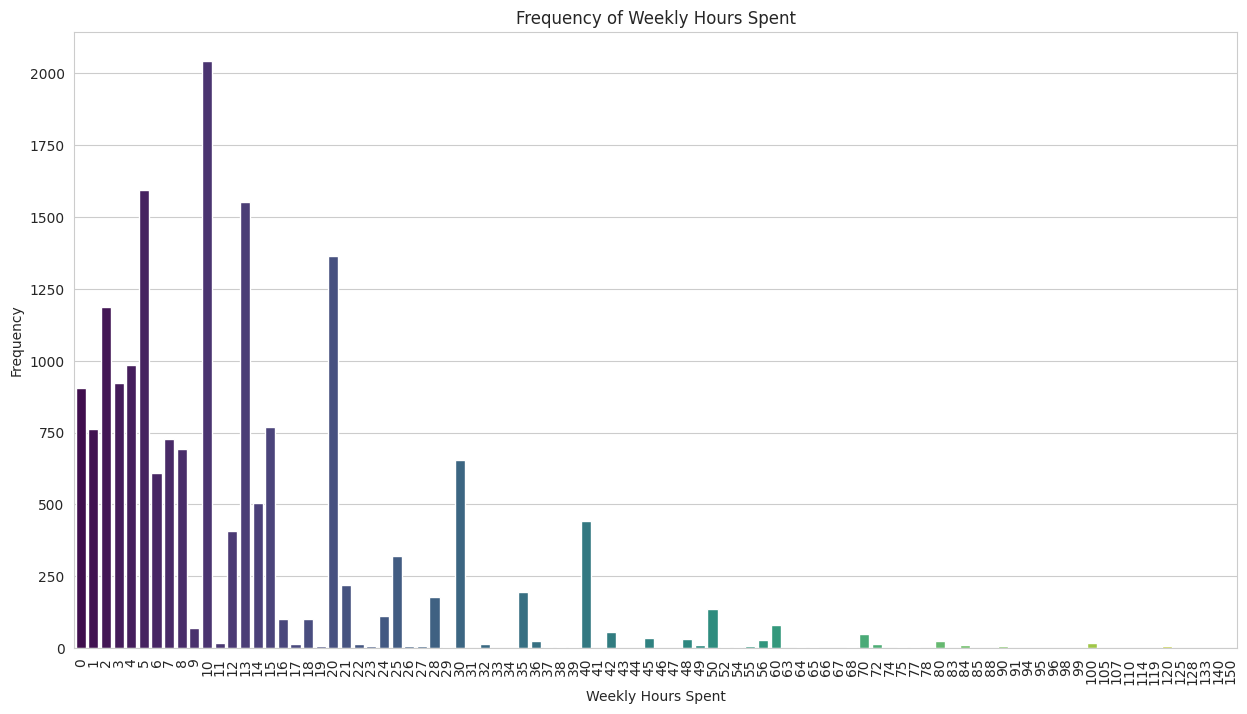

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'WeeklyHoursSpent' is the column with discrete or categorical data.
# df = pd.read_csv('your_data.csv')  # Load your data into the DataFrame

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a bar chart
plt.figure(figsize=(15, 8))
sns.countplot(x='WeeklyHoursSpent', data=df, palette='viridis')

plt.title('Frequency of Weekly Hours Spent')
plt.xlabel('Weekly Hours Spent')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-labels to make them readable

# Show plot
plt.show()

# **Cleaning 2nd attribute (MonthsProgExp)**

In [7]:
import pandas as pd

# Assuming df is your DataFrame and 'MonthsProgExp' is the column you're working with.

# Convert 'MonthsProgExp' to numeric, coercing errors to NaN
df['MonthsProgExp'] = pd.to_numeric(df['MonthsProgExp'], errors='coerce')

# Calculate the median of the 'MonthsProgExp' column, excluding NaN values
months_prog_exp_median = df['MonthsProgExp'].median()

# Replace NaN values in 'MonthsProgExp' with the calculated median and assign back to the DataFrame
df['MonthsProgExp'] = df['MonthsProgExp'].fillna(months_prog_exp_median).astype(int)

# Verify the changes
print(df['MonthsProgExp'].isnull().sum())  # Should be 0 if all NaNs are replaced
print(df['MonthsProgExp'].head())  # This will print the column to confirm the changes


0
1     6
4    24
5    50
6    36
7    30
Name: MonthsProgExp, dtype: int64


# **Before dealing with cleaning the third attribute, I want to see if the missing values of 'EduLevel' are missing on random or they are linked to a specific rigion so i can decide how i should approach the cleaning.**

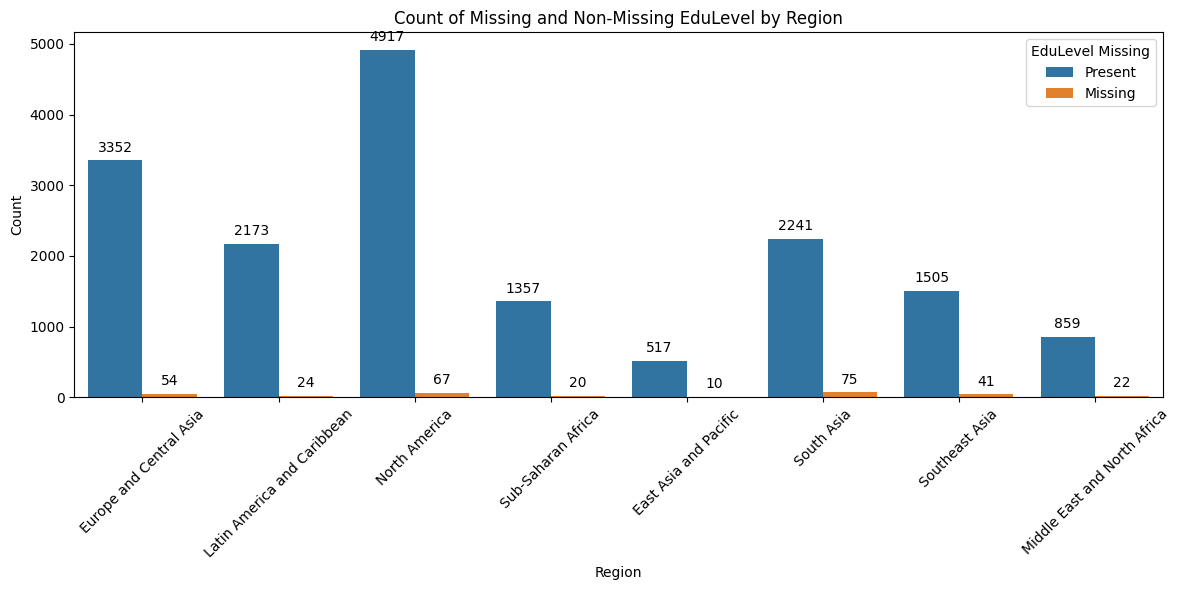

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and 'Region' is a column containing regional information
# df = pd.read_csv('your_data.csv')

# Assume 'Region' is the column in your DataFrame that contains the regional information
# Create a new column in df that indicates whether 'EduLevel' is missing
df['EduLevel_Missing'] = df['EduLevel'].isnull()

# Now create a count plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Region', hue='EduLevel_Missing')
plt.title('Count of Missing and Non-Missing EduLevel by Region')
plt.ylabel('Count')
plt.xlabel('Region')
plt.legend(title='EduLevel Missing', labels=['Present', 'Missing'])
plt.xticks(rotation=45)  # Rotates the labels on the x-axis for better readability

# Add annotations to each bar showing the count of entries
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


# **Cleaning the 3rd attribute (edulevel) by creating a new category "no formal educatoin"**

In [23]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'EduLevel' is the column with missing values.

# Create a new category for missing values in the 'EduLevel' column
df['EduLevel'].fillna('No Formal Education', inplace=True)

# Verify the changes by viewing the count of each category in 'EduLevel'
edu_level_counts = df['EduLevel'].value_counts()

# Display the counts of each educational level
print(edu_level_counts)

EduLevel
Bachelor’s degree                           3412
Some college credit, no degree              1587
High school diploma or equivalent (GED)     1154
Master's degree (non-professional)           773
Professional degree (MBA, MD, JD, etc.)      557
Trade, technical, or vocational training     459
Associate’s degree                           442
Some high school                             363
No high school (secondary school)            108
Ph.D.                                        101
No Formal Education                           19
Name: count, dtype: int64


# **Cleaning the missing values for my 4th attribute (employment status) by just dropping the missing values**

In [221]:
df = df.dropna(subset=['EmploymentStatus'])

# **cleaning 5th attribute (annualincomeusd)**

In [17]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns   

df = df.dropna()
df = df[df["AnnualIncomeUSD"] != 'I don’t know']
df = df[df["AnnualIncomeUSD"] != "I don't want to answer"]
df = df[df["AnnualIncomeUSD"] != "None"]
income_level_order = [[
                       'Under $1,000',
                       '$1,000 to $2,999',
                       '$3,000 to $4,999',
                       '$5,000 to $6,999', 
                       '$7,000 to $9,999',
                       '$10,000 to $14,999',
                       '$15,000 to $19,999',
                       '$20,000 to $24,999',
                       '$25,000 to $29,999',
                       '$30,000 to $34,999', 
                       '$35,000 to $39,999',
                       '$40,000 to $49,999',
                       '$50,000 to $59,999',
                       '$60,000 to $74,999',
                       '$75,000 to $89,999',
                       '$90,000 to $119,999',
                       '$120,000 to $159,999',
                       '$160,000 to $199,999', 
                       '$200,000 to $249,999',
                       '$250,000 or over',]] 
encoder = OrdinalEncoder(categories = income_level_order)  
df['IncomeLevel'] = encoder.fit_transform(df[['AnnualIncomeUSD']])

<Axes: xlabel='count', ylabel='IncomeLevel'>

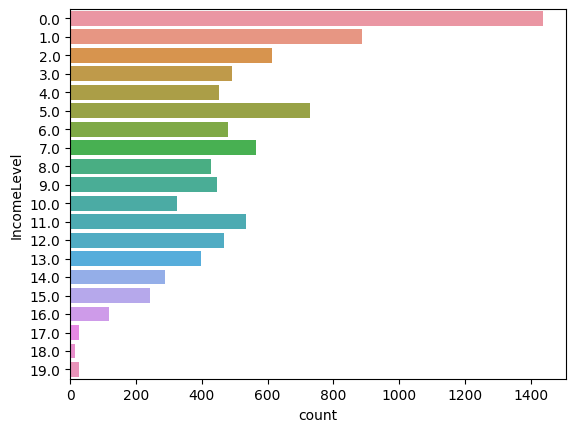

In [6]:
sns.countplot(y = 'IncomeLevel', data = df)

In [15]:
# Assuming 'df' is your DataFrame and 'AnnualIncomeUSD' is the column with income data
income_frequency = df['AnnualIncomeUSD'].value_counts()

# Display the frequency of each unique value in the 'AnnualIncomeUSD' column
print(income_frequency)


AnnualIncomeUSD
Under $1,000            1436
$1,000 to $2,999         887
$10,000 to $14,999       728
$3,000 to $4,999         614
$20,000 to $24,999       564
$40,000 to $49,999       535
$5,000 to $6,999         493
$15,000 to $19,999       480
$50,000 to $59,999       468
$7,000 to $9,999         454
$30,000 to $34,999       447
$25,000 to $29,999       427
$60,000 to $74,999       398
$35,000 to $39,999       326
$75,000 to $89,999       287
$90,000 to $119,999      244
$120,000 to $159,999     119
$160,000 to $199,999      27
$250,000 or over          26
$200,000 to $249,999      15
Name: count, dtype: int64


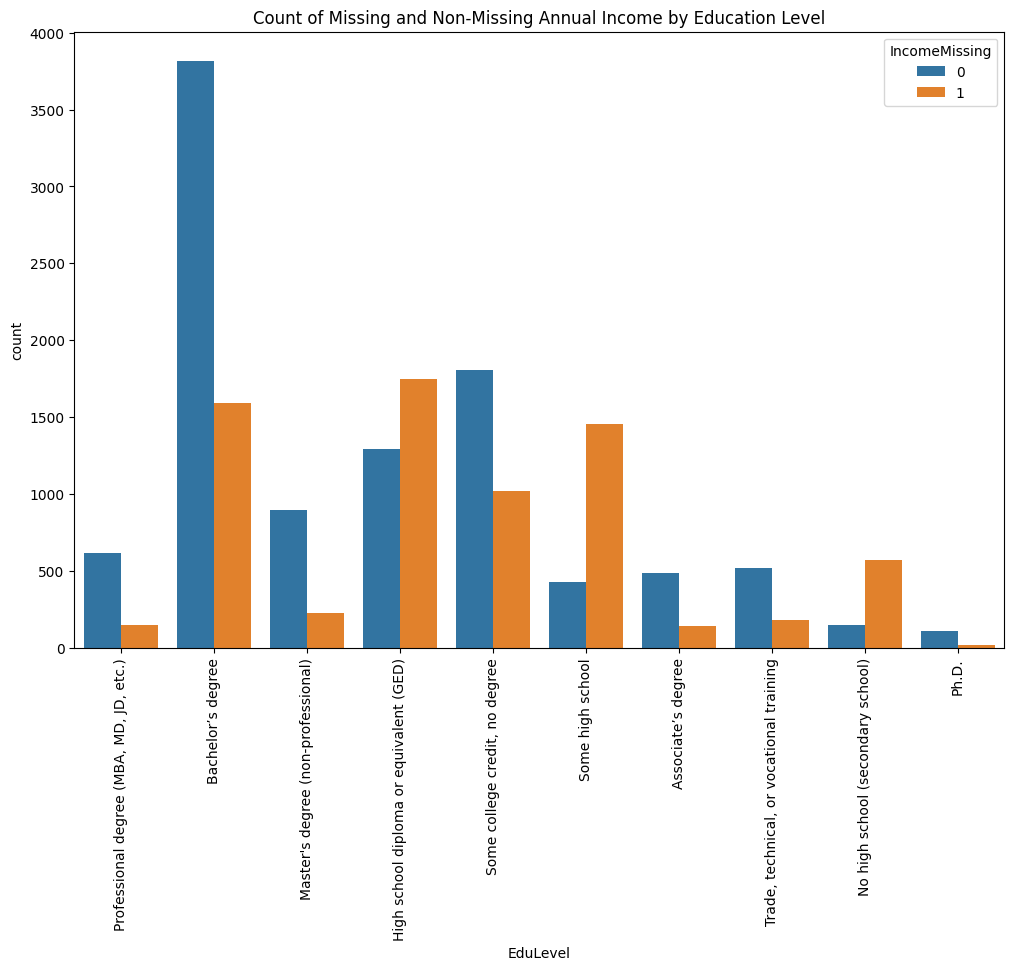

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# and it contains 'AnnualIncomeUSD' and 'EduLevel' columns

# Create a new column in the Data.Frame to indicate missing income values
df['IncomeMissing'] = df['AnnualIncomeUSD'].isnull().astype(int)

# Now visualize the relationship using a count plot
plt.figure(figsize=(12, 8))
sns.countplot(x='EduLevel', hue='IncomeMissing', data=df)
plt.xticks(rotation=90)  # Rotate the labels on x-axis for better readability
plt.title('Count of Missing and Non-Missing Annual Income by Education Level')
plt.show()


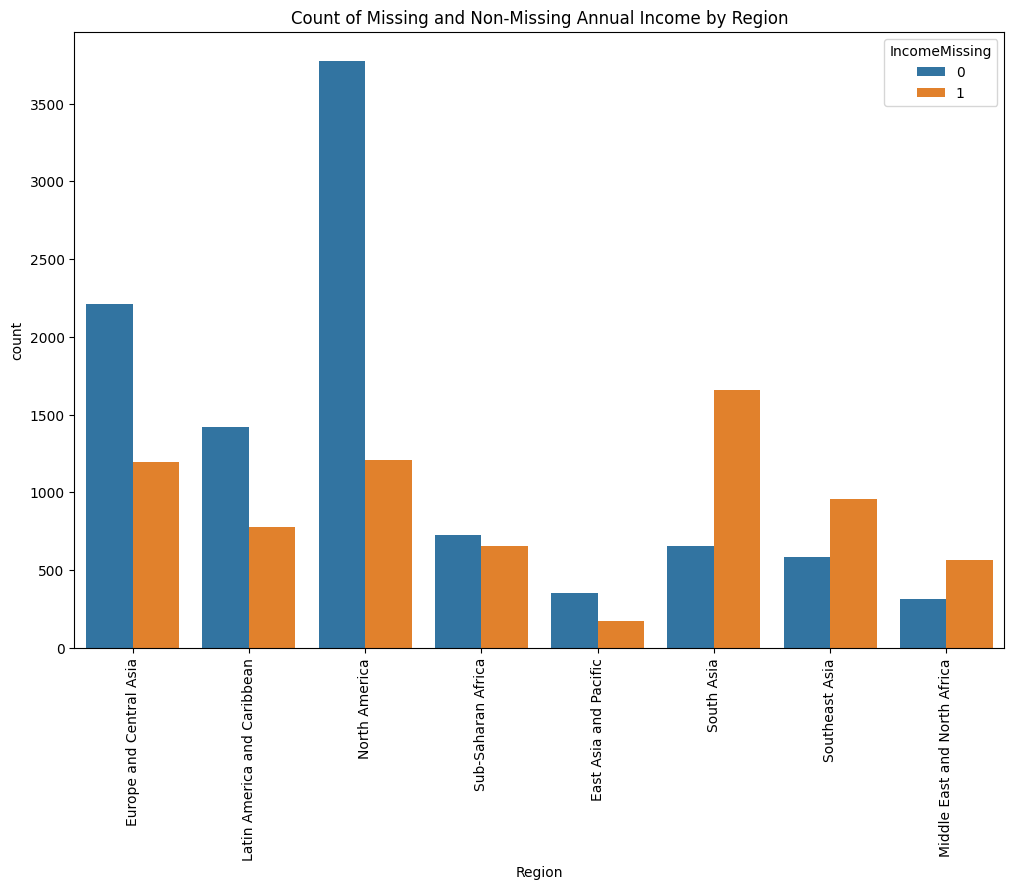

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['IncomeMissing'] = df['AnnualIncomeUSD'].isnull().astype(int)

# Now visualize the relationship using a count plot
plt.figure(figsize=(12, 8))
sns.countplot(x='Region', hue='IncomeMissing', data=df)
plt.xticks(rotation=90)  # Rotate the labels on x-axis for better readability
plt.title('Count of Missing and Non-Missing Annual Income by Region')
plt.show()

# **Cleaning 6th attribute "age"**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


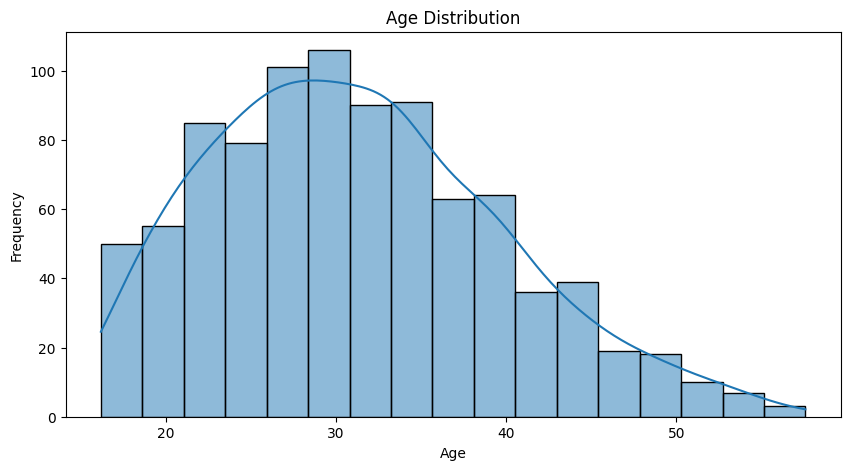

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Dummy data for example purposes
np.random.seed(0)
age_data = np.random.normal(30, 10, 1000)  # Generating some normal distributed ages
age_data = np.append(age_data, [np.nan, np.nan, np.nan, 120, 1])  # Adding outliers and missing values

# Convert to a DataFrame
df = pd.DataFrame(age_data, columns=['Age'])

# Drop unrealistic ages (e.g., below 16 or above 100)
df = df[(df['Age'] >= 16) & (df['Age'] <= 100)]

# Plotting the distribution of the 'Age' column
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'].dropna(), kde=True)  # Drop NaN for visualization
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [223]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'Age' is the column of interest

# Check for unrealistic values and set them as NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Coerce errors to NaN
df.loc[df['Age'] < 16, 'Age'] = None  # Replace ages below 16 with NaN
df.loc[df['Age'] > 100, 'Age'] = None  # Replace ages above 100 with NaN

# Impute missing values with the median
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# Convert to integers
df['Age'] = df['Age'].astype(int)

# Verify changes
print(df['Age'].describe())


count    916.000000
mean      30.692140
std        8.504527
min       16.000000
25%       24.000000
50%       30.000000
75%       36.000000
max       57.000000
Name: Age, dtype: float64


/tmp/ipykernel_33/402390128.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


# **This is the updated dataframe that i will put on the report once i finish cleaning all the data**

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
survey = pd.read_csv("/kaggle/input/2021-new-coder-survey/2021 New Coder Survey.csv")

df = pd.DataFrame(columns=['WeeklyHoursSpent','MonthsProgExp','EduLevel','EmploymentStatus','AnnualIncomeUSD','Age','InterestInDevCareer','Region'])
df['WeeklyHoursSpent'] = survey.iloc[:, 7]  
df['MonthsProgExp'] = survey.iloc[:, 8]
df['EduLevel'] = survey.iloc[:, 32]
df['EmploymentStatus'] = survey.iloc[:, 10]
df['AnnualIncomeUSD'] = survey.iloc[:, 22]
df['Age'] = survey.iloc[:, 23]
df['InterestInDevCareer'] = survey.iloc[:, 12]
df['Region'] = survey.iloc[:, 26]

# Filter out entries with 'WeeklyHoursSpent' over 100
df = df[df['WeeklyHoursSpent'] <= 100]

# Impute missing values for 'WeeklyHoursSpent' with the rounded mean value
weekly_hours_mean = round(df['WeeklyHoursSpent'].mean())
df['WeeklyHoursSpent'].fillna(weekly_hours_mean, inplace=True)

# Convert 'MonthsProgExp' to a numeric type, coercing errors (which turns non-convertible values into NaN)
df['MonthsProgExp'] = pd.to_numeric(df['MonthsProgExp'], errors='coerce')

# Drop entries with more than 500 months of experience
df = df[df['MonthsProgExp'] <= 500]

# Impute missing values for 'MonthsProgExp' with the median value
df['MonthsProgExp'] = pd.to_numeric(df['MonthsProgExp'], errors='coerce')
months_prog_exp_median = df['MonthsProgExp'].median()
df['MonthsProgExp'].fillna(months_prog_exp_median, inplace=True)

# Calculate the maximum experience allowed which is 75% of age in months
df['MaxExp'] = (df['Age'] * 12) * 0.75

# Drop rows where the programming experience in months is greater than 75% of age in months
df = df[df['MonthsProgExp'] <= df['MaxExp']]

# Create a new category for missing values in 'EduLevel'
df['EduLevel'].fillna('No Formal Education', inplace=True)

# Drop rows with missing values in 'EmploymentStatus'
df.dropna(subset=['EmploymentStatus'], inplace=True)

#Remove unwanted categories from 'AnnualIncomeUSD'
df = df[df["AnnualIncomeUSD"] != 'I don’t know']
df = df[df["AnnualIncomeUSD"] != "I don't want to answer"]
df = df[df["AnnualIncomeUSD"] != "None"]

# Drop all null values from 'AnnualIncomeUSD'
df = df.dropna(subset=['AnnualIncomeUSD'])

# For 'Age', let's assume you've cleaned it by imputing with median
age_median = df['Age'].median()
df['Age'].fillna(age_median, inplace=True)

# Remove entries where age is less than 15 or greater than 80
df = df[(df['Age'] >= 15) & (df['Age'] <= 80)]

# Drop rows with missing values in 'InterestInDevCareer'
df = df.dropna(subset=['InterestInDevCareer'])

# Drop rows with missing values in 'Region'
df = df.dropna(subset=['Region'])
df.drop('MaxExp', axis=1, inplace=True)
# Ensure all changes are applied and data types are consistent
df['WeeklyHoursSpent'] = df['WeeklyHoursSpent'].astype(int)
df['MonthsProgExp'] = df['MonthsProgExp'].astype(int)
df['Age'] = df['Age'].astype(int)

# Remove all remaining rows with any null values to ensure a completely clean dataset
df = df.dropna()
# View the DataFrame to confirm changes
df

WeeklyHoursSpent  MonthsProgExp  \
1                    10              6   
4                     2             24   
5                    10             50   
6                     5             36   
7                    20             30   
...                 ...            ...   
18119                30             15   
18120                10              1   
18123                10             13   
18124                 6             36   
18125                 5            200   

                                      EduLevel EmploymentStatus  \
1                            Bachelor’s degree               No   
4                            Bachelor’s degree              Yes   
5                            Bachelor’s degree              Yes   
6               Some college credit, no degree              Yes   
7                            Bachelor’s degree              Yes   
...                                        ...              ...   
18119           Some college credit, no degree               No   
18120                        Bachelor’s degree               No   
18123                       Associate’s degree               No   
18124  Professional degree (MBA, MD, JD, etc.)              Yes   
18125       Master's degree (non-professional)               No   

          AnnualIncomeUSD  Age       InterestInDevCareer  \
1            Under $1,000   38  I am already a developer   
4      $40,000 to $49,999   35  I am already a developer   
5      $75,000 to $89,999   27  I am already a developer   
6      $60,000 to $74,999   24  I am already a developer   
7        $1,000 to $2,999   23  I am already a developer   
...                   ...  ...                       ...   
18119        Under $1,000   32                       Yes   
18120  $10,000 to $14,999   37                       Yes   
18123  $20,000 to $24,999   23                       Yes   
18124  $30,000 to $34,999   34  I am already a developer   
18125  $10,000 to $14,999   44                        No   

                            Region  
1      Latin America and Caribbean  
4            East Asia and Pacific  
5                    North America  
6                    North America  
7          Europe and Central Asia  
...                            ...  
18119      Europe and Central Asia  
18120      Europe and Central Asia  
18123                North America  
18124      Europe and Central Asia  
18125      Europe and Central Asia  

[8975 rows x 8 columns]

# **EDA**

**Outliers for MonthsProgExp**

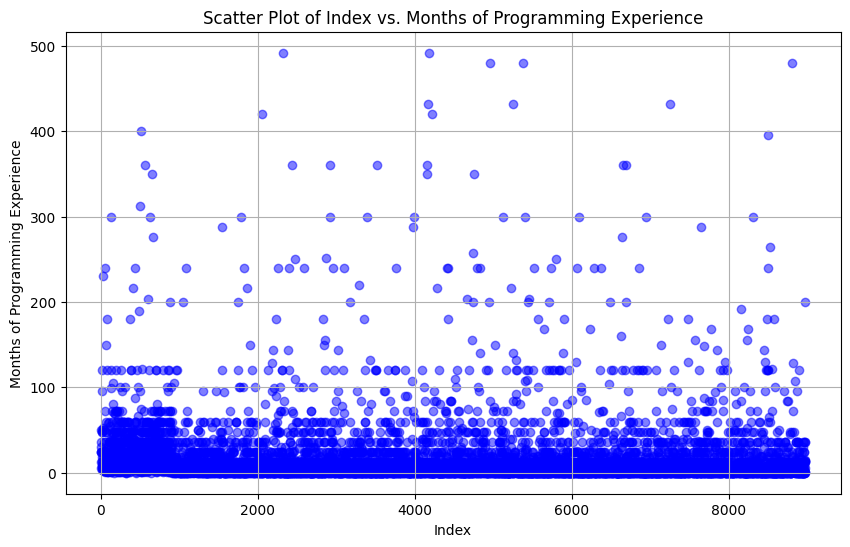

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(df['MonthsProgExp'])), df['MonthsProgExp'], alpha=0.5, c='blue')
plt.title('Scatter Plot of Index vs. Months of Programming Experience')
plt.xlabel('Index')
plt.ylabel('Months of Programming Experience')
plt.grid(True)
plt.show()

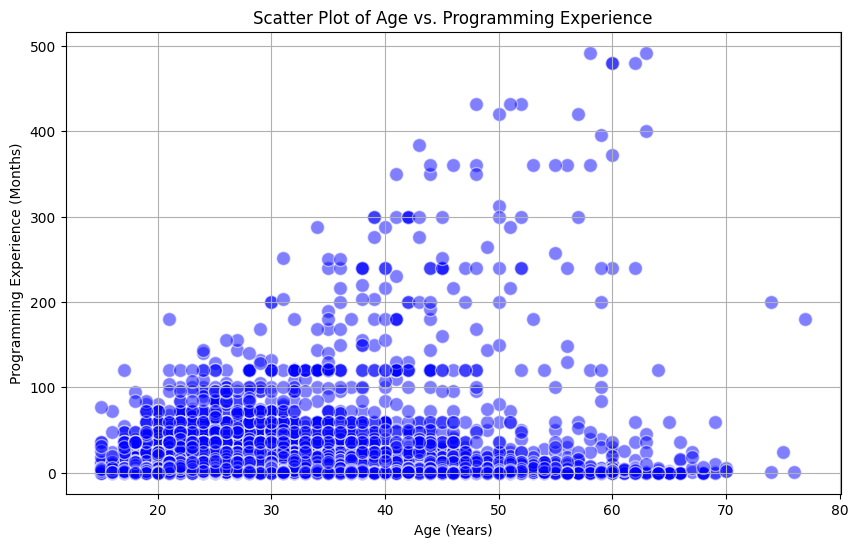

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it's already loaded with data.
# Filter out negative values in 'MonthsProgExp'
df = df[df['MonthsProgExp'] >= 0]

# Now create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['MonthsProgExp'], alpha=0.5, c='blue', edgecolors='w', s=100)
plt.title('Scatter Plot of Age vs. Programming Experience')
plt.xlabel('Age (Years)')
plt.ylabel('Programming Experience (Months)')
plt.grid(True)
plt.show()


In [7]:
# import pandas as pd

# Assuming 'df' is your DataFrame and it's already loaded with data.
# And 'MonthsProgExp' is the column with programming experience in months.

# Now, calculate the frequency of each unique value in descending order
monthsprogexp_freq = df['MonthsProgExp'].value_counts().sort_index(ascending=False)

print(monthsprogexp_freq)

MonthsProgExp
492       2
480       3
432       3
420       2
400       1
       ... 
4       336
3       640
2       824
1      1532
0      1691
Name: count, Length: 126, dtype: int64


# **Provide a table of descriptive statistics for all numerical features.**

In [5]:
descriptive_stats = df[['WeeklyHoursSpent', 'MonthsProgExp', 'Age']].describe()

print(descriptive_stats)

       WeeklyHoursSpent  MonthsProgExp          Age
count       8975.000000    8975.000000  8975.000000
mean          11.904401      14.800780    30.470529
std           12.272389      35.484067     9.360223
min            0.000000       0.000000    15.000000
25%            4.000000       1.000000    24.000000
50%            8.000000       3.000000    28.000000
75%           15.000000      12.000000    35.000000
max          100.000000     492.000000    77.000000


# **Visual Representation of EDULEVEL attribute using pie chart**

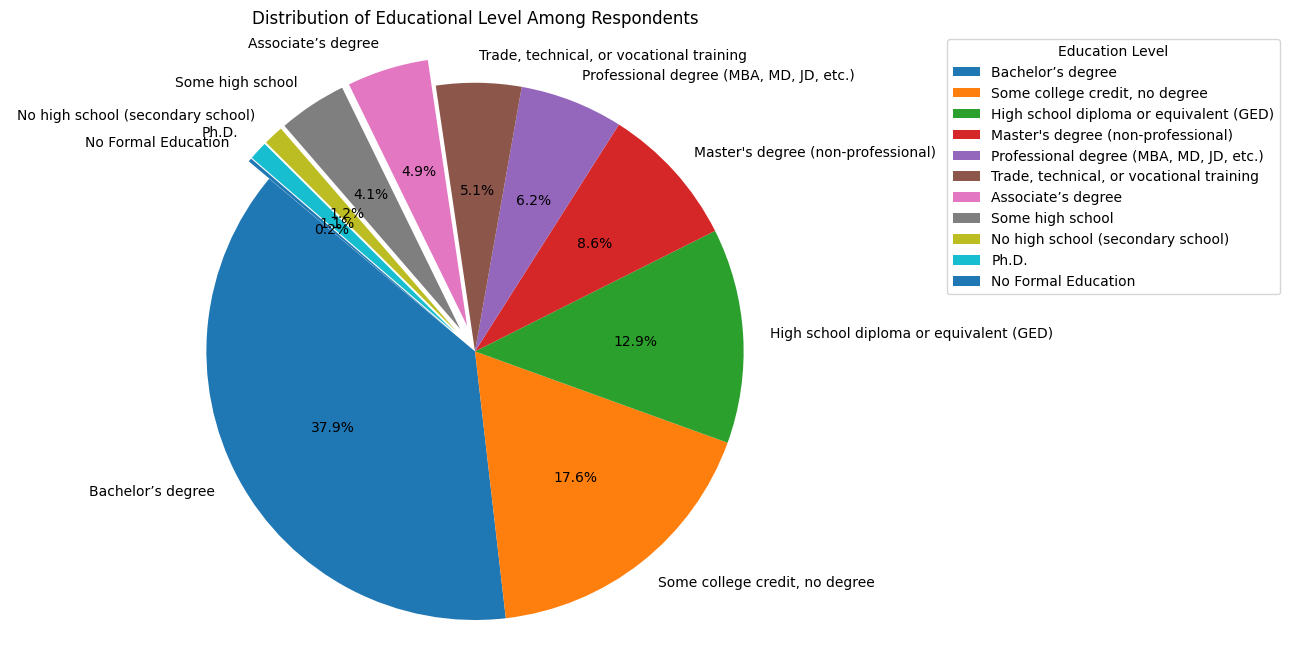

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data for the pie chart
edu_counts = df['EduLevel'].value_counts()

# Define the explode configuration to separate smaller slices
explode_values = [0.1 if (percent < 5) else 0 for percent in (edu_counts/edu_counts.sum() * 100)]

# Create the pie chart
plt.figure(figsize=(12, 8))
plt.pie(edu_counts, labels=edu_counts.index, autopct='%1.1f%%', startangle=140, explode=explode_values)

# Move the legend to a better place
plt.legend(title='Education Level', loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Distribution of Educational Level Among Respondents')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

# **Exploring Relationship between income and age using a scatter plot**

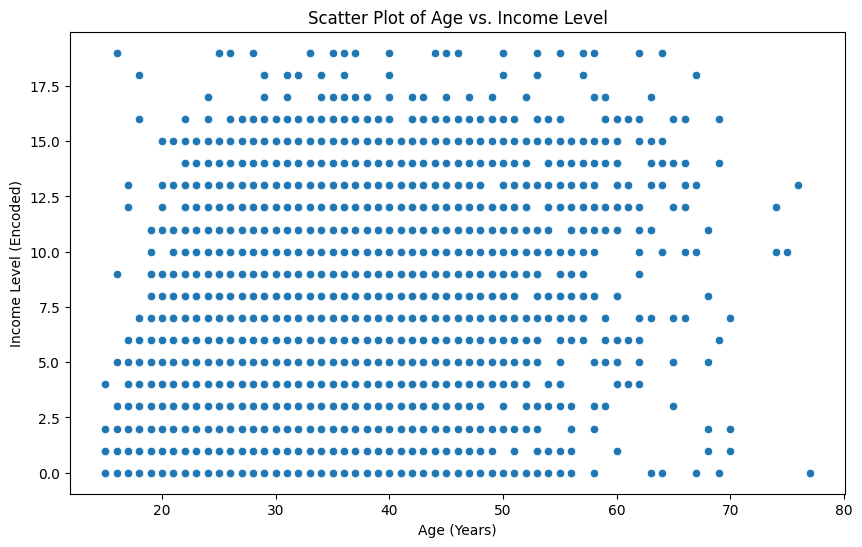

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your updated DataFrame with 'Age' and 'IncomeLevel' columns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='IncomeLevel', data=df)

plt.title('Scatter Plot of Age vs. Income Level')
plt.xlabel('Age (Years)')
plt.ylabel('Income Level (Encoded)')

plt.show()

# **Exploring Relationship between income and education level using a scatter plot**

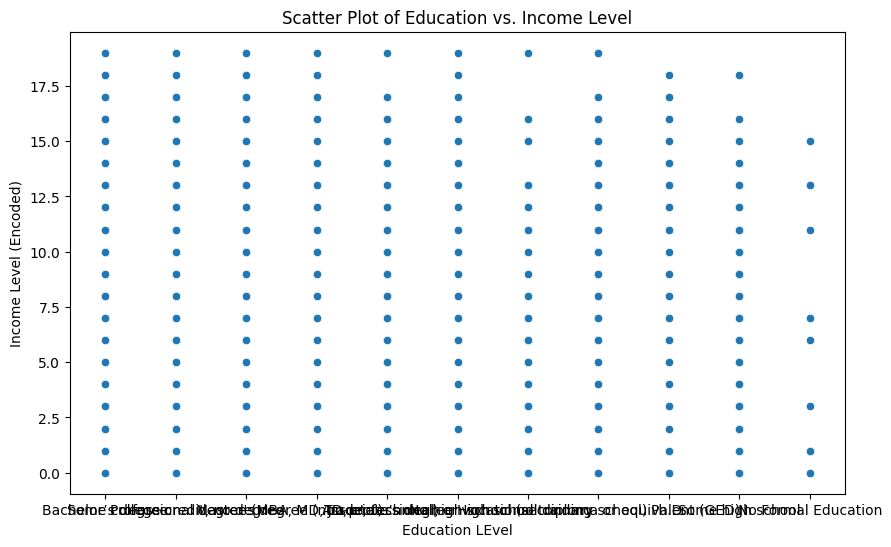

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your updated DataFrame with 'Age' and 'IncomeLevel' columns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EduLevel', y='IncomeLevel', data=df)

plt.title('Scatter Plot of Education vs. Income Level')
plt.xlabel('Education LEvel')
plt.ylabel('Income Level (Encoded)')

plt.show()

# **Exploring Relationship between income and Region using a scatter plot**

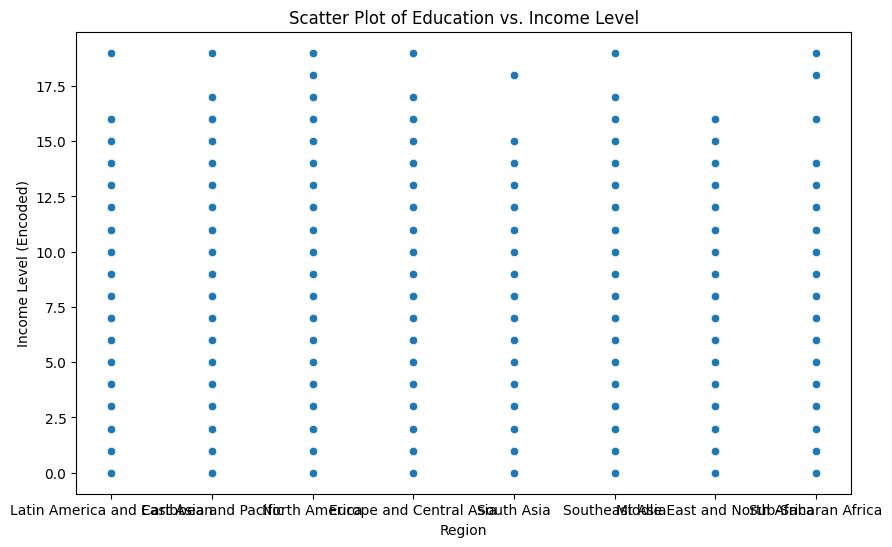

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your updated DataFrame with 'Age' and 'IncomeLevel' columns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Region', y='IncomeLevel', data=df)

plt.title('Scatter Plot of Education vs. Income Level')
plt.xlabel('Region')
plt.ylabel('Income Level (Encoded)')

plt.show()

# **scatter plot experimenting**

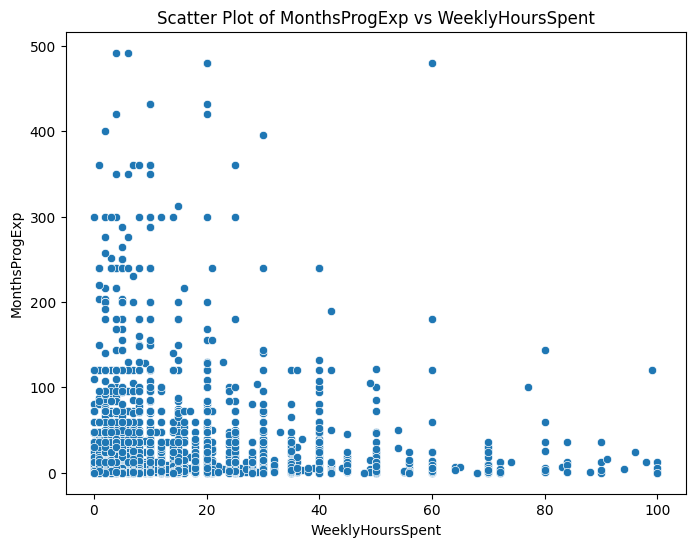

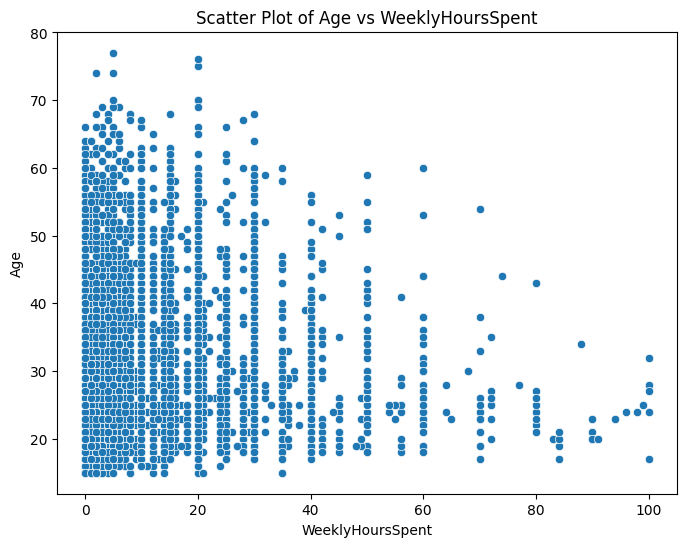

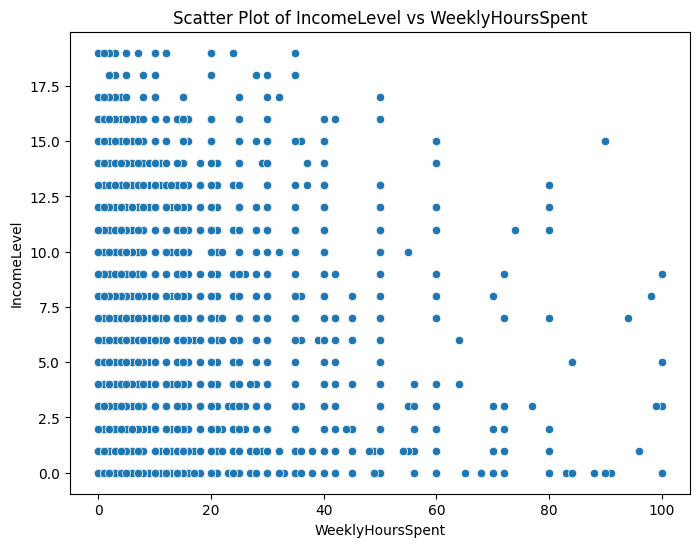

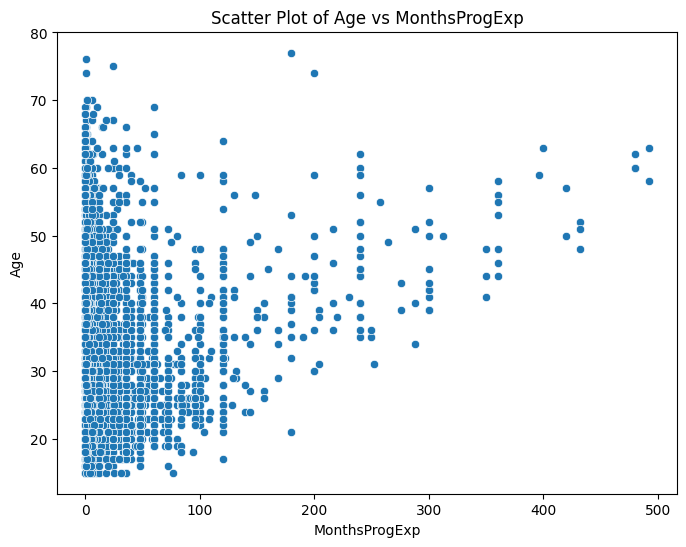

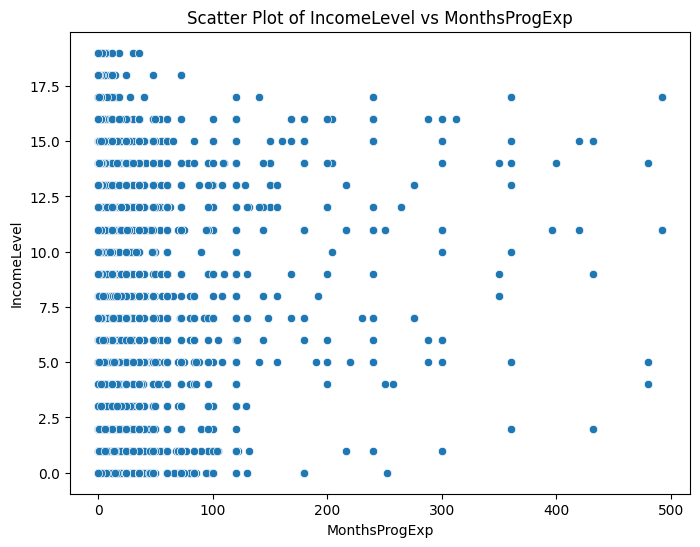

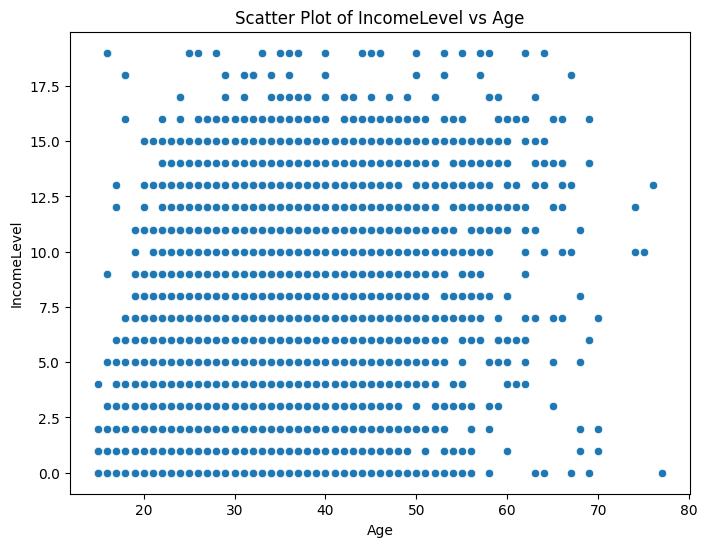

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it includes 'IncomeLevel' as the encoded income attribute
# and 'WeeklyHoursSpent', 'MonthsProgExp', 'Age' as numerical attributes.

attributes = ['WeeklyHoursSpent', 'MonthsProgExp', 'Age', 'IncomeLevel']
num_attributes = len(attributes)

# Create scatter plots for each combination of attributes
for i in range(num_attributes):
    for j in range(i+1, num_attributes):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=attributes[i], y=attributes[j])
        plt.title(f'Scatter Plot of {attributes[j]} vs {attributes[i]}')
        plt.xlabel(attributes[i])
        plt.ylabel(attributes[j])
        plt.show()


# **Bar chart Experimenting**

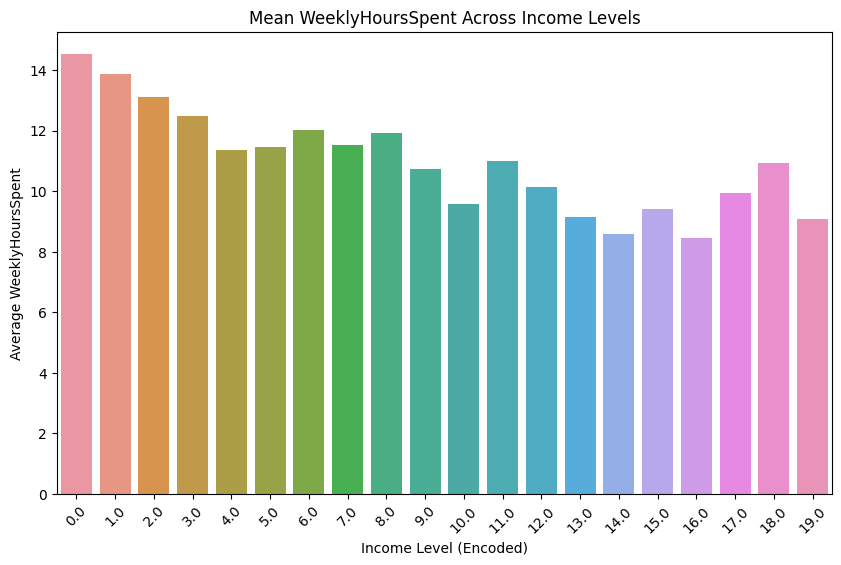

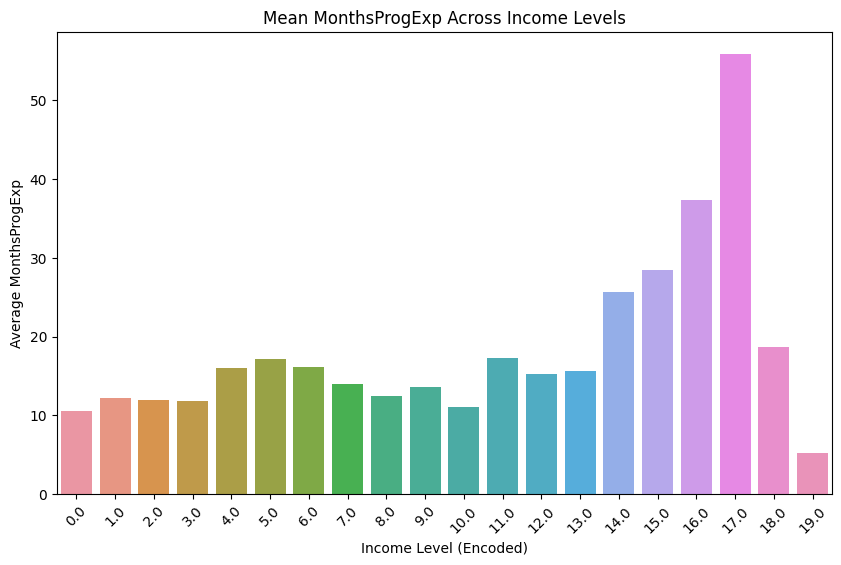

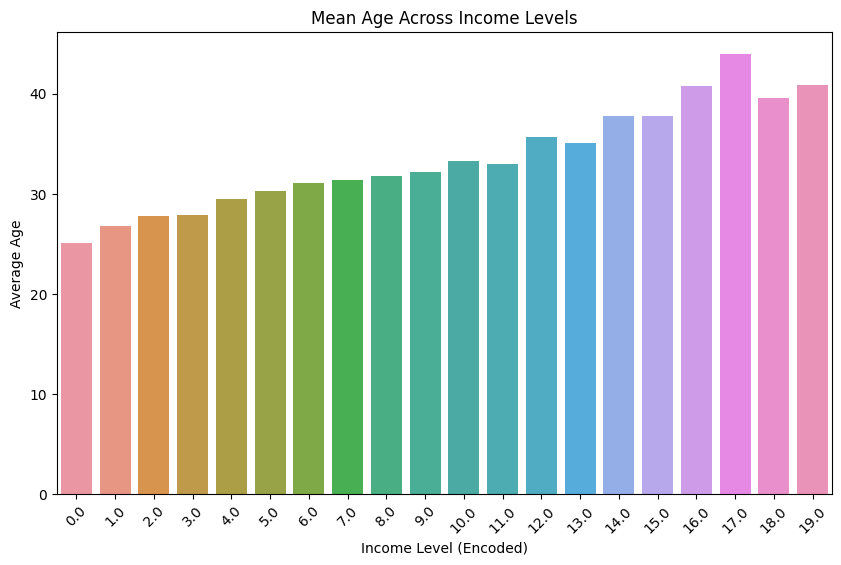

In [23]:
# Create bar charts for numerical attributes across encoded 'IncomeLevel'
for attribute in ['WeeklyHoursSpent', 'MonthsProgExp', 'Age']:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='IncomeLevel', y=attribute, data=df, ci=None)  # ci=None removes the confidence interval lines
    plt.title(f'Mean {attribute} Across Income Levels')
    plt.xlabel('Income Level (Encoded)')
    plt.ylabel(f'Average {attribute}')
    plt.xticks(rotation=45)  # Rotates the x labels to prevent overlap
    plt.show()

# **More experimenting **

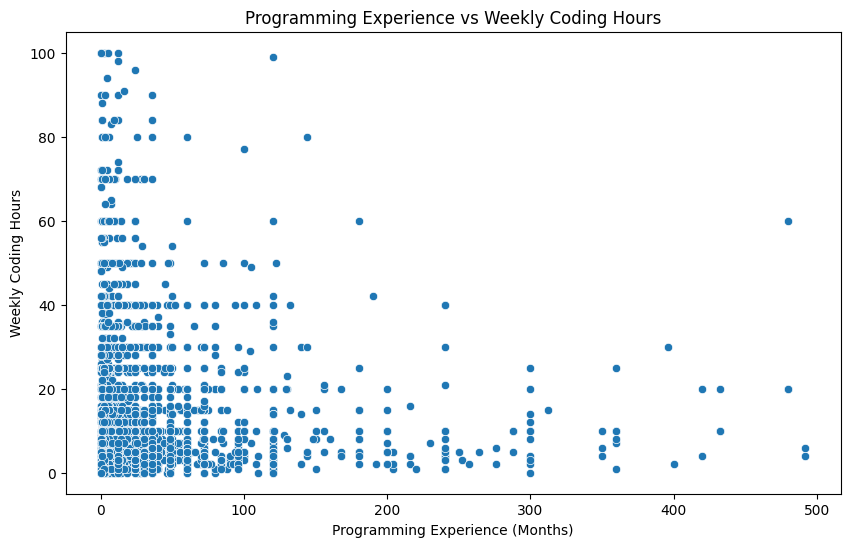

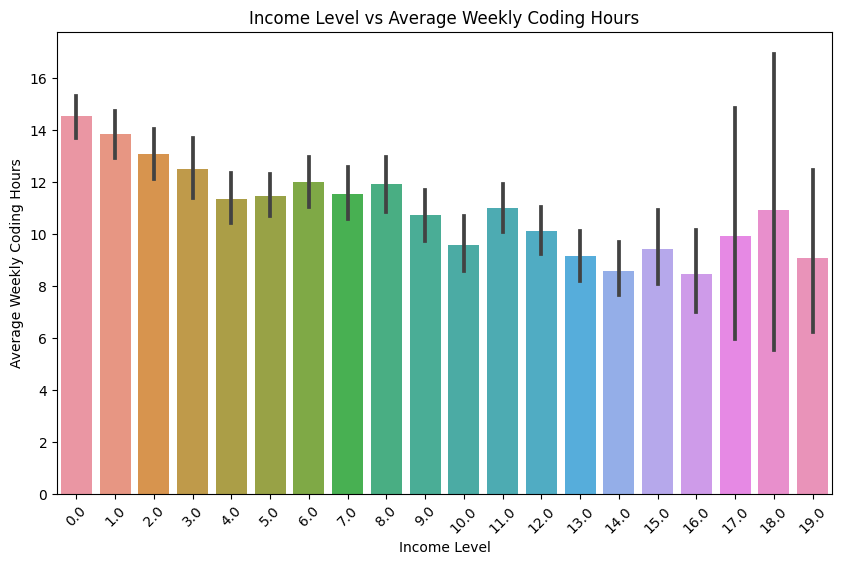

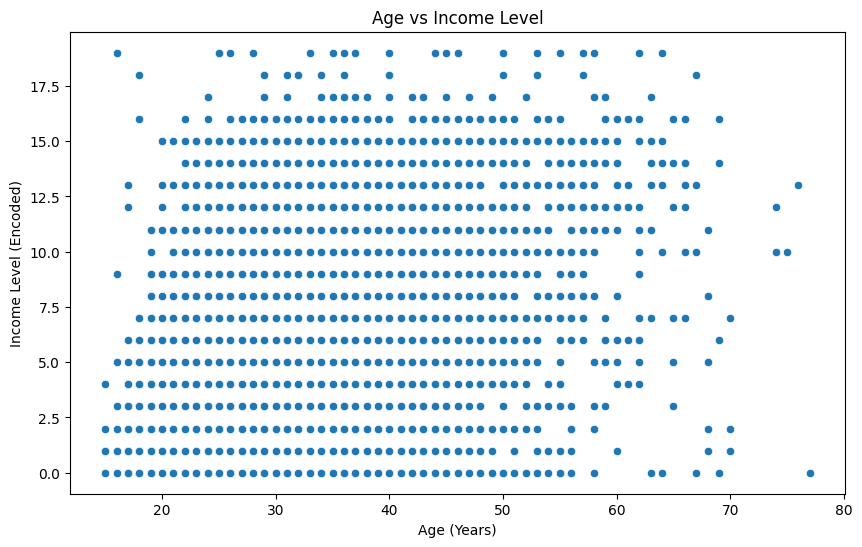

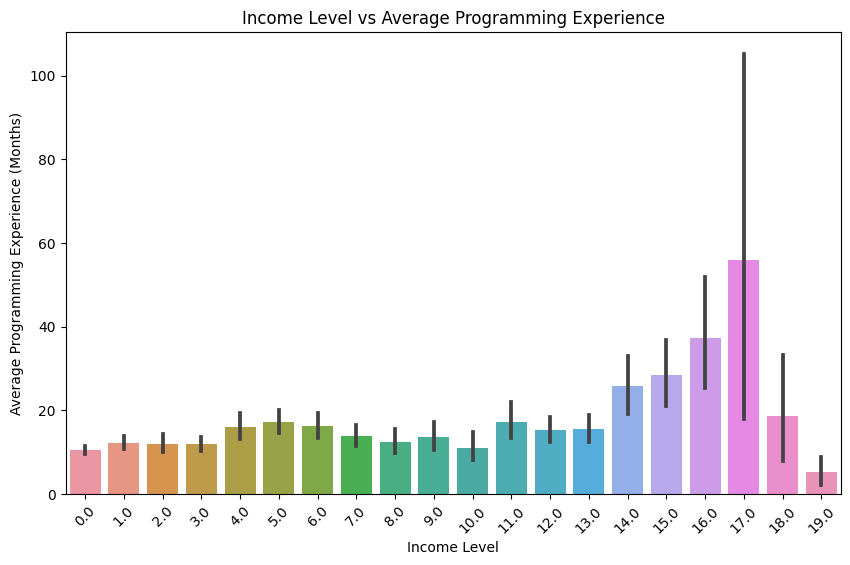

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with the data loaded.

# 1. Scatter plot of 'MonthsProgExp' vs 'WeeklyHoursSpent'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthsProgExp', y='WeeklyHoursSpent', data=df)
plt.title('Programming Experience vs Weekly Coding Hours')
plt.xlabel('Programming Experience (Months)')
plt.ylabel('Weekly Coding Hours')
plt.show()

# 2. Bar chart of 'IncomeLevel' vs Average 'WeeklyHoursSpent'
plt.figure(figsize=(10, 6))
sns.barplot(x='IncomeLevel', y='WeeklyHoursSpent', data=df, estimator=np.mean)
plt.title('Income Level vs Average Weekly Coding Hours')
plt.xlabel('Income Level')
plt.ylabel('Average Weekly Coding Hours')
plt.xticks(rotation=45)
plt.show()

# 3. Scatter plot of 'Age' vs 'IncomeLevel'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='IncomeLevel', data=df)
plt.title('Age vs Income Level')
plt.xlabel('Age (Years)')
plt.ylabel('Income Level (Encoded)')
plt.show()

# 4. Bar chart of 'IncomeLevel' vs Average 'MonthsProgExp'
plt.figure(figsize=(10, 6))
sns.barplot(x='IncomeLevel', y='MonthsProgExp', data=df, estimator=np.mean)
plt.title('Income Level vs Average Programming Experience')
plt.xlabel('Income Level')
plt.ylabel('Average Programming Experience (Months)')
plt.xticks(rotation=45)
plt.show()


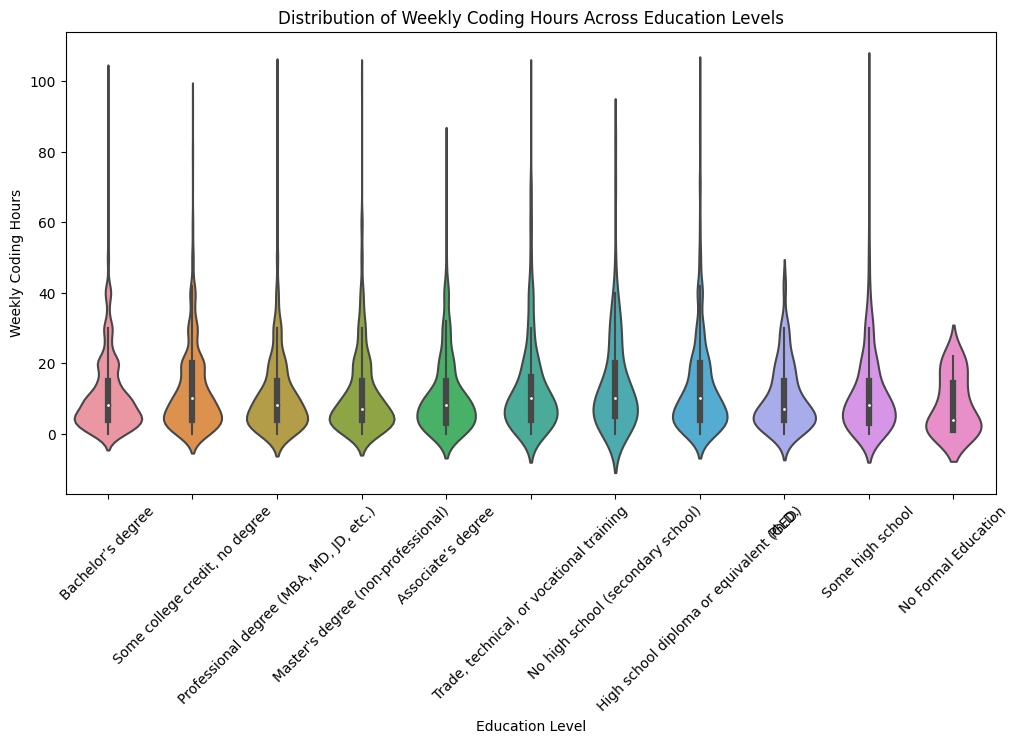

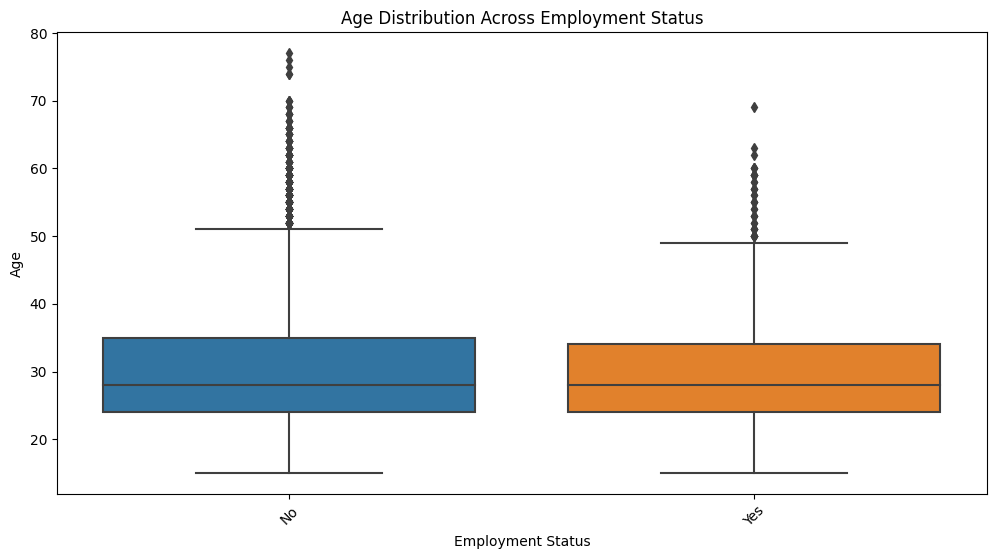

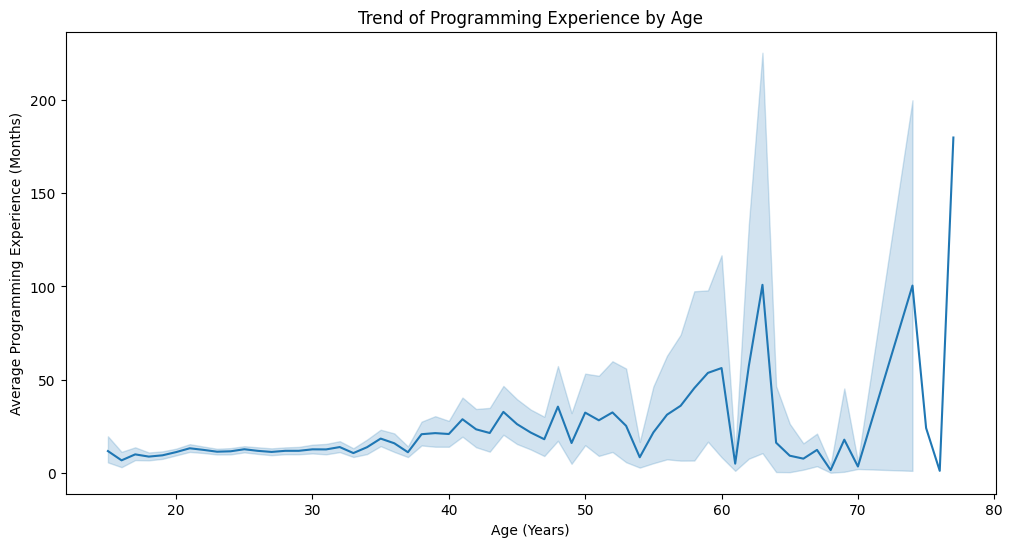

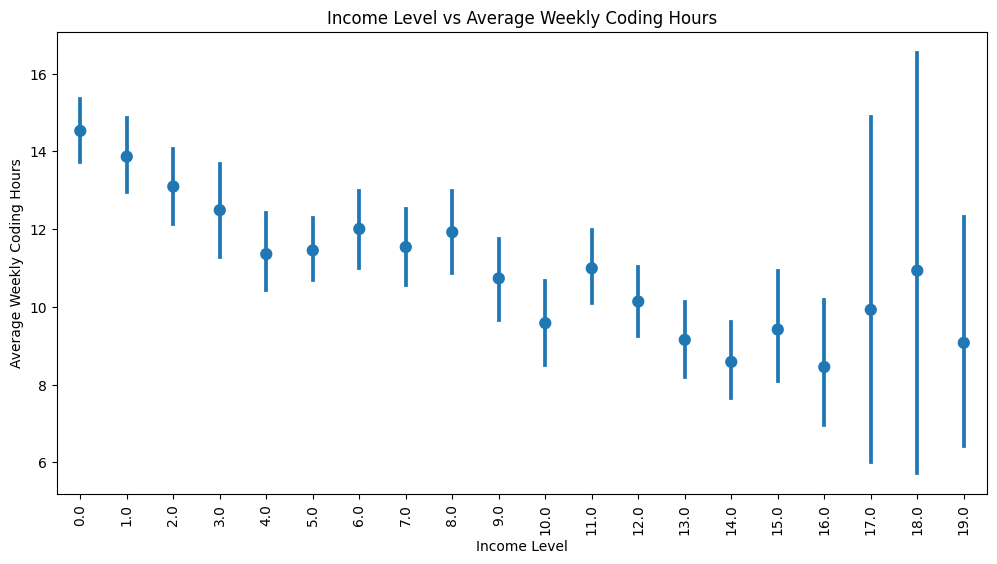

<Figure size 1200x600 with 0 Axes>

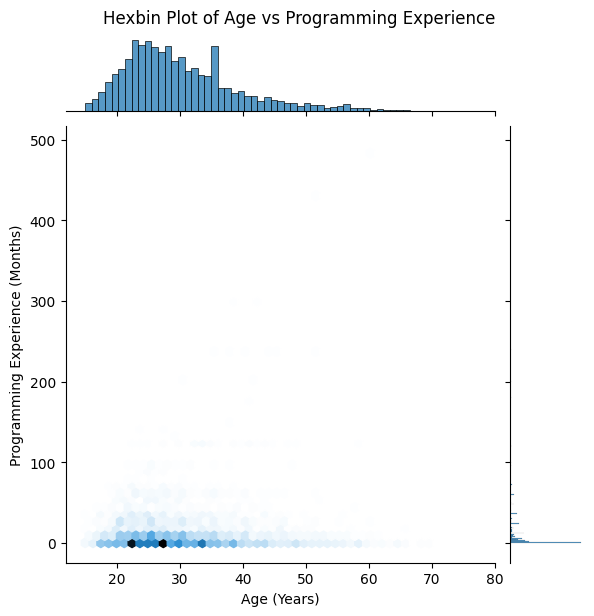

In [25]:
# 2. Box plot of 'EmploymentStatus' vs 'Age'
plt.figure(figsize=(12, 6))
sns.boxplot(x='EmploymentStatus', y='Age', data=df)
plt.title('Age Distribution Across Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

# 3. Line plot for 'Age' vs Average 'MonthsProgExp'
plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='MonthsProgExp', data=df, estimator=np.mean)
plt.title('Trend of Programming Experience by Age')
plt.xlabel('Age (Years)')
plt.ylabel('Average Programming Experience (Months)')
plt.show()

# 4. Point plot of 'IncomeLevel' vs Average 'WeeklyHoursSpent'
plt.figure(figsize=(12, 6))
sns.pointplot(x='IncomeLevel', y='WeeklyHoursSpent', data=df, join=False)
plt.title('Income Level vs Average Weekly Coding Hours')
plt.xlabel('Income Level')
plt.ylabel('Average Weekly Coding Hours')
plt.xticks(rotation=90)
plt.show()

# 5. Hexbin plot of 'Age' vs 'MonthsProgExp'
plt.figure(figsize=(12, 6))
sns.jointplot(x='Age', y='MonthsProgExp', kind='hex', data=df)
plt.suptitle('Hexbin Plot of Age vs Programming Experience', y=1.02)
plt.xlabel('Age (Years)')
plt.ylabel('Programming Experience (Months)')
plt.show()


# **Experimenting with 3 attributes**

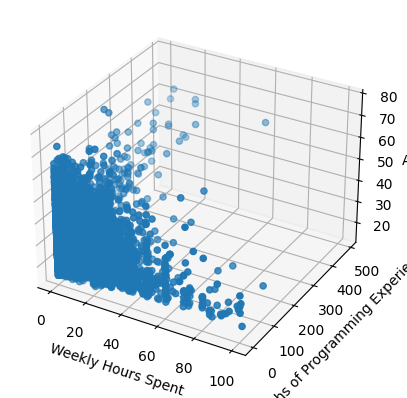

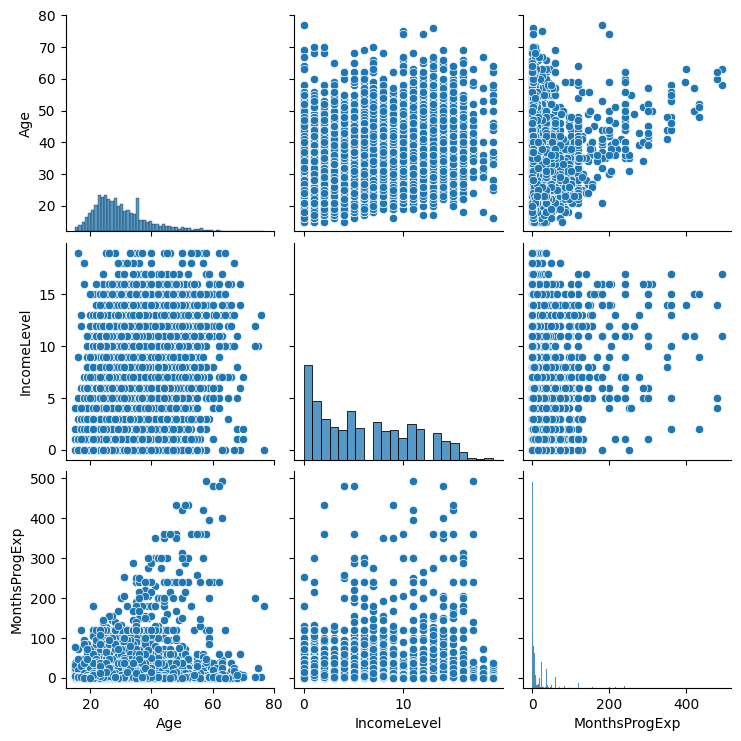

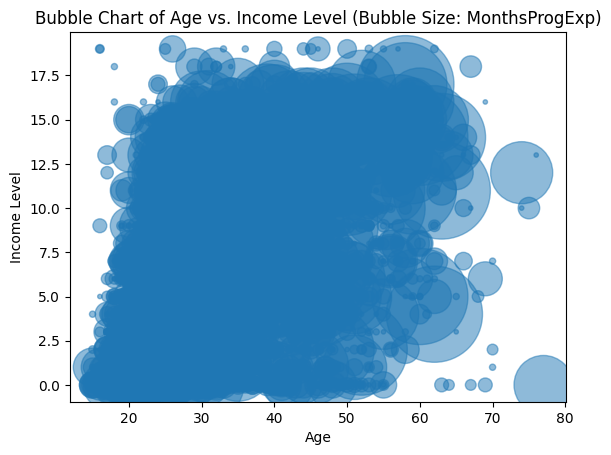

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has 'WeeklyHoursSpent', 'MonthsProgExp', and 'Age' columns.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['WeeklyHoursSpent'], df['MonthsProgExp'], df['Age'])
ax.set_xlabel('Weekly Hours Spent')
ax.set_ylabel('Months of Programming Experience')
ax.set_zlabel('Age')

plt.show()

import seaborn as sns

# Assuming 'df' is your DataFrame and it has 'Age', 'IncomeLevel', and 'MonthsProgExp' columns.
sns.pairplot(df[['Age', 'IncomeLevel', 'MonthsProgExp']])
plt.show()

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has 'Age', 'IncomeLevel', and 'MonthsProgExp' columns.
plt.scatter(df['Age'], df['IncomeLevel'], s=df['MonthsProgExp']*10, alpha=0.5)  # Scale factor for bubble sizes
plt.xlabel('Age')
plt.ylabel('Income Level')
plt.title('Bubble Chart of Age vs. Income Level (Bubble Size: MonthsProgExp)')
plt.show()


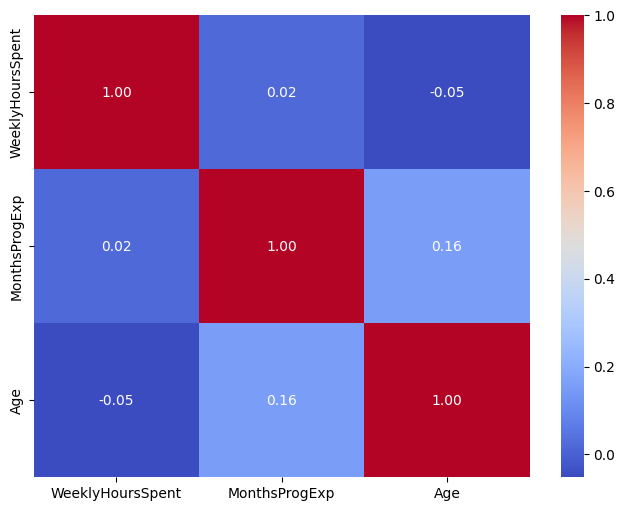

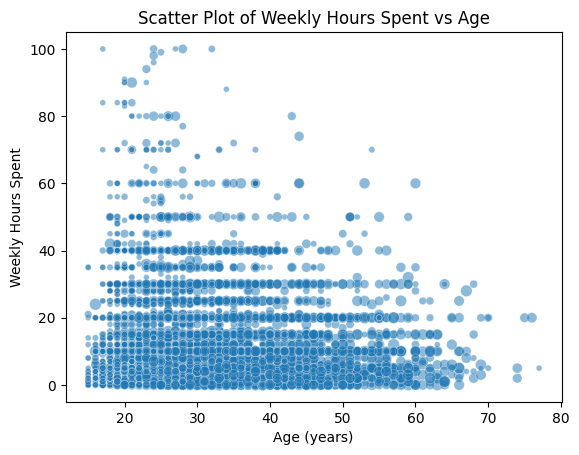

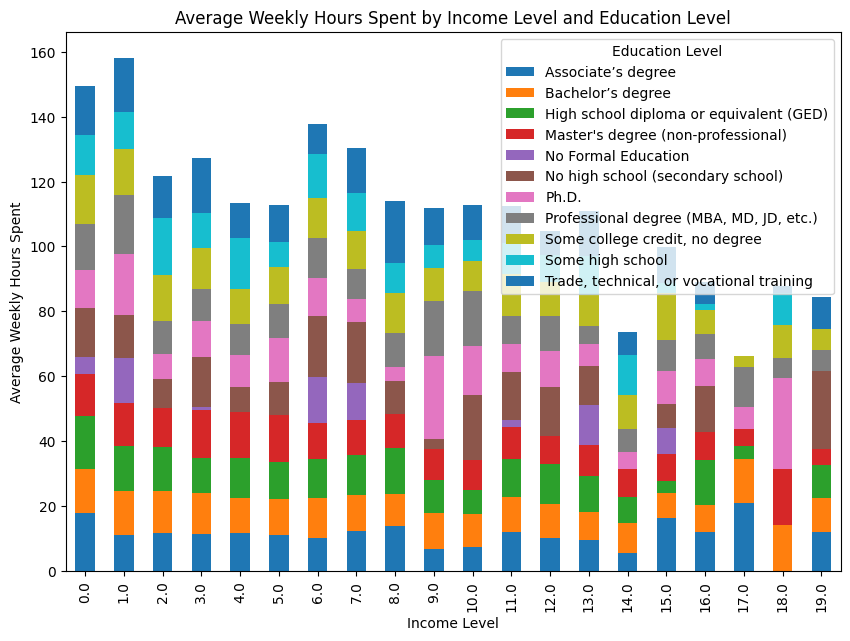

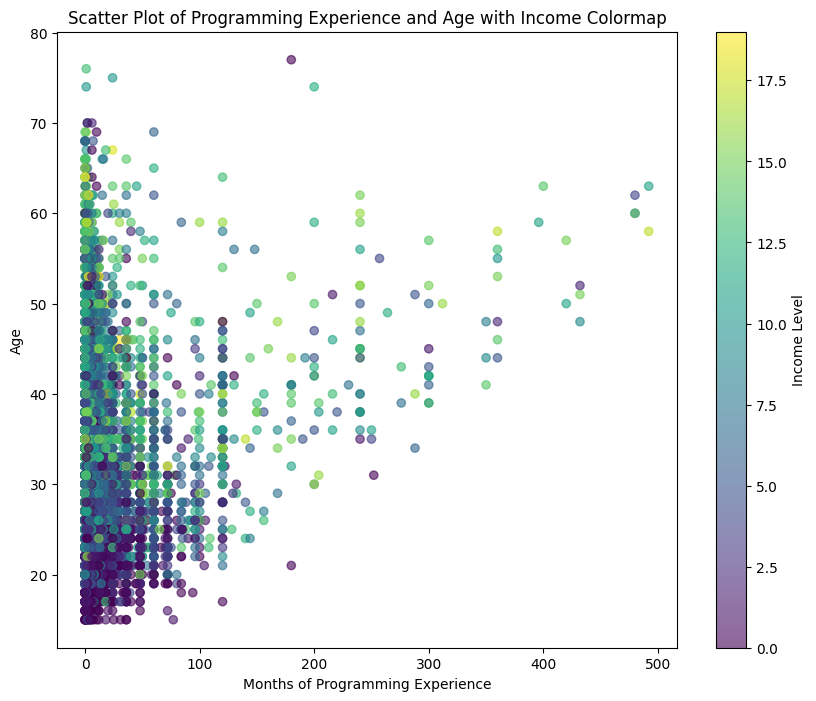

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains 'WeeklyHoursSpent', 'MonthsProgExp', and 'Age' as columns.
corr = df[['WeeklyHoursSpent', 'MonthsProgExp', 'Age']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

# Show the plot
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'WeeklyHoursSpent', 'IncomeLevel' are column names in your DataFrame.
# If 'IncomeLevel' is encoded numerically and you want to map it to size, ensure you have a 'size_dict' defined that maps each 'IncomeLevel' to a desired size.

size_dict = {i: 20 + 5*i for i in range(20)}

df['size'] = df['IncomeLevel'].map(size_dict)

# Now create the scatter plot with sizes mapped according to 'IncomeLevel'
sns.scatterplot(data=df, x='Age', y='WeeklyHoursSpent', size='size', legend=False, alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('Weekly Hours Spent')
plt.title('Scatter Plot of Weekly Hours Spent vs Age')
plt.show()



import pandas as pd
import matplotlib.pyplot as plt

# Creating a summarized DataFrame for plotting
# Assuming 'df' is your DataFrame and contains 'IncomeLevel', 'EduLevel' as categorical and 'WeeklyHoursSpent' as numerical attributes.
summary_df = df.groupby(['IncomeLevel', 'EduLevel'])['WeeklyHoursSpent'].mean().unstack()

summary_df.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.xlabel('Income Level')
plt.ylabel('Average Weekly Hours Spent')
plt.title('Average Weekly Hours Spent by Income Level and Education Level')
plt.legend(title='Education Level')
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it contains 'MonthsProgExp', 'Age', 'IncomeLevel' as columns.
# Ensure 'IncomeLevel' is encoded numerically if it's not already.

# Let's create a scatter plot with MonthsProgExp and Age, using IncomeLevel as the color.

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    df['MonthsProgExp'], 
    df['Age'], 
    c=df['IncomeLevel'], # This should be a numeric column
    cmap='viridis', # This is a visually distinct colormap
    alpha=0.6
)
plt.colorbar(scatter, label='Income Level')
plt.xlabel('Months of Programming Experience')
plt.ylabel('Age')
plt.title('Scatter Plot of Programming Experience and Age with Income Colormap')
plt.show()



# **CLUSTER ANALYSIS**

**ENCODE CATEROGRICAL CATEGORIES**

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# Assuming 'df' is your DataFrame and it contains the categorical columns
# 'EduLevel', 'EmploymentStatus', 'InterestInDevCareer', 'Region'
# For label encoding:
label_encoder = LabelEncoder()
df['EduLevel_encoded'] = label_encoder.fit_transform(df['EduLevel'])
df['EmploymentStatus_encoded'] = label_encoder.fit_transform(df['EmploymentStatus'])
df['InterestInDevCareer_encoded'] = label_encoder.fit_transform(df['InterestInDevCareer'])
df['Region_encoded'] = label_encoder.fit_transform(df['Region'])

income_level_order = [[
                       'Under $1,000',
                       '$1,000 to $2,999',
                       '$3,000 to $4,999',
                       '$5,000 to $6,999', 
                       '$7,000 to $9,999',
                       '$10,000 to $14,999',
                       '$15,000 to $19,999',
                       '$20,000 to $24,999',
                       '$25,000 to $29,999',
                       '$30,000 to $34,999', 
                       '$35,000 to $39,999',
                       '$40,000 to $49,999',
                       '$50,000 to $59,999',
                       '$60,000 to $74,999',
                       '$75,000 to $89,999',
                       '$90,000 to $119,999',
                       '$120,000 to $159,999',
                       '$160,000 to $199,999', 
                       '$200,000 to $249,999',
                       '$250,000 or over',]] 
encoder = OrdinalEncoder(categories = income_level_order)  
df['IncomeLevel'] = encoder.fit_transform(df[['AnnualIncomeUSD']])
df['HighIncome'] = df['IncomeLevel'].apply(lambda x:0 if x < 9 else 1)

df

WeeklyHoursSpent  MonthsProgExp  \
1                    10              6   
4                     2             24   
5                    10             50   
6                     5             36   
7                    20             30   
...                 ...            ...   
18119                30             15   
18120                10              1   
18123                10             13   
18124                 6             36   
18125                 5            200   

                                      EduLevel EmploymentStatus  \
1                            Bachelor’s degree               No   
4                            Bachelor’s degree              Yes   
5                            Bachelor’s degree              Yes   
6               Some college credit, no degree              Yes   
7                            Bachelor’s degree              Yes   
...                                        ...              ...   
18119           Some college credit, no degree               No   
18120                        Bachelor’s degree               No   
18123                       Associate’s degree               No   
18124  Professional degree (MBA, MD, JD, etc.)              Yes   
18125       Master's degree (non-professional)               No   

          AnnualIncomeUSD  Age       InterestInDevCareer  \
1            Under $1,000   38  I am already a developer   
4      $40,000 to $49,999   35  I am already a developer   
5      $75,000 to $89,999   27  I am already a developer   
6      $60,000 to $74,999   24  I am already a developer   
7        $1,000 to $2,999   23  I am already a developer   
...                   ...  ...                       ...   
18119        Under $1,000   32                       Yes   
18120  $10,000 to $14,999   37                       Yes   
18123  $20,000 to $24,999   23                       Yes   
18124  $30,000 to $34,999   34  I am already a developer   
18125  $10,000 to $14,999   44                        No   

                            Region  EduLevel_encoded  \
1      Latin America and Caribbean                 1   
4            East Asia and Pacific                 1   
5                    North America                 1   
6                    North America                 8   
7          Europe and Central Asia                 1   
...                            ...               ...   
18119      Europe and Central Asia                 8   
18120      Europe and Central Asia                 1   
18123                North America                 0   
18124      Europe and Central Asia                 7   
18125      Europe and Central Asia                 3   

       EmploymentStatus_encoded  InterestInDevCareer_encoded  Region_encoded  \
1                             0                            0               2   
4                             1                            0               0   
5                             1                            0               4   
6                             1                            0               4   
7                             1                            0               1   
...                         ...                          ...             ...   
18119                         0                            2               1   
18120                         0                            2               1   
18123                         0                            2               4   
18124                         1                            0               1   
18125                         0                            1               1   

       IncomeLevel  HighIncome  
1              0.0           0  
4             11.0           1  
5             14.0           1  
6             13.0           1  
7              1.0           0  
...            ...         ...  
18119          0.0           0  
18120          5.0           0  
18123          7.0           0  
18124       

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

label_encoder = LabelEncoder()
df['EduLevel_encoded'] = label_encoder.fit_transform(df['EduLevel'])
# Let's say your LabelEncoder object is named 'label_encoder'
# and you have used it to fit and transform 'EduLevel'

# This will give you the original classes (categories in your case)
categories = label_encoder.classes_

# Now you can create a dictionary that maps the encoded numbers to the original categories
edu_level_mapping = {index: label for index, label in enumerate(categories)}
print(edu_level_mapping)

{0: 'Associate’s degree', 1: 'Bachelor’s degree', 2: 'High school diploma or equivalent (GED)', 3: "Master's degree (non-professional)", 4: 'No Formal Education', 5: 'No high school (secondary school)', 6: 'Ph.D.', 7: 'Professional degree (MBA, MD, JD, etc.)', 8: 'Some college credit, no degree', 9: 'Some high school', 10: 'Trade, technical, or vocational training'}


# **CREATING A NUMERICAL DATAFRAME FOR CLUSTER ANALYSIS**

In [7]:
# Assuming 'df' is your original DataFrame

# List of columns to keep
columns_to_keep = ['WeeklyHoursSpent', 'MonthsProgExp', 'Age', 'EmploymentStatus_encoded', 'InterestInDevCareer_encoded', 'Region_encoded', 'IncomeLevel', 'EduLevel_encoded', 'HighIncome']

# Create a new DataFrame with only the columns of interest
df_numerical = df[columns_to_keep].copy()

df_numerical

WeeklyHoursSpent  MonthsProgExp  Age  EmploymentStatus_encoded  \
1                    10              6   38                         0   
4                     2             24   35                         1   
5                    10             50   27                         1   
6                     5             36   24                         1   
7                    20             30   23                         1   
...                 ...            ...  ...                       ...   
18119                30             15   32                         0   
18120                10              1   37                         0   
18123                10             13   23                         0   
18124                 6             36   34                         1   
18125                 5            200   44                         0   

       InterestInDevCareer_encoded  Region_encoded  IncomeLevel  \
1                                0               2          0.0   
4                                0               0         11.0   
5                                0               4         14.0   
6                                0               4         13.0   
7                                0               1          1.0   
...                            ...             ...          ...   
18119                            2               1          0.0   
18120                            2               1          5.0   
18123                            2               4          7.0   
18124                            0               1          9.0   
18125                            1               1          5.0   

       EduLevel_encoded  HighIncome  
1                     1           0  
4                     1           1  
5                     1           1  
6                     8           1  
7                     1           0  
...                 ...         ...  
18119                 8           0  
18120                 1           0  
18123                 0           0  
18124                 7           1  
18125                 3           0  

[8975 rows x 9 columns]

# **Standardization for high and low income separately and Using Elbow Graph to see the optimal amount of clusters needed**

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Separate the data into high and low income groups
high_income_df = df[df['HighIncome'] == 1]
low_income_df = df[df['HighIncome'] == 0]

# Initialize the StandardScaler
scaler_high = StandardScaler()
scaler_low = StandardScaler()

# List of numerical and Encoded Categorical features to standardize
numerical_features = ['WeeklyHoursSpent', 'MonthsProgExp', 'Age', 'EmploymentStatus_encoded','InterestInDevCareer_encoded', 'Region_encoded', 'IncomeLevel', 'EduLevel_encoded']

# Standardize the data for high income group
high_income_df_scaled = scaler_high.fit_transform(high_income_df[numerical_features])
high_income_df_scaled = pd.DataFrame(high_income_df_scaled, columns=numerical_features)

# Standardize the data for low income group
low_income_df_scaled = scaler_low.fit_transform(low_income_df[numerical_features])
low_income_df_scaled = pd.DataFrame(low_income_df_scaled, columns=numerical_features)


In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming 'df' is your main DataFrame and you've already encoded the categorical attributes
# and created the 'HighIncome' binary column as you showed in the code provided

# Features to consider in clustering
features_to_cluster = ['WeeklyHoursSpent', 'MonthsProgExp', 'Age', 
                       'EmploymentStatus_encoded', 'InterestInDevCareer_encoded', 
                       'Region_encoded', 'IncomeLevel', 'EduLevel_encoded']

# Filtering out the high and low income groups
high_income_df = df[df['HighIncome'] == 1][features_to_cluster]
low_income_df = df[df['HighIncome'] == 0][features_to_cluster]

# Standardization
scaler_high = StandardScaler()
high_income_scaled = scaler_high.fit_transform(high_income_df)

scaler_low = StandardScaler()
low_income_scaled = scaler_low.fit_transform(low_income_df)

# Applying KMeans Clustering
# Determining the number of clusters from your elbow method results, let's assume it's 3 for both groups

# High income group
kmeans_high = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_high.fit(high_income_scaled)
high_income_df['Cluster'] = kmeans_high.labels_

# Low income group
kmeans_low = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_low.fit(low_income_scaled)
low_income_df['Cluster'] = kmeans_low.labels_

# Now you have two DataFrames: `high_income_df` and `low_income_df` with an additional 'Cluster' column
# You can save these dataframes to CSVs or continue with analysis/visualization as needed.


**ELBOW GRAPH**

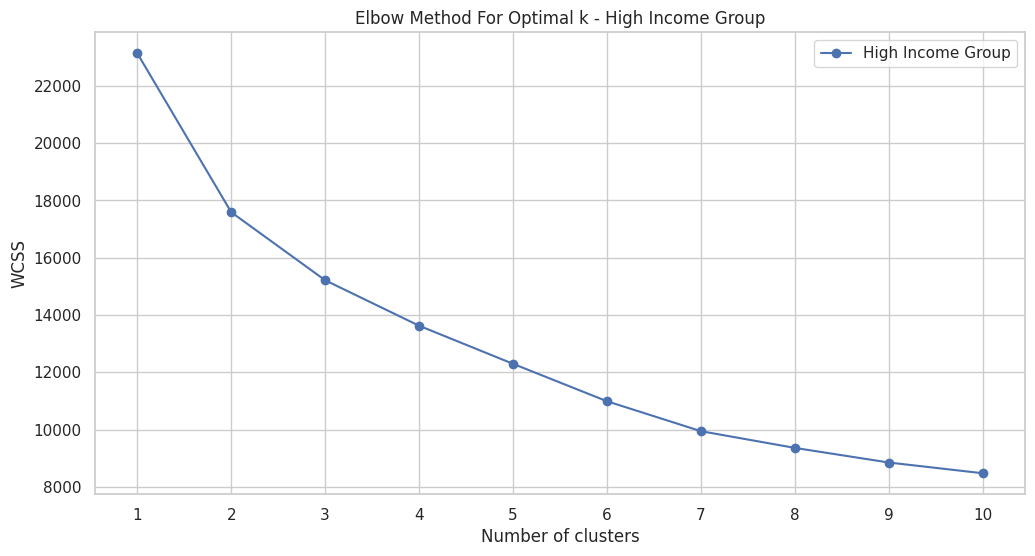

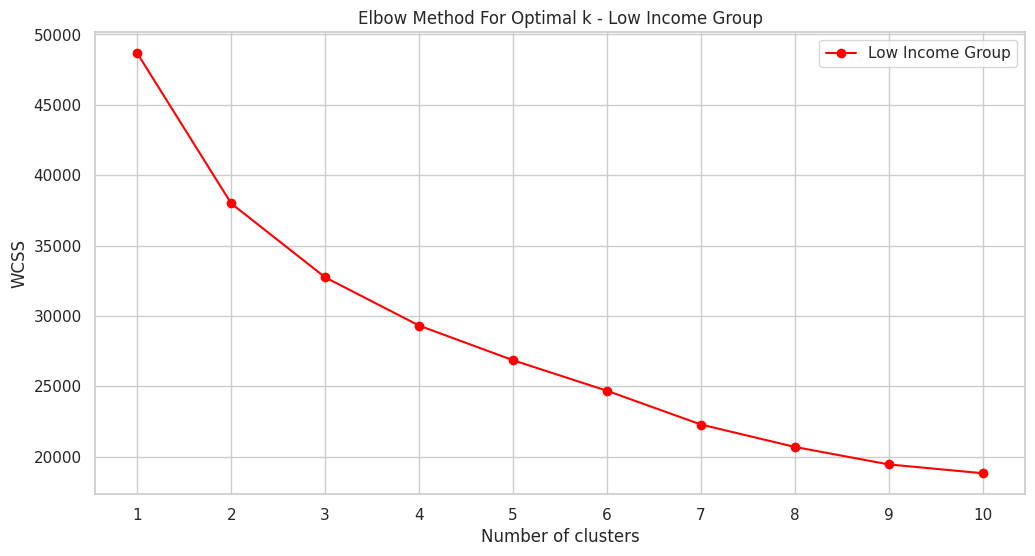

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize the range of cluster numbers we want to test
range_of_clusters = range(1, 11)

# Function to calculate WCSS for a given dataset
def calculate_wcss(data):
    wcss = []
    for n in range_of_clusters:
        kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Calculate WCSS for high income group
wcss_high_income = calculate_wcss(high_income_df_scaled[numerical_features])

# Calculate WCSS for low income group
wcss_low_income = calculate_wcss(low_income_df_scaled[numerical_features])

# Plot the elbow graph for high income group
plt.figure(figsize=(12, 6))
plt.plot(range_of_clusters, wcss_high_income, marker='o', linestyle='-', label='High Income Group')
plt.title('Elbow Method For Optimal k - High Income Group')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range_of_clusters)
plt.legend()
plt.show()

# Plot the elbow graph for low income group
plt.figure(figsize=(12, 6))
plt.plot(range_of_clusters, wcss_low_income, marker='o', linestyle='-', color='red', label='Low Income Group')
plt.title('Elbow Method For Optimal k - Low Income Group')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range_of_clusters)
plt.legend()
plt.show()


# **SCATTER PLOT FOR HIGH INCOME CLUSTER ANALYSIS**

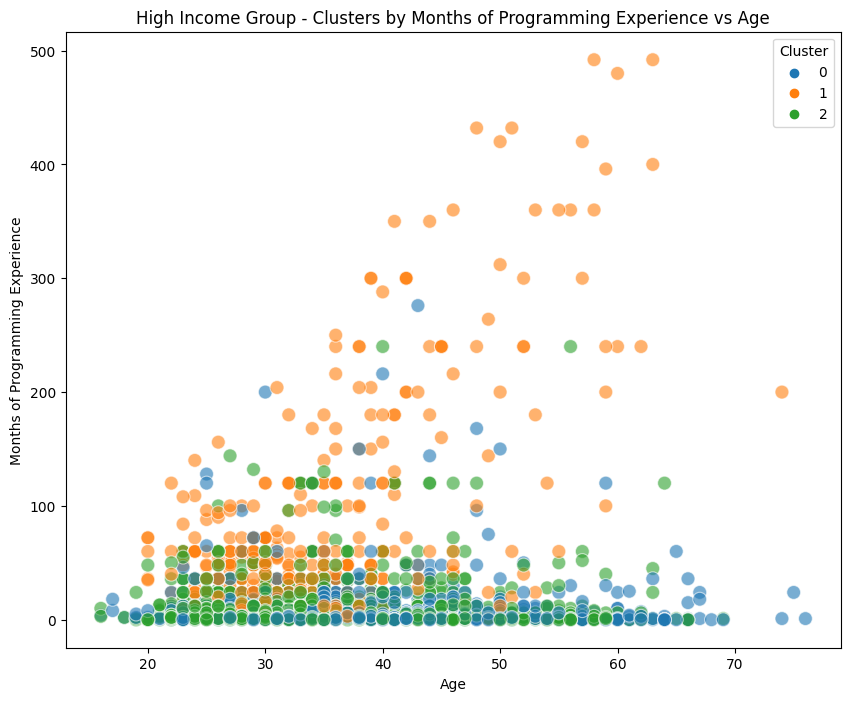

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'high_income_df' is the DataFrame for the high-income group after clustering
# and contains 'WeeklyHoursSpent', 'Age', and 'Cluster' columns

# Scatter plot for high income group
plt.figure(figsize=(10, 8))
sns.scatterplot(data=high_income_df, x='Age', y='MonthsProgExp', hue='Cluster', palette='tab10', s=100, alpha=0.6)

plt.title('High Income Group - Clusters by Months of Programming Experience vs Age')
plt.xlabel('Age')
plt.ylabel('Months of Programming Experience')
plt.legend(title='Cluster')
plt.show()

# **EXPERIMENTING WITH CLUSTERS**

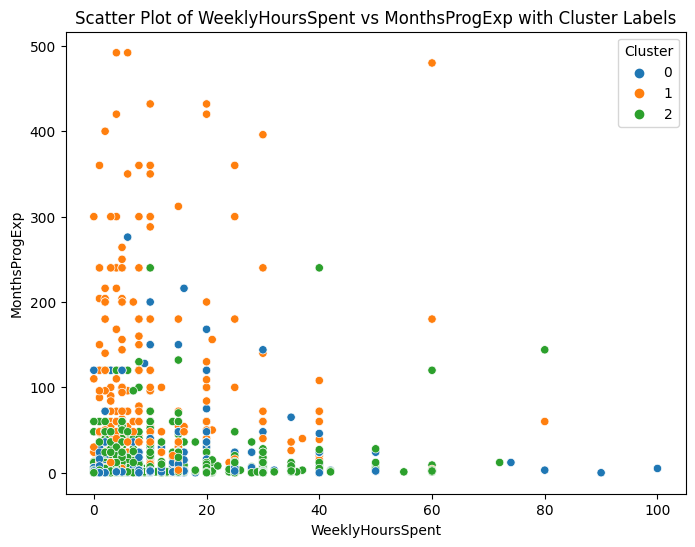

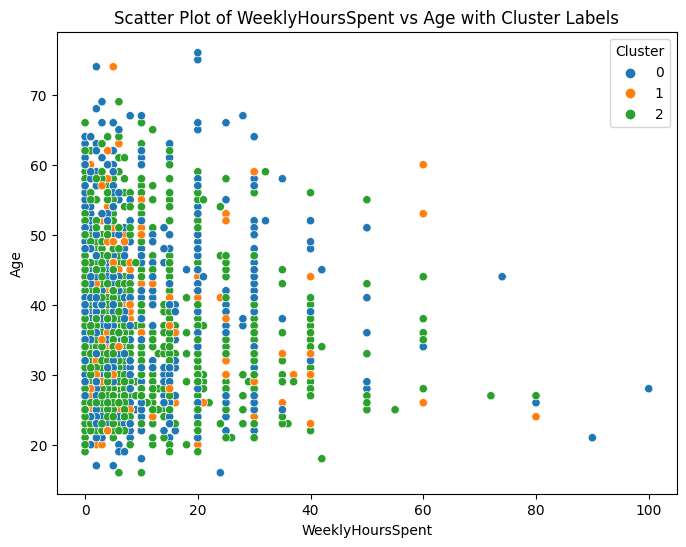

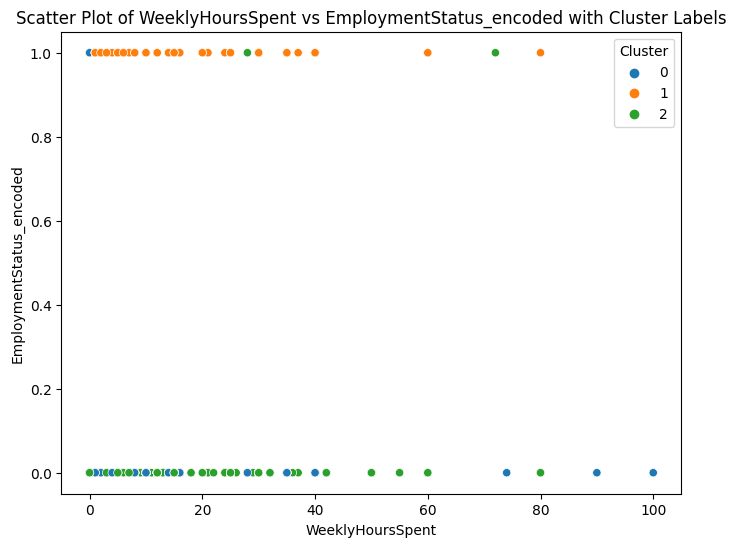

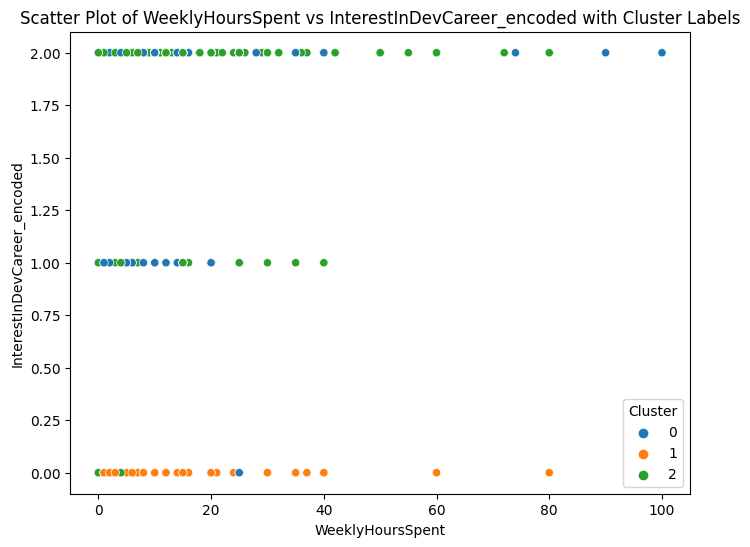

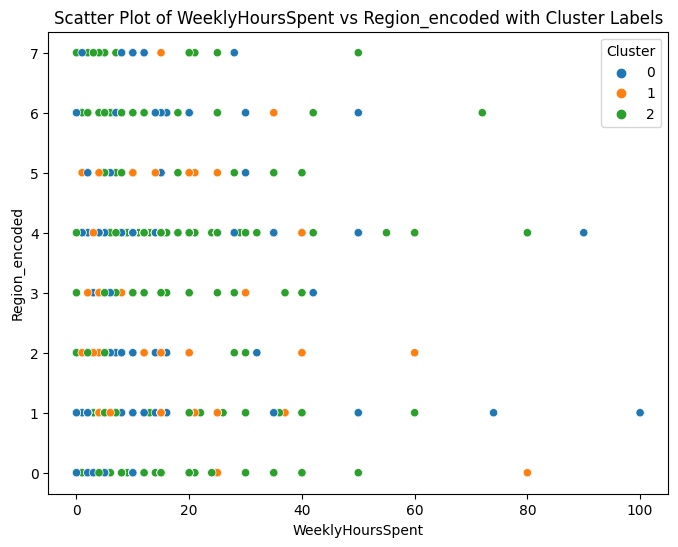

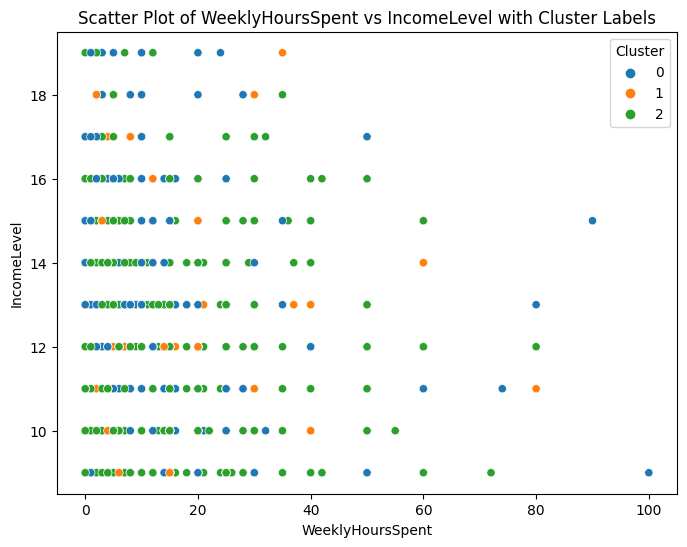

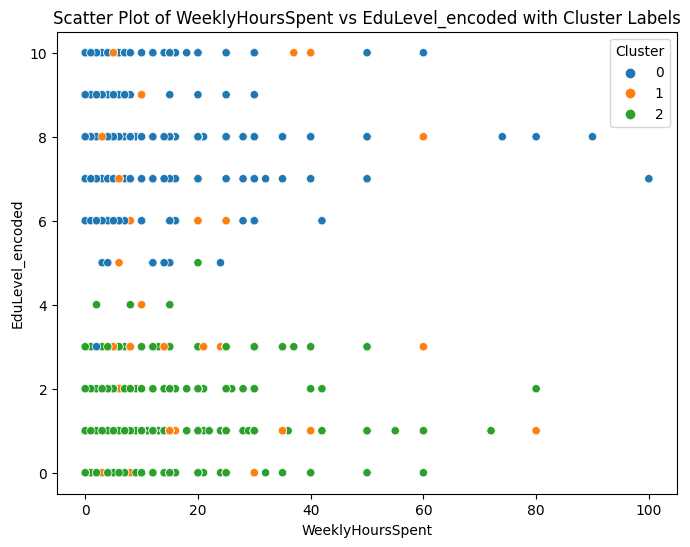

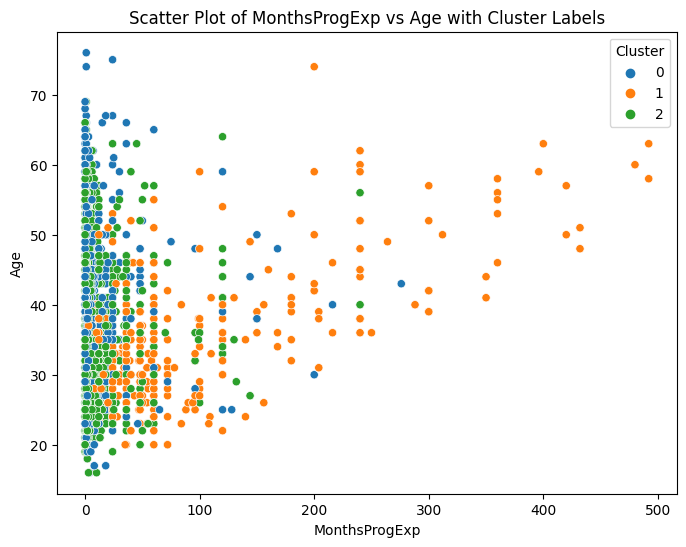

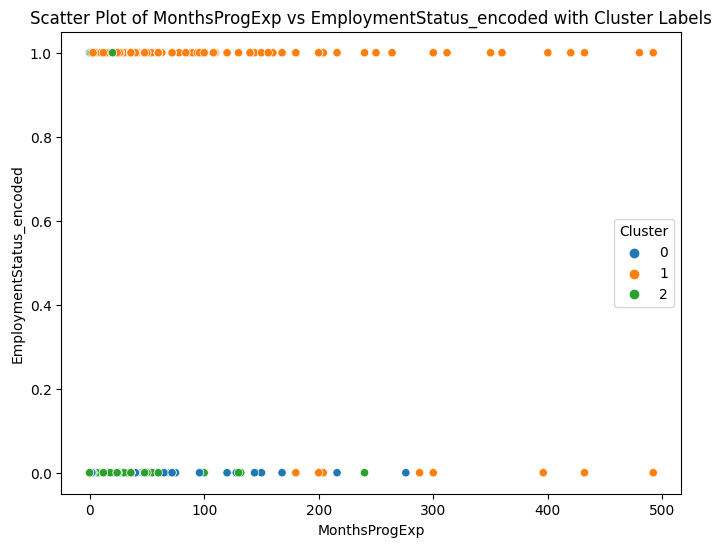

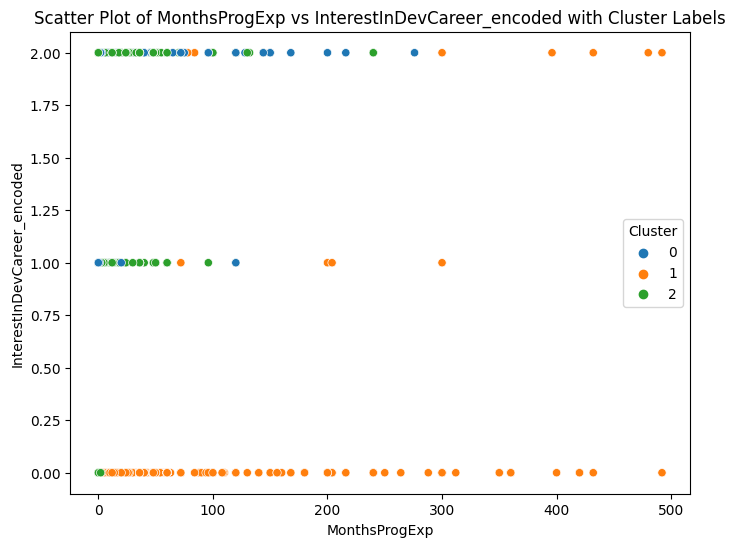

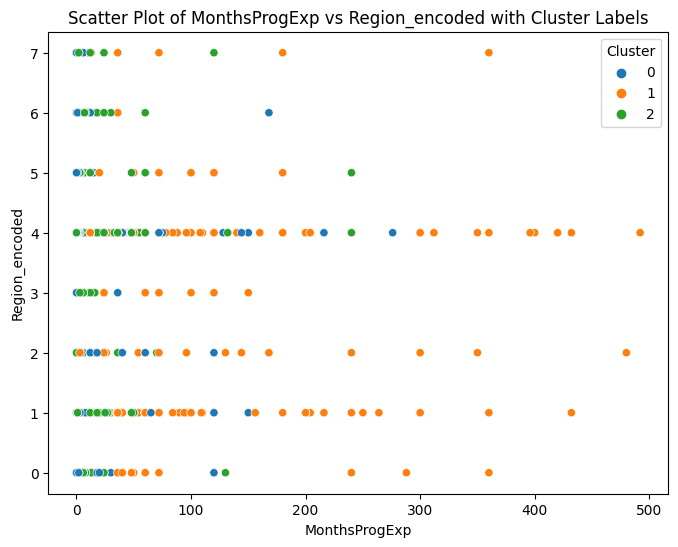

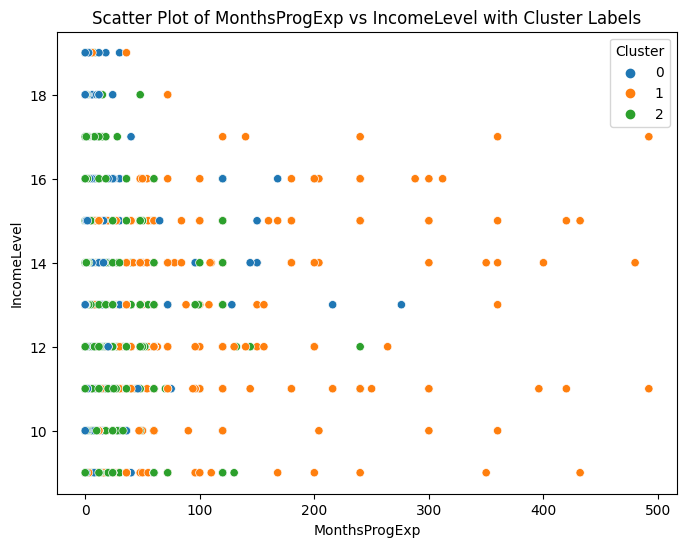

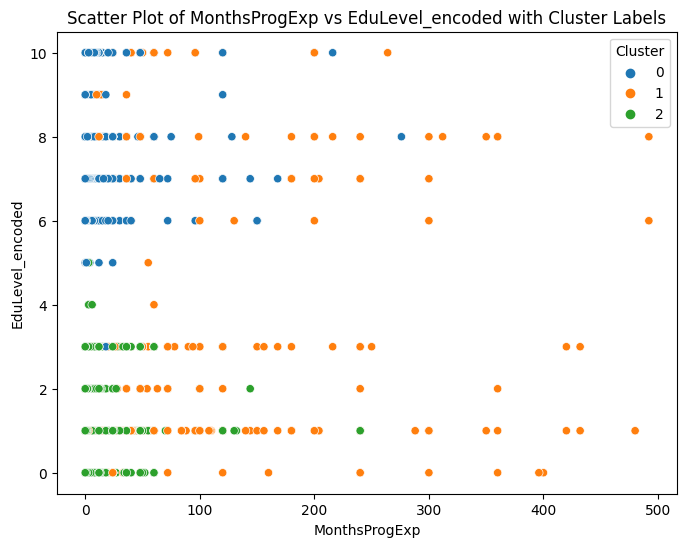

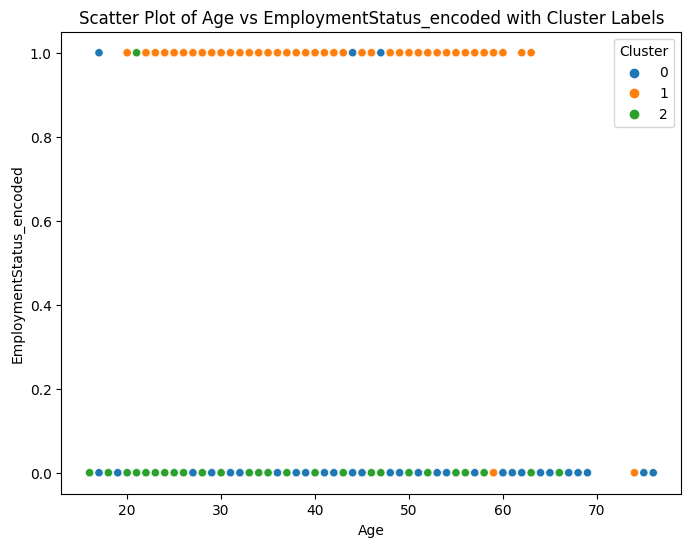

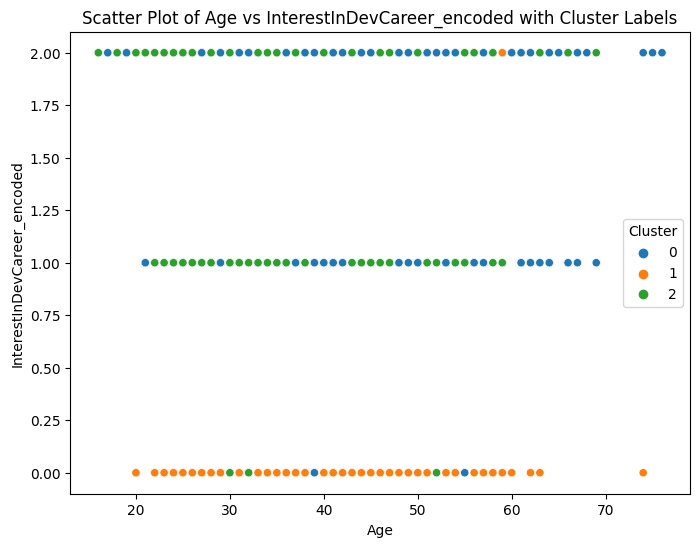

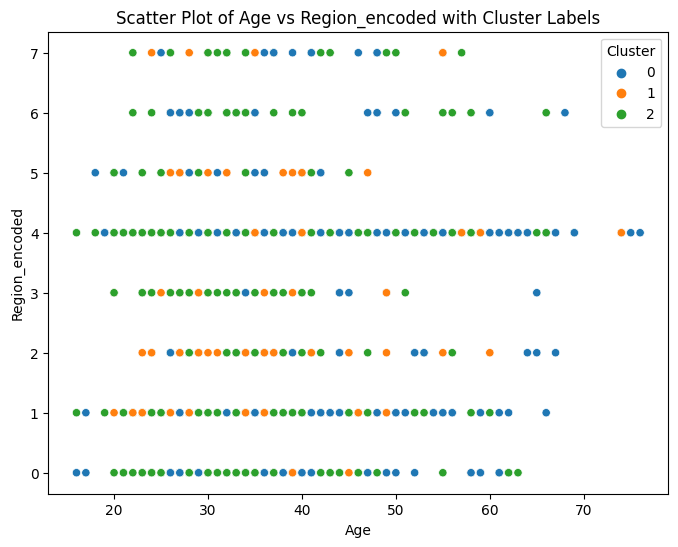

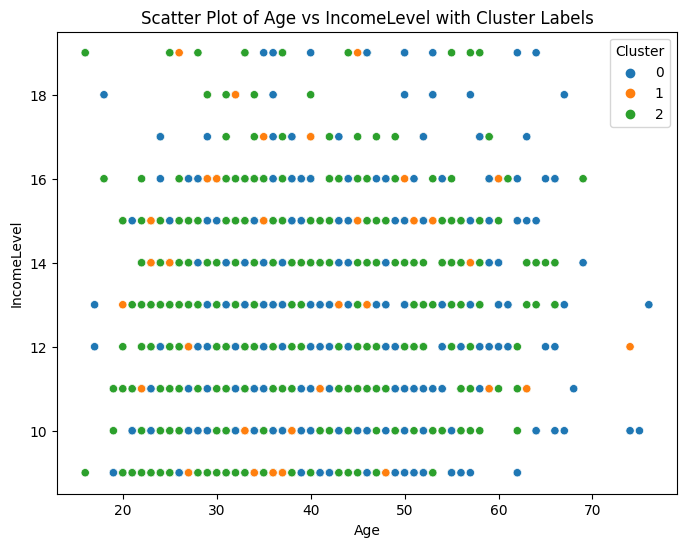

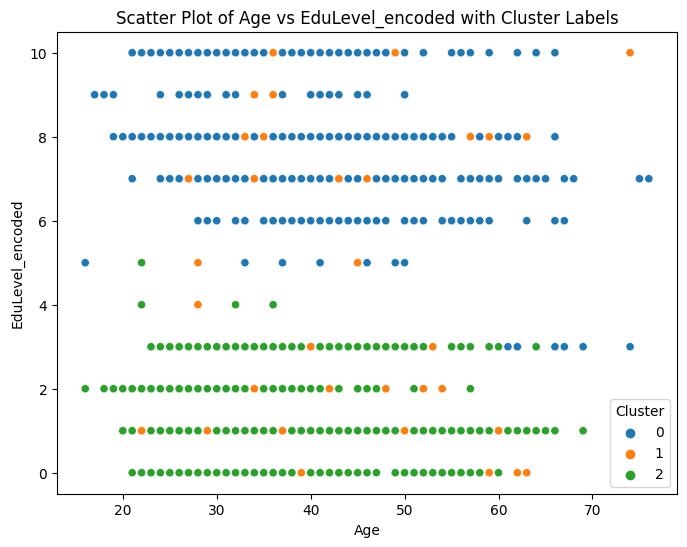

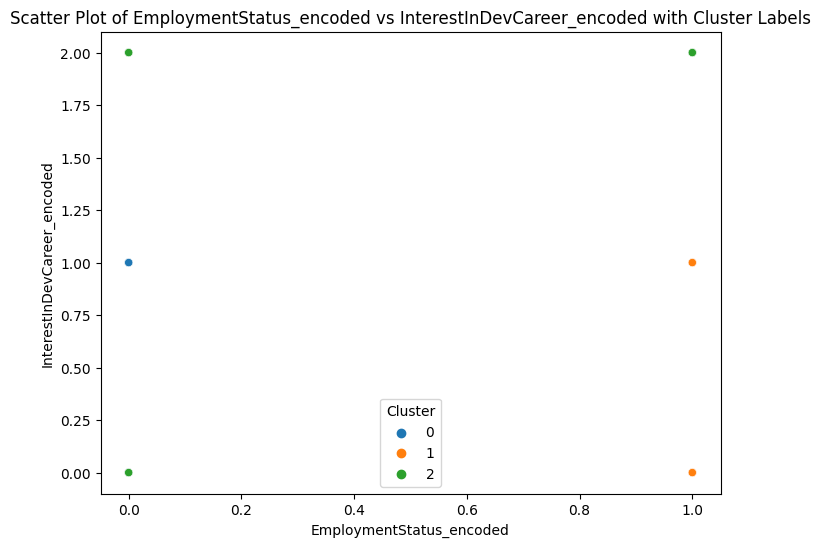

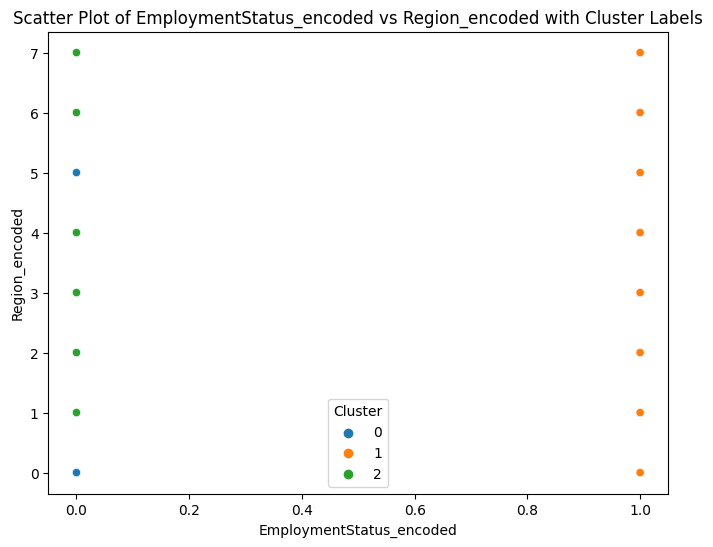

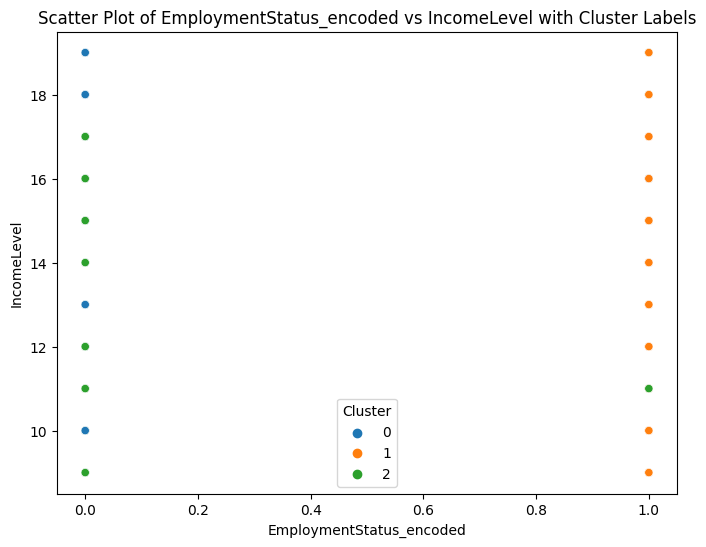

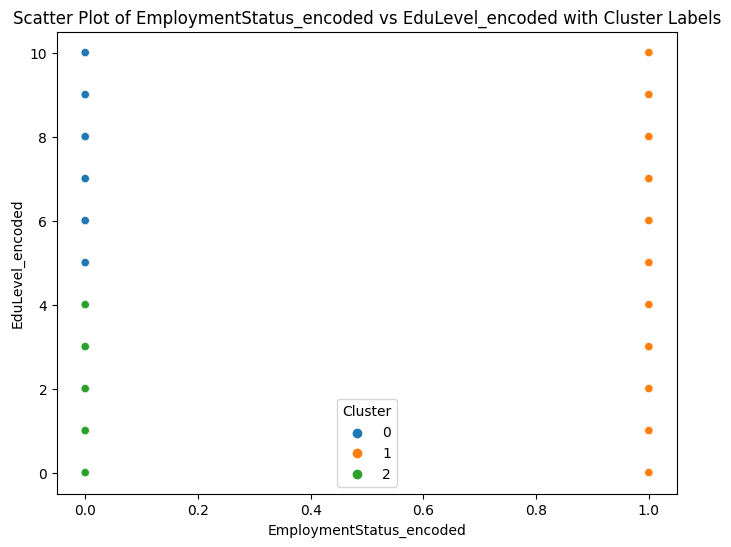

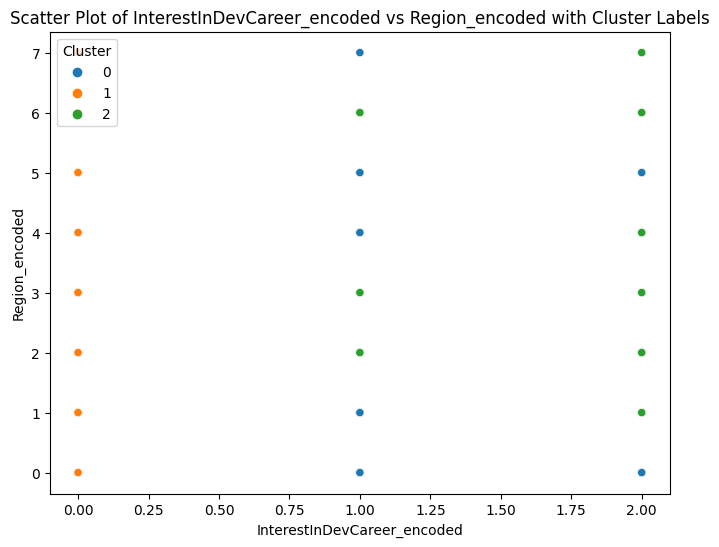

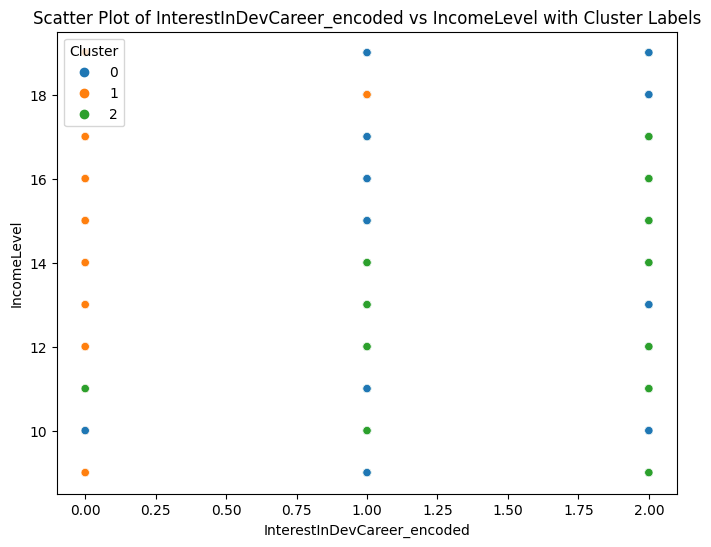

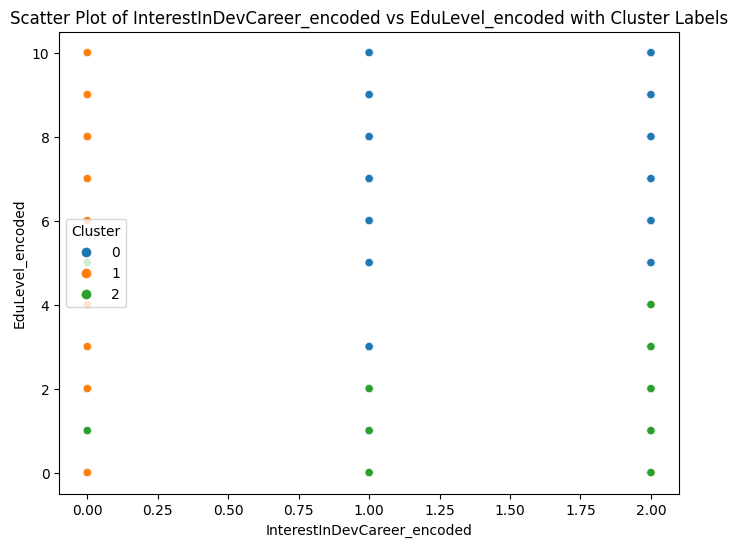

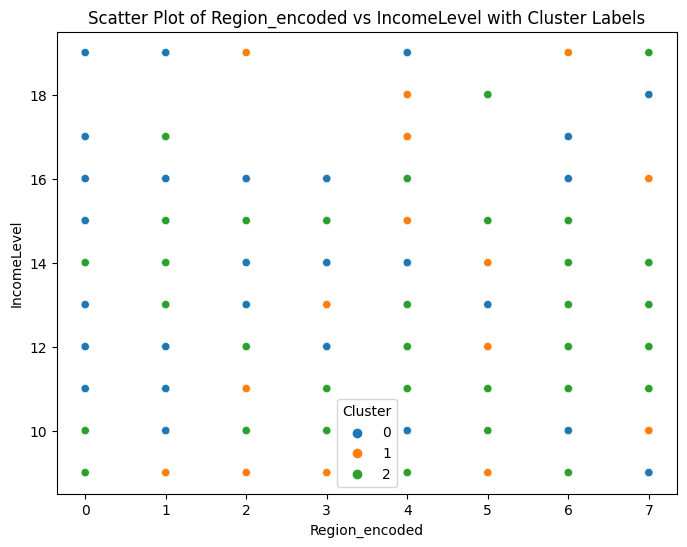

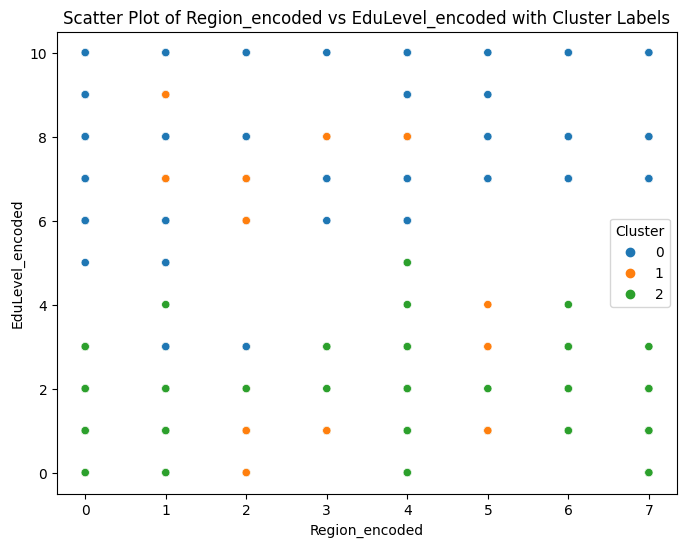

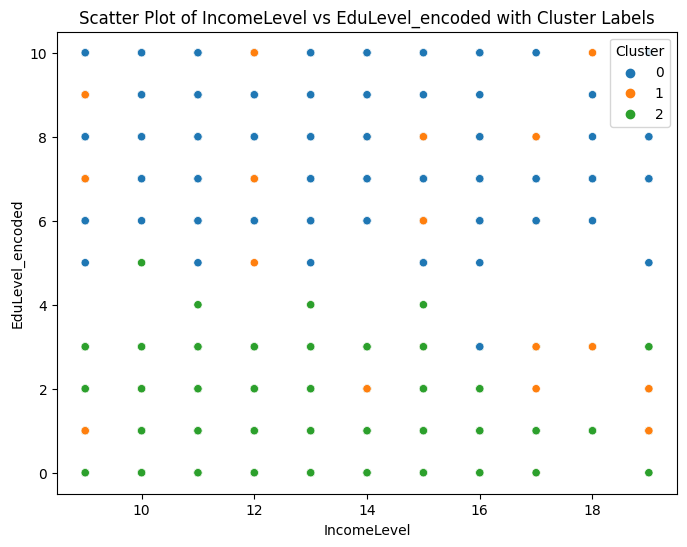

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'high_income_df' is your DataFrame and contains cluster labels in 'Cluster' column
# Let's select a few numerical attributes for visualization
attributes = ['WeeklyHoursSpent', 'MonthsProgExp', 'Age', 
                       'EmploymentStatus_encoded', 'InterestInDevCareer_encoded', 
                       'Region_encoded', 'IncomeLevel', 'EduLevel_encoded']
# Generate scatter plots for all combinations of attributes
for i, attr1 in enumerate(attributes):
    for j, attr2 in enumerate(attributes):
        if i < j:  # This ensures that we don't repeat attributes and don't compare an attribute with itself
            plt.figure(figsize=(8, 6))
            sns.scatterplot(data=high_income_df, x=attr1, y=attr2, hue='Cluster', palette='tab10')
            plt.title(f'Scatter Plot of {attr1} vs {attr2} with Cluster Labels')
            plt.xlabel(attr1)
            plt.ylabel(attr2)
            plt.legend(title='Cluster')
            plt.show()

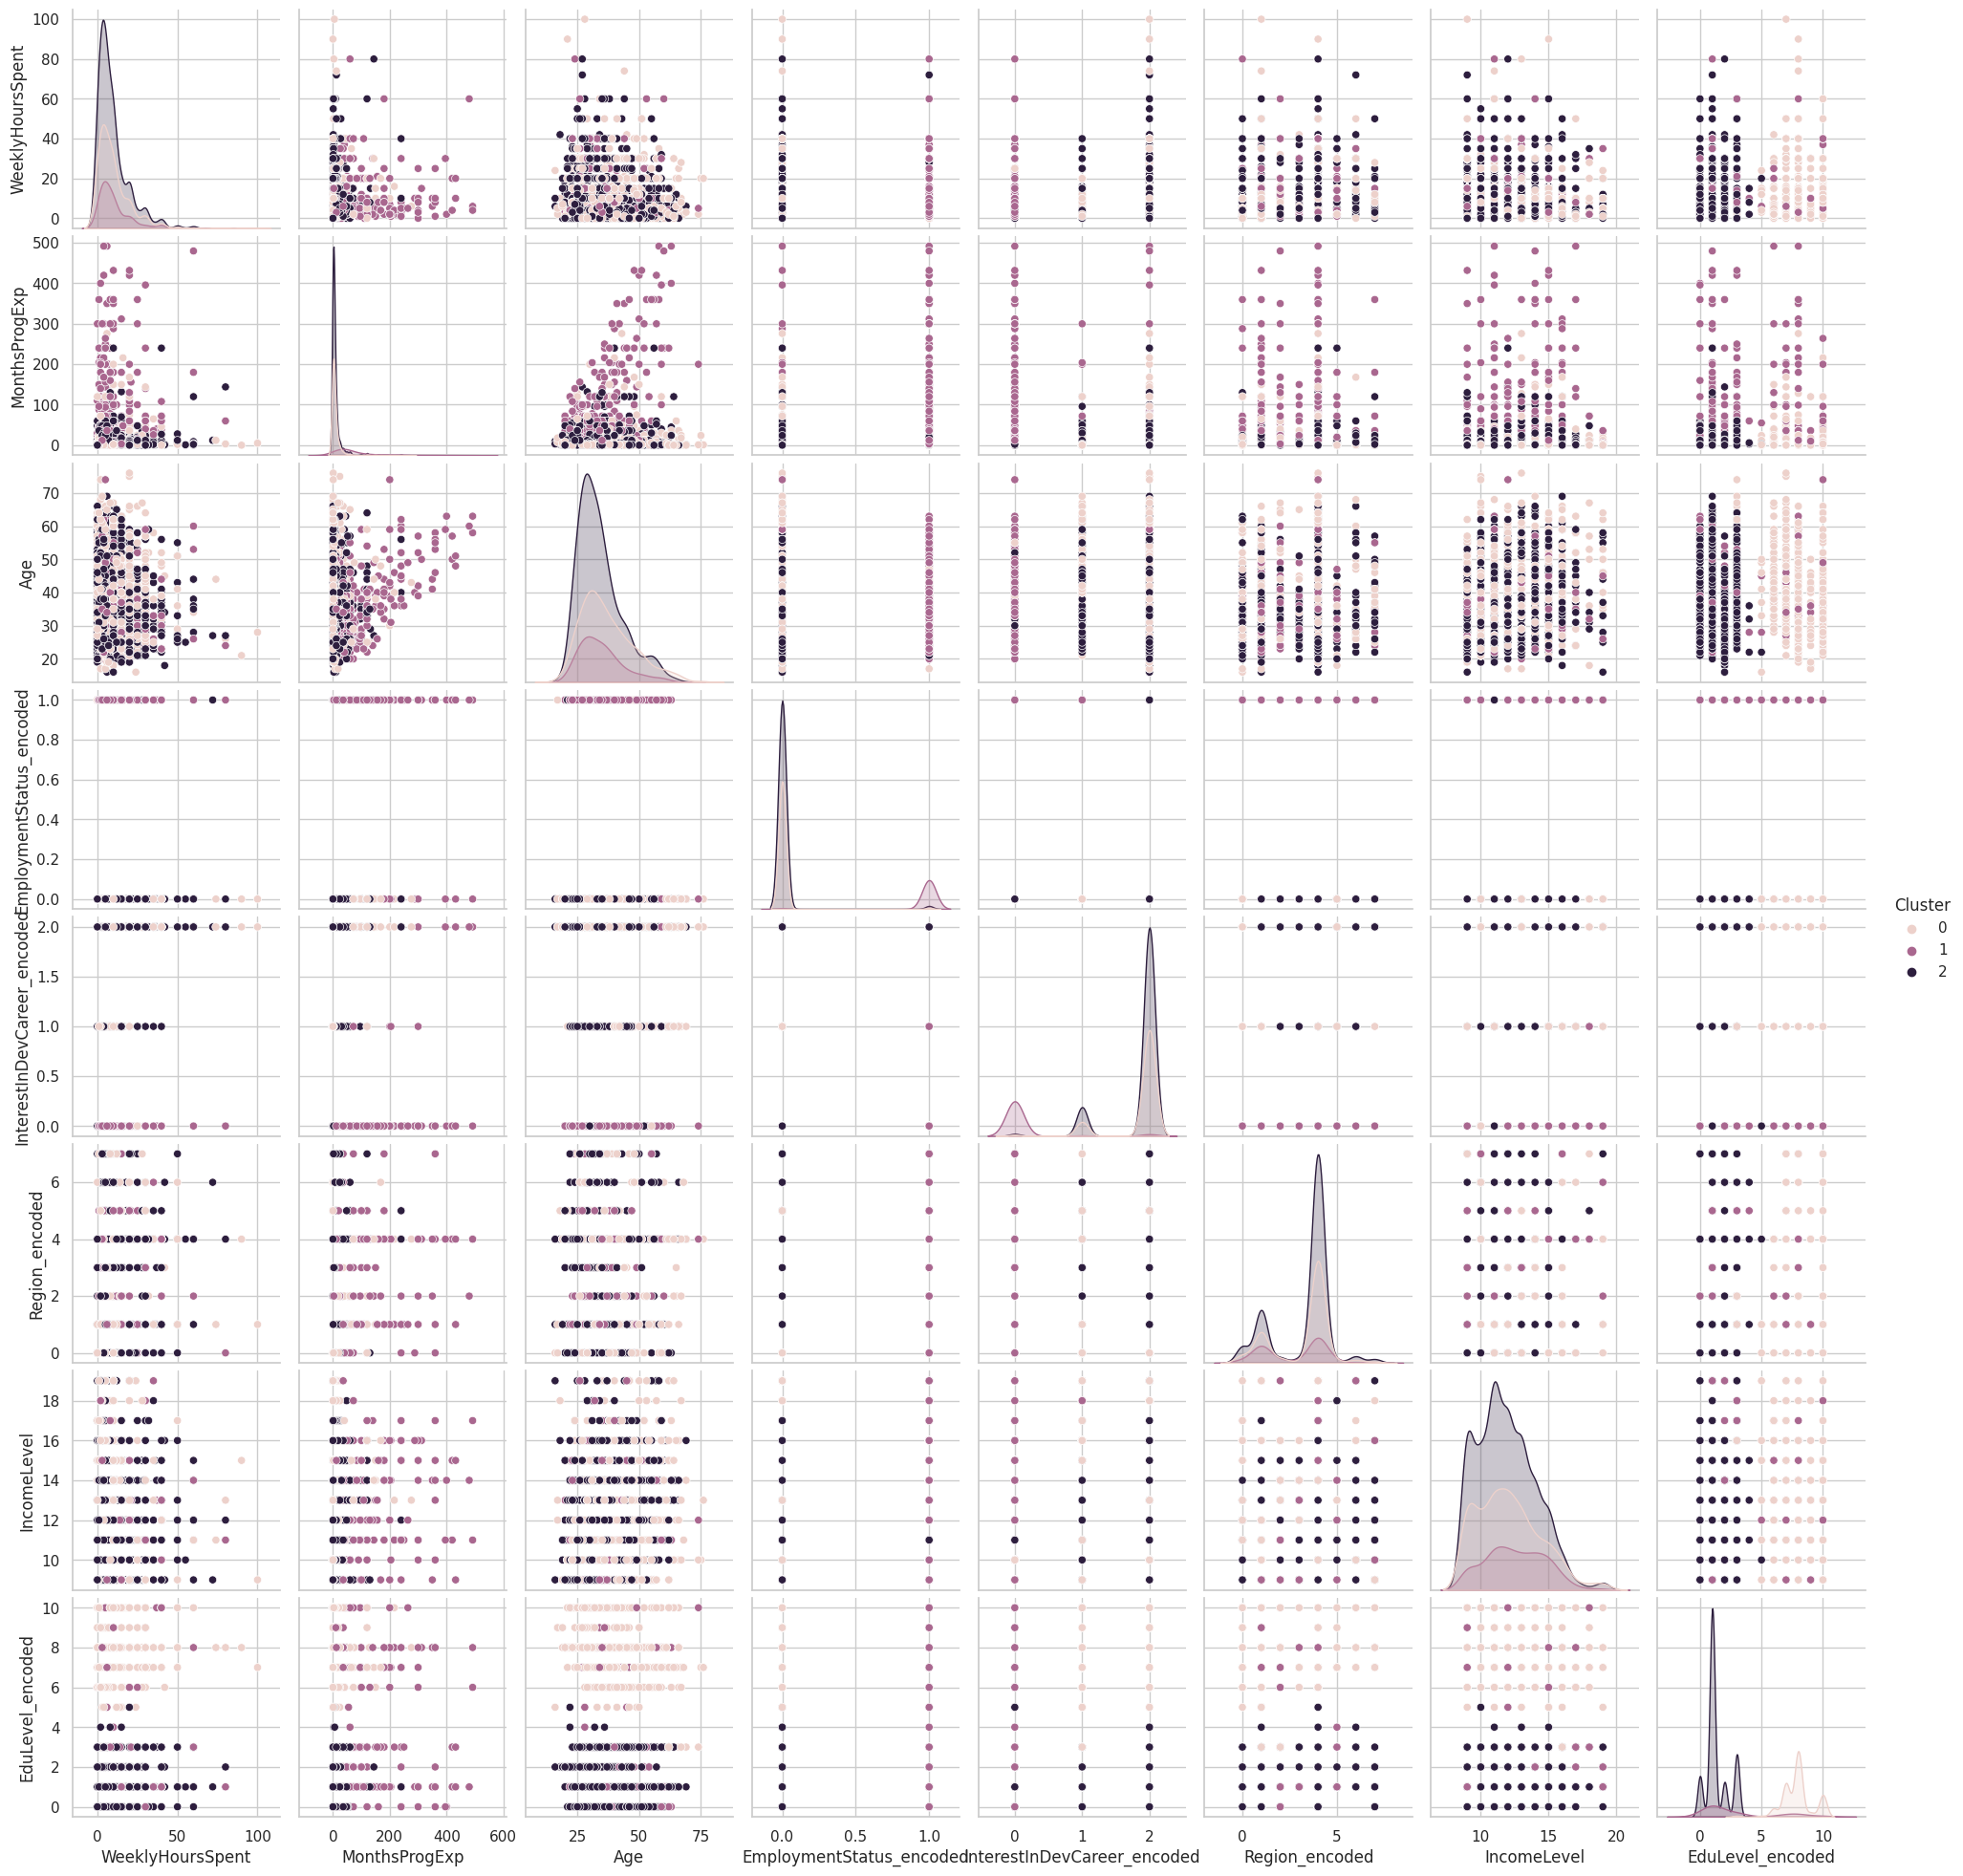

ValueError: could not convert string to float: 'Bachelor’s degree'

<Figure size 1000x800 with 0 Axes>

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'high_income_df' and 'low_income_df' are your dataframes with encoded attributes.

# Pairplot
sns.pairplot(high_income_df, hue='Cluster')
plt.show()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(high_income_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# Bar Chart for each cluster (showing the mean of 'WeeklyHoursSpent' as an example)
sns.barplot(x='Cluster', y='WeeklyHoursSpent', data=high_income_df, estimator=np.mean)
plt.show()

# Boxplot (showing distribution of 'WeeklyHoursSpent' across clusters as an example)
sns.boxplot(x='Cluster', y='WeeklyHoursSpent', data=high_income_df)
plt.show()

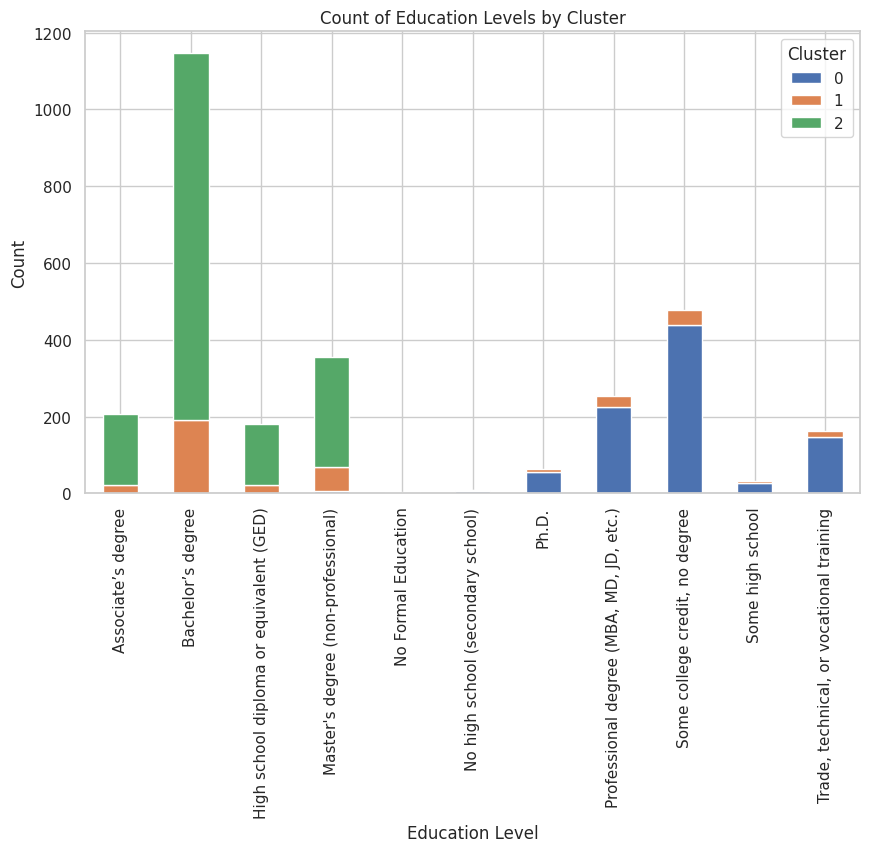

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it contains 'EduLevel_encoded' and 'Cluster' columns.
# 'EduLevel_encoded' should be the encoded education level, and 'Cluster' the cluster assignment.

# Create the mapping of encoded values to actual education levels
edu_level_mapping = {0: 'Associate’s degree',
                     1: 'Bachelor’s degree', 
                     2: 'High school diploma or equivalent (GED)', 
                     3: "Master's degree (non-professional)", 
                     4: 'No Formal Education', 
                     5: 'No high school (secondary school)', 
                     6: 'Ph.D.', 
                     7: 'Professional degree (MBA, MD, JD, etc.)', 
                     8: 'Some college credit, no degree', 
                     9: 'Some high school', 
                     10: 'Trade, technical, or vocational training'}
# Map the encoded education levels to their names
high_income_df['EduLevel'] = high_income_df['EduLevel_encoded'].map(edu_level_mapping)

# Group by 'Cluster' and 'EduLevel' and get the size of each group
cluster_education_counts = high_income_df.groupby(['Cluster', 'EduLevel']).size().reset_index(name='count')

# Pivot the results to get a better format for a bar plot
cluster_education_pivot = cluster_education_counts.pivot(index='EduLevel', columns='Cluster', values='count')

# Plot a bar graph
sns.set_theme(style="whitegrid")
cluster_education_pivot.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Count of Education Levels by Cluster')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()

# **Low INCOME CLUSTER ANALYSIS**

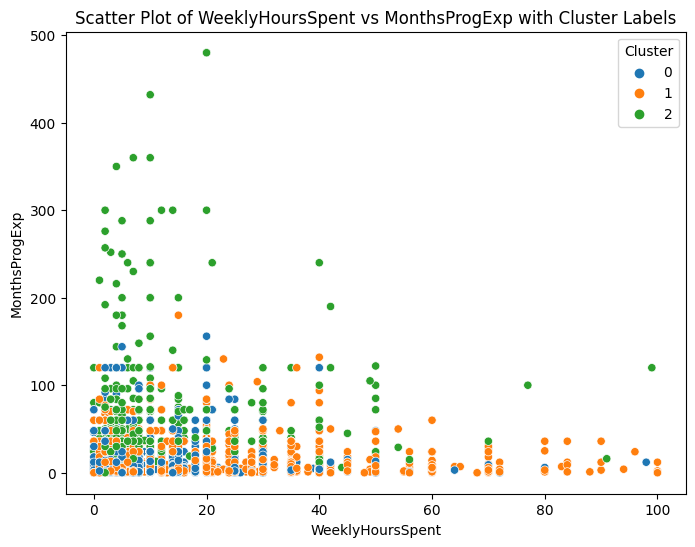

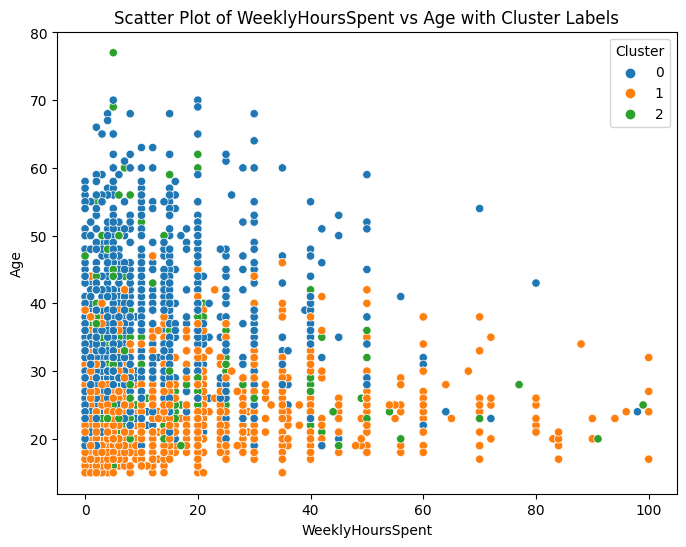

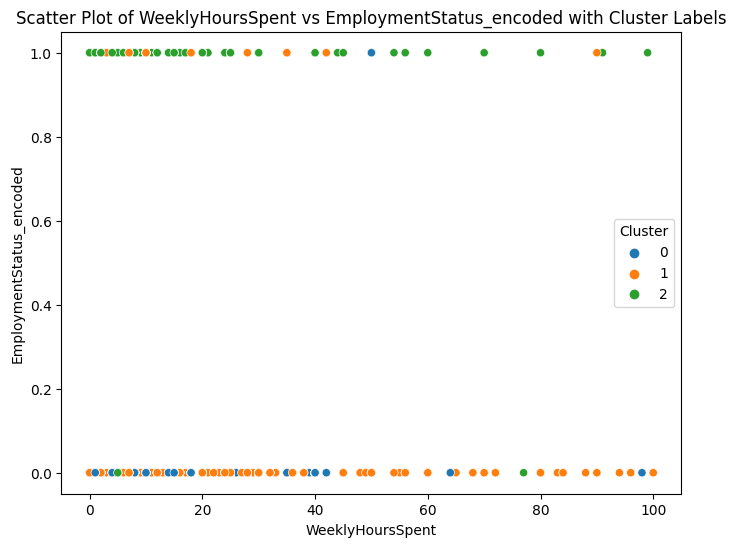

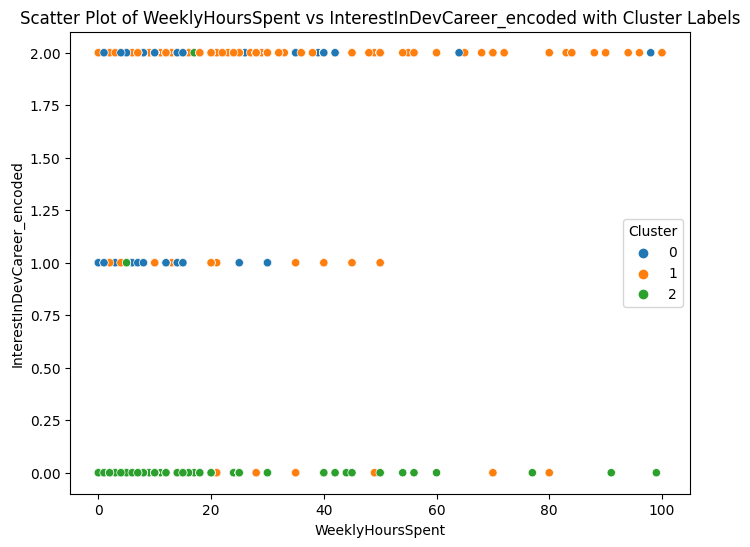

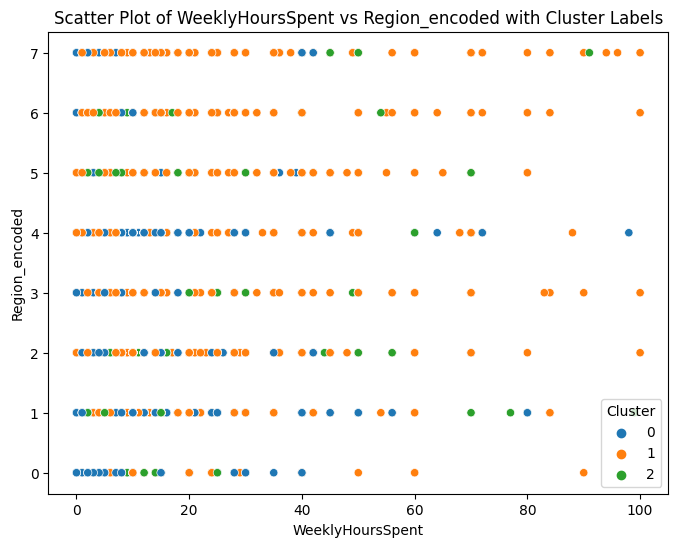

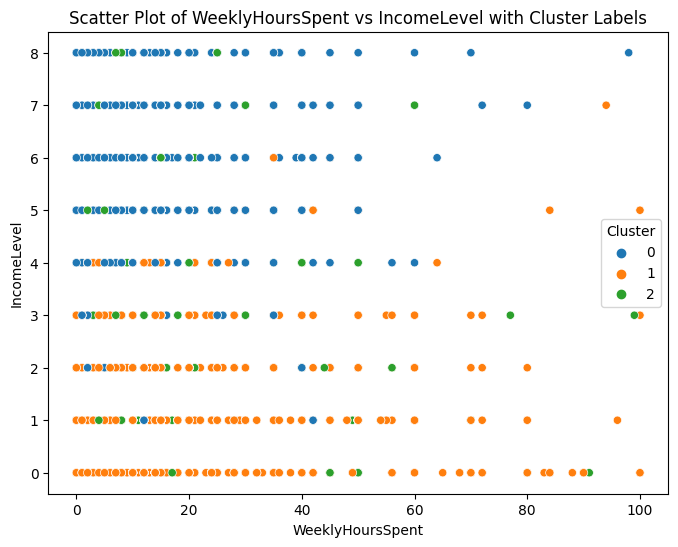

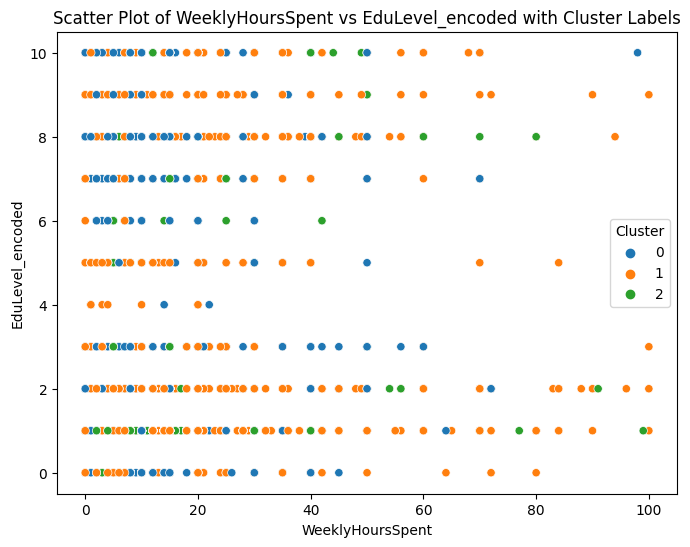

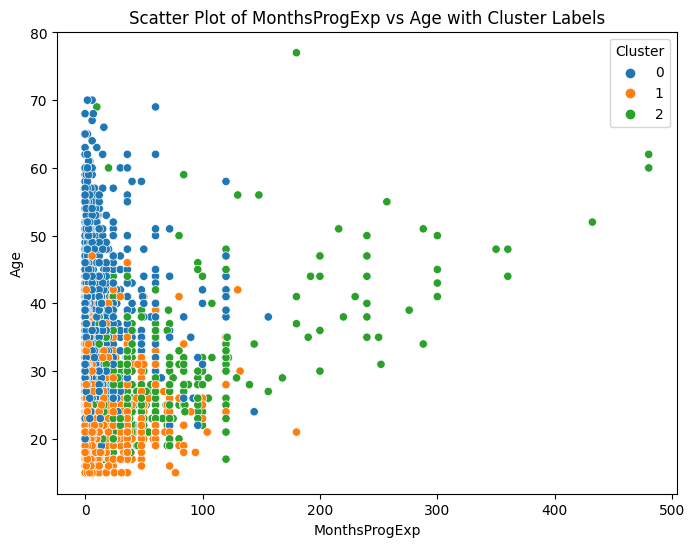

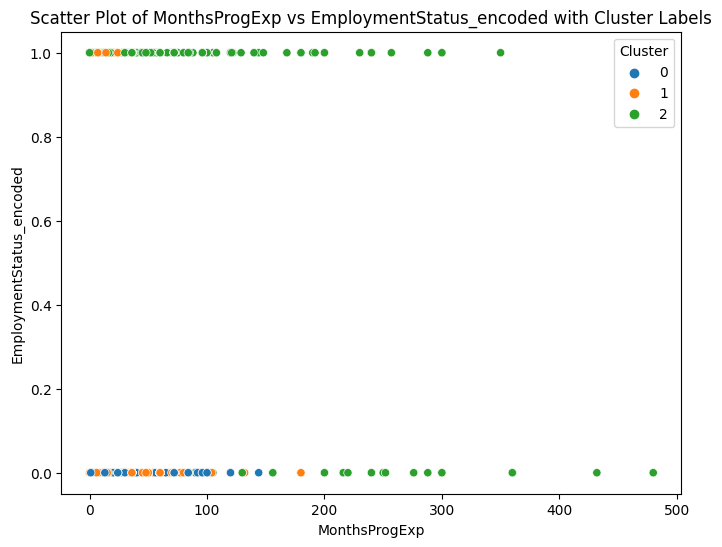

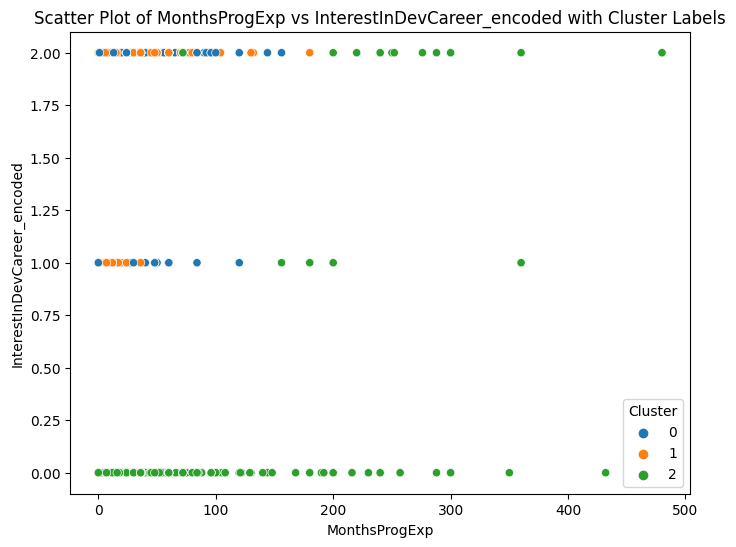

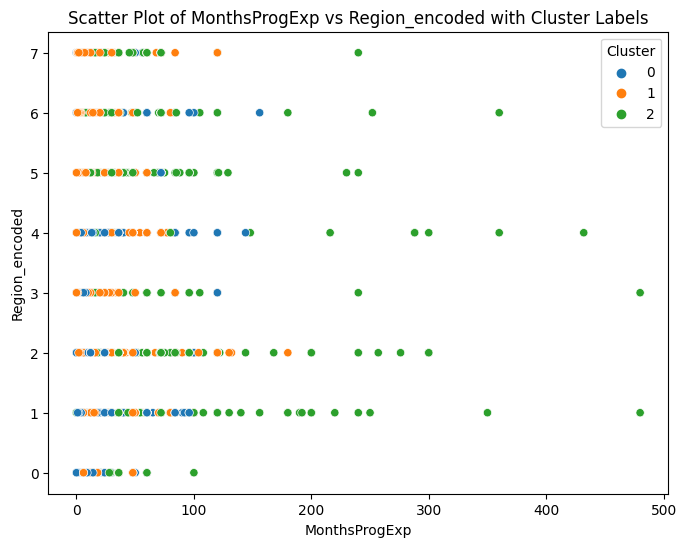

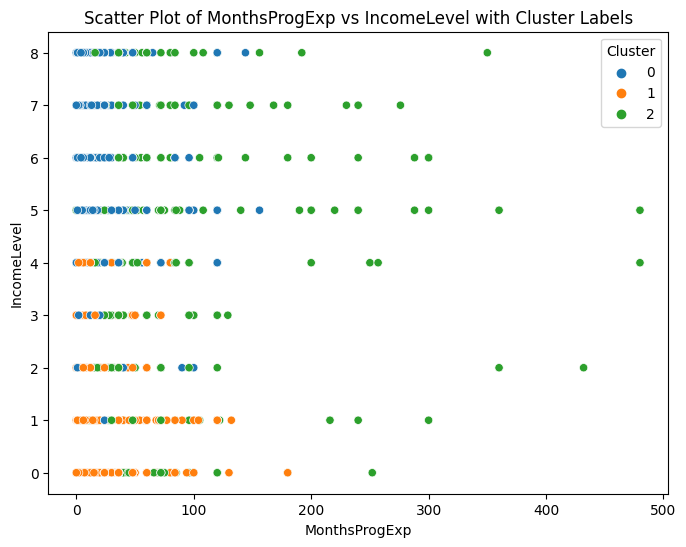

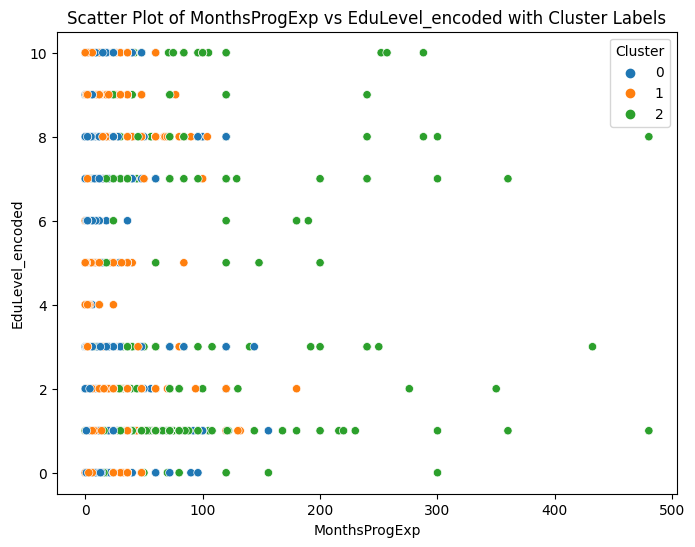

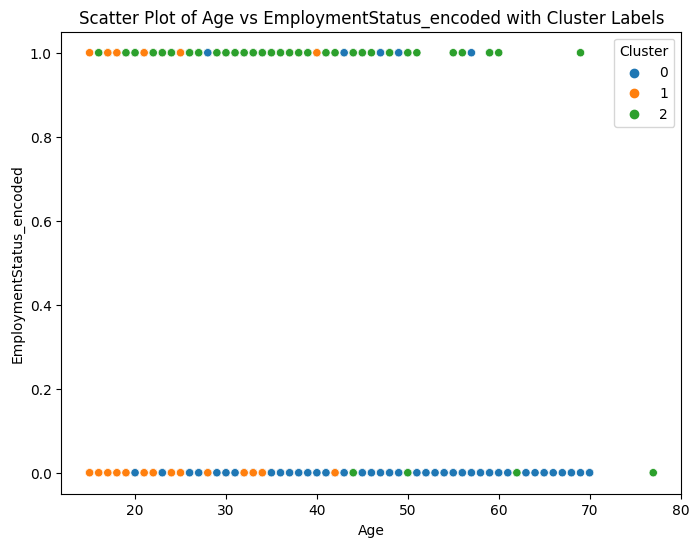

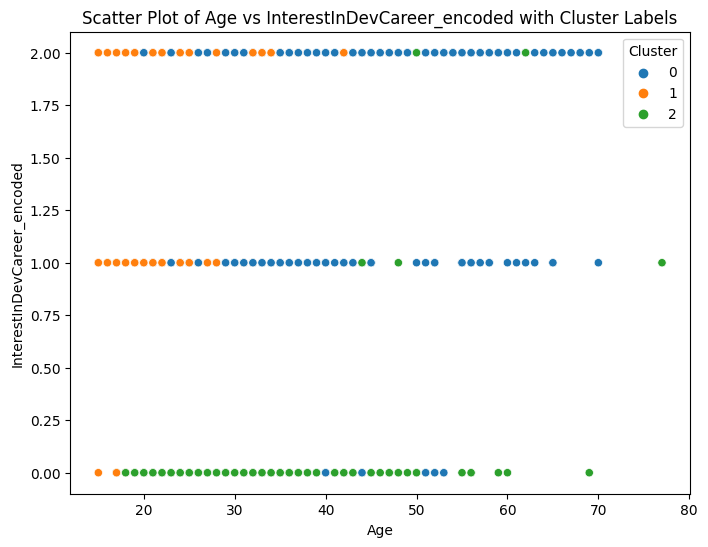

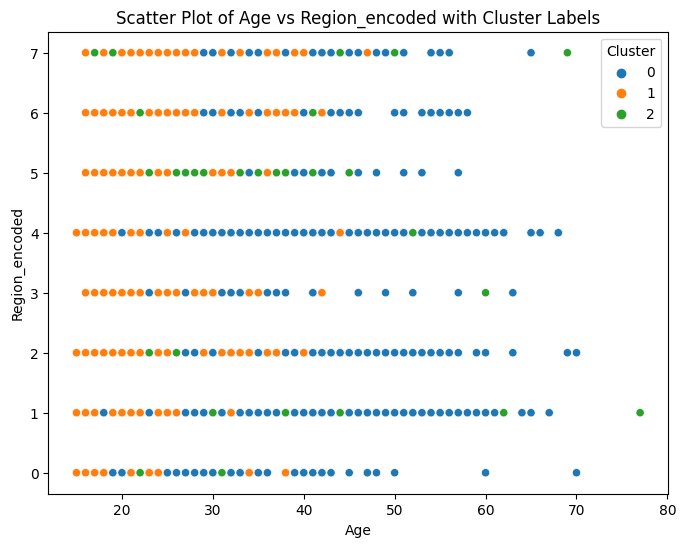

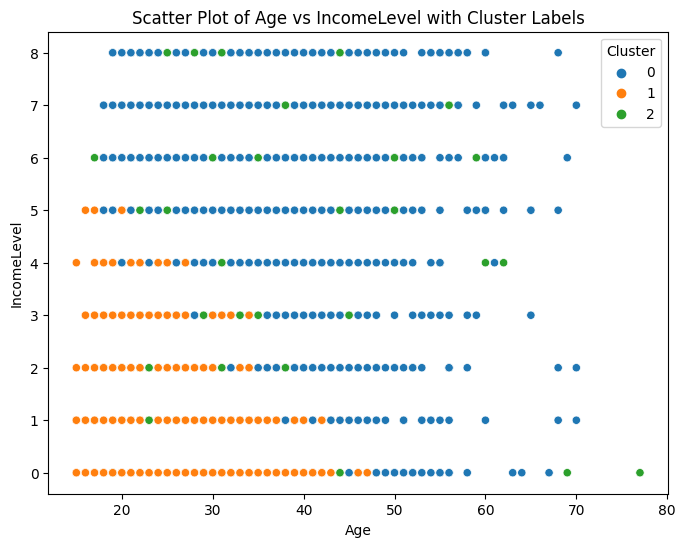

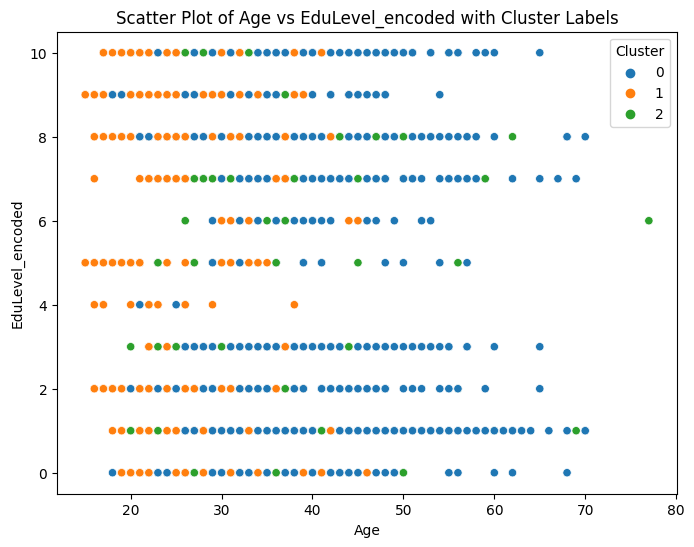

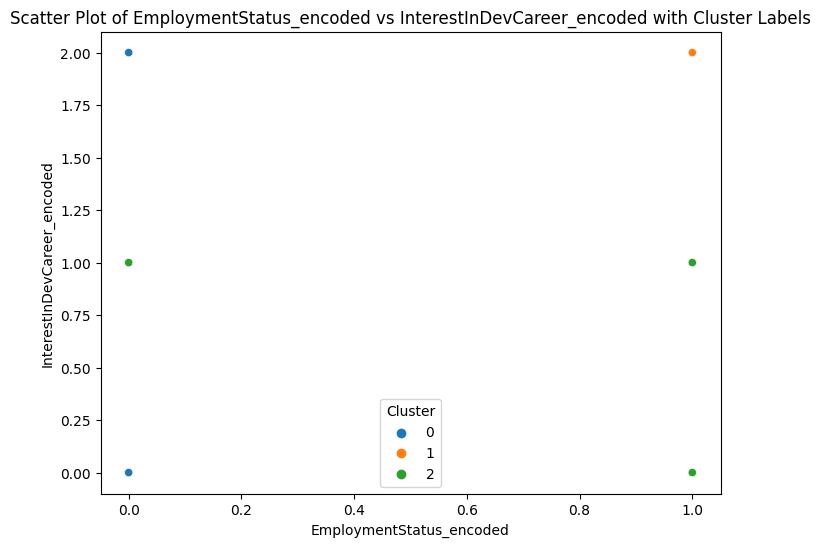

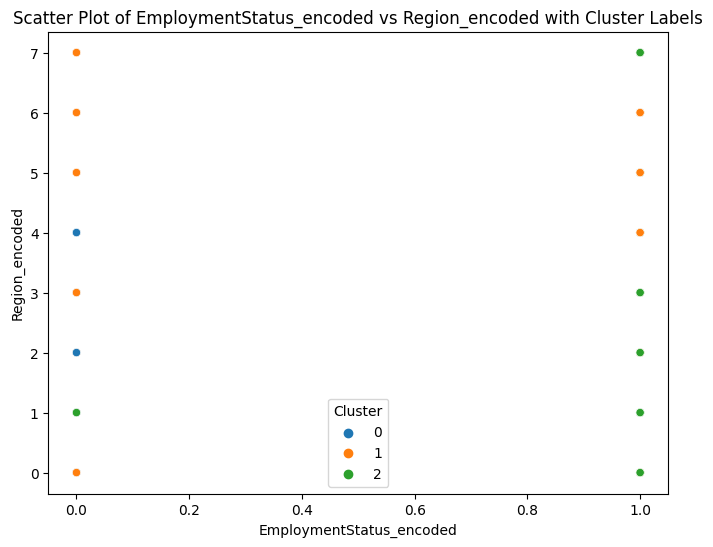

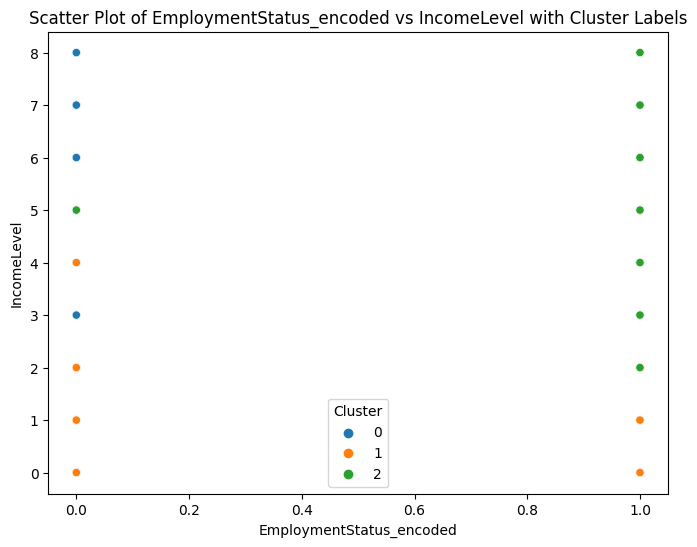

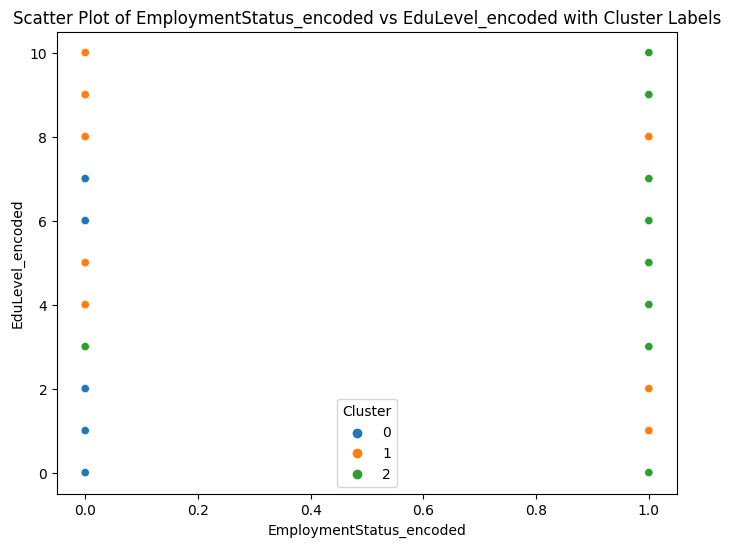

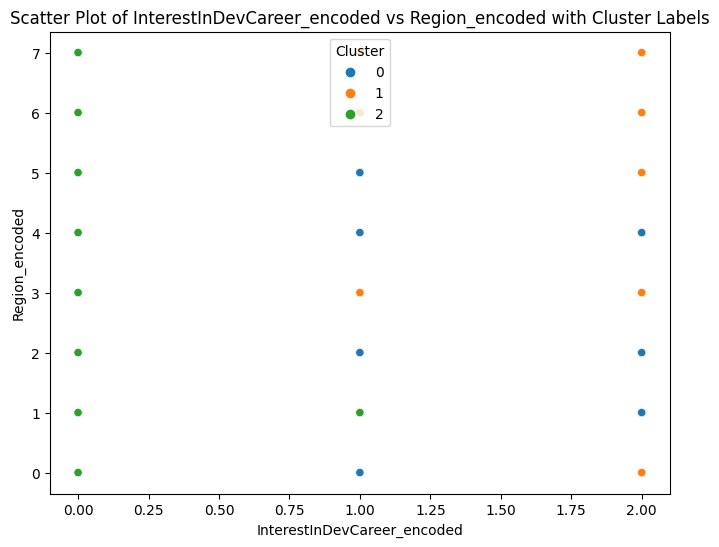

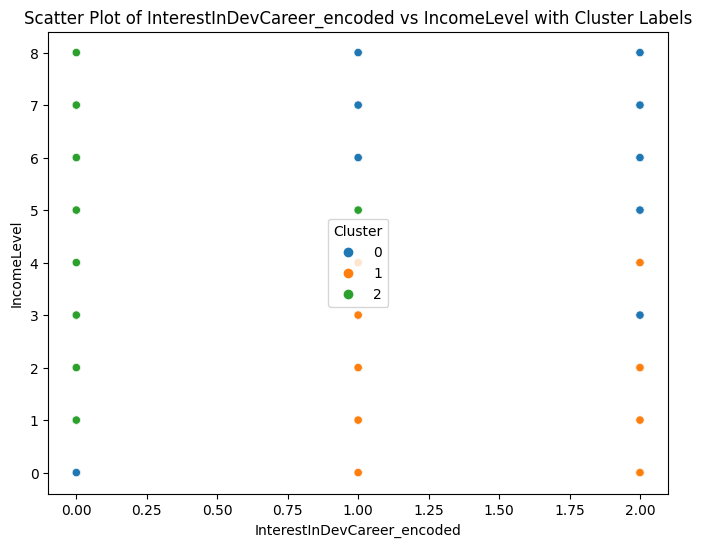

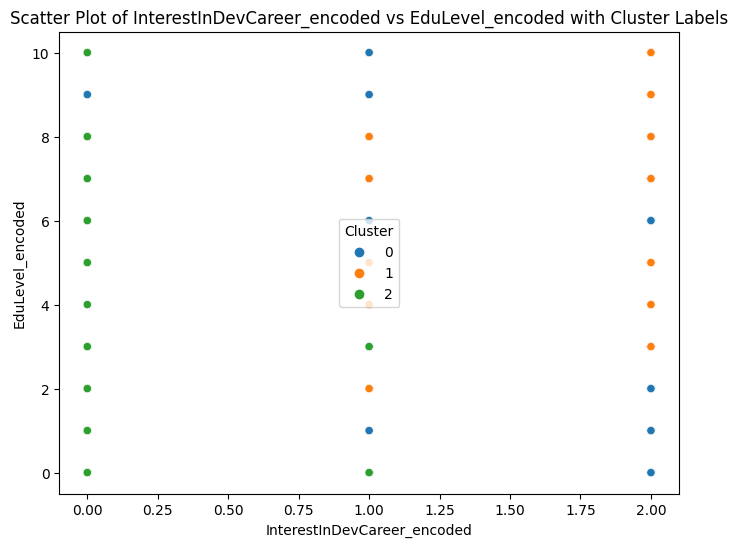

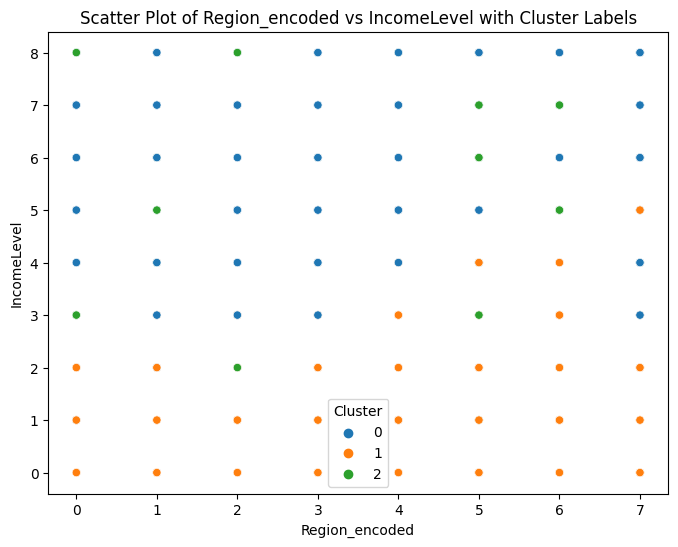

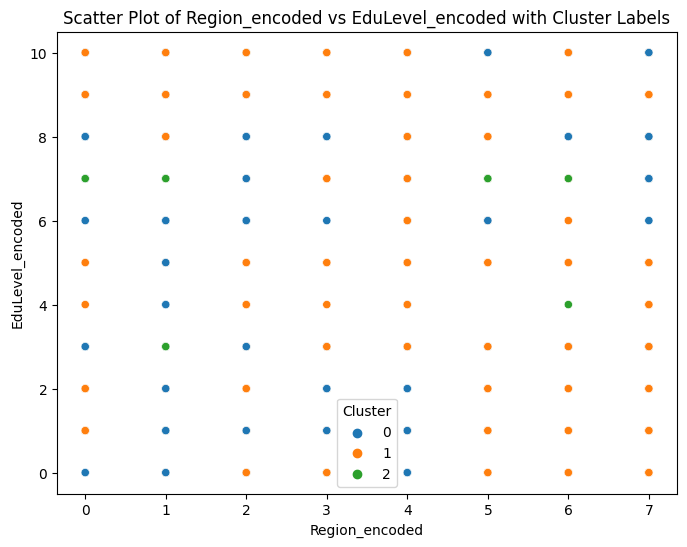

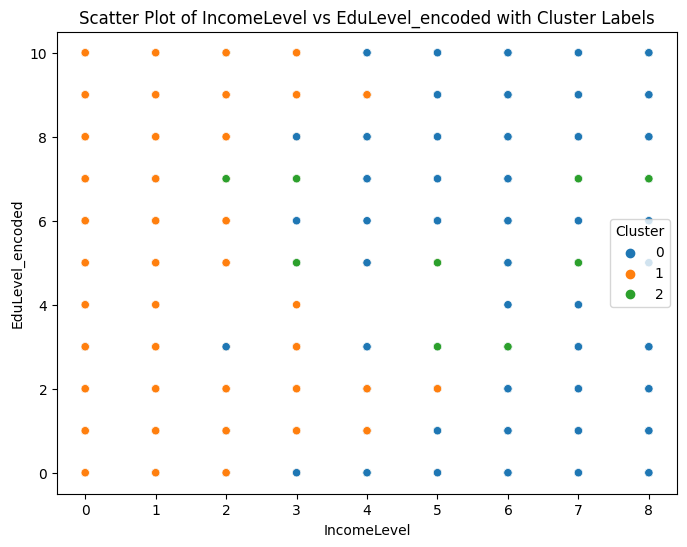

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Let's select a few numerical attributes for visualization
attributes = ['WeeklyHoursSpent', 'MonthsProgExp', 'Age', 
                       'EmploymentStatus_encoded', 'InterestInDevCareer_encoded', 
                       'Region_encoded', 'IncomeLevel', 'EduLevel_encoded']
# Generate scatter plots for all combinations of attributes
for i, attr1 in enumerate(attributes):
    for j, attr2 in enumerate(attributes):
        if i < j:  # This ensures that we don't repeat attributes and don't compare an attribute with itself
            plt.figure(figsize=(8, 6))
            sns.scatterplot(data=low_income_df, x=attr1, y=attr2, hue='Cluster', palette='tab10')
            plt.title(f'Scatter Plot of {attr1} vs {attr2} with Cluster Labels')
            plt.xlabel(attr1)
            plt.ylabel(attr2)
            plt.legend(title='Cluster')
            plt.show()

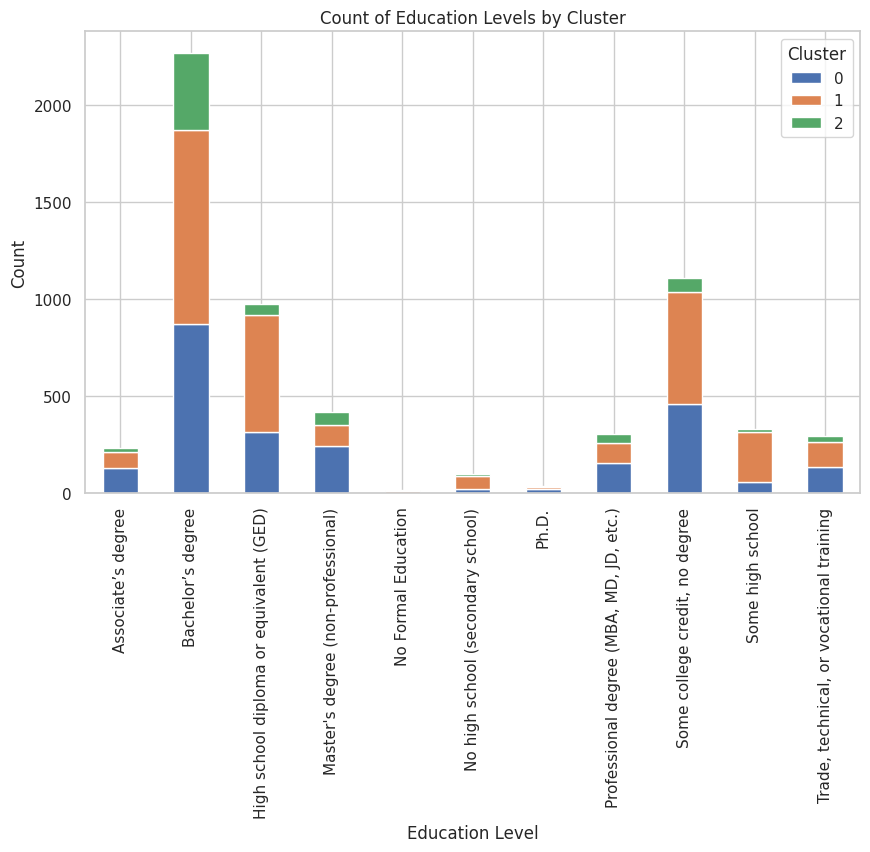

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it contains 'EduLevel_encoded' and 'Cluster' columns.
# 'EduLevel_encoded' should be the encoded education level, and 'Cluster' the cluster assignment.

# Create the mapping of encoded values to actual education levels
edu_level_mapping = {0: 'Associate’s degree',
                     1: 'Bachelor’s degree', 
                     2: 'High school diploma or equivalent (GED)', 
                     3: "Master's degree (non-professional)", 
                     4: 'No Formal Education', 
                     5: 'No high school (secondary school)', 
                     6: 'Ph.D.', 
                     7: 'Professional degree (MBA, MD, JD, etc.)', 
                     8: 'Some college credit, no degree', 
                     9: 'Some high school', 
                     10: 'Trade, technical, or vocational training'}
# Map the encoded education levels to their names
low_income_df['EduLevel'] = low_income_df['EduLevel_encoded'].map(edu_level_mapping)

# Group by 'Cluster' and 'EduLevel' and get the size of each group
cluster_education_counts = low_income_df.groupby(['Cluster', 'EduLevel']).size().reset_index(name='count')

# Pivot the results to get a better format for a bar plot
cluster_education_pivot = cluster_education_counts.pivot(index='EduLevel', columns='Cluster', values='count')

# Plot a bar graph
sns.set_theme(style="whitegrid")
cluster_education_pivot.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Count of Education Levels by Cluster')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()

# **Model for predicting missing values in annualincomeUSD attribute instead of dropping null values**

# **Machine Learning for Classification and their Implementation**

# **OVERPOWERED KNN MODEL**

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Make sure 'df' is your DataFrame with the correct columns
# And 'HighIncome' is the target column with binary values

# Features for the model - adjust these as per your actual DataFrame
features = ['WeeklyHoursSpent', 'MonthsProgExp', 'Age', 'EduLevel_encoded', 'Region_encoded', 'EmploymentStatus_encoded']

# Target variable
target = 'HighIncome'

# Make sure these columns exist in 'df'
X = df[features]
y = df[target]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Parameter grid for k-NN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid search for k-NN
knn_gs = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_gs.fit(X_train_scaled, y_train)

# Best model from grid search
knn_best = knn_gs.best_estimator_

# Predictions
y_pred = knn_best.predict(X_test_scaled)

# Evaluation
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.7821727019498608
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1223
           1       0.66      0.65      0.66       572

    accuracy                           0.78      1795
   macro avg       0.75      0.75      0.75      1795
weighted avg       0.78      0.78      0.78      1795



# **BASE KNN MODEL**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and 'HighIncome' is the target variable
features = ['WeeklyHoursSpent', 'MonthsProgExp', 'Age', 'EduLevel_encoded', 'Region_encoded', 'EmploymentStatus_encoded']
target = 'HighIncome'

# Make sure these columns exist in 'df'
X = df[features]
y = df[target]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Base KNN Model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)

# Evaluation
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7665738161559889
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1223
           1       0.64      0.63      0.63       572

    accuracy                           0.77      1795
   macro avg       0.73      0.73      0.73      1795
weighted avg       0.77      0.77      0.77      1795



In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


# Features for the model - adjust these as per your actual DataFrame
features = ['WeeklyHoursSpent', 'MonthsProgExp', 'Age', 'EduLevel_encoded', 'Region_encoded', 'EmploymentStatus_encoded']

# Target variable
target = 'HighIncome'

# Make sure these columns exist in 'df'
X = df[features]
y = df[target]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Parameter grid for k-NN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid search for k-NN
knn_gs = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_gs.fit(X_train_scaled, y_train)

# Best model from grid search
knn_best = knn_gs.best_estimator_

# Predictions
y_pred = knn_best.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)


Accuracy: 0.7821727019498608
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1223
           1       0.66      0.65      0.66       572

    accuracy                           0.78      1795
   macro avg       0.75      0.75      0.75      1795
weighted avg       0.78      0.78      0.78      1795

Confusion matrix:
[[1030  193]
 [ 198  374]]


# **CONFUSION MATRIX FOR TUNED KNN MODEL**

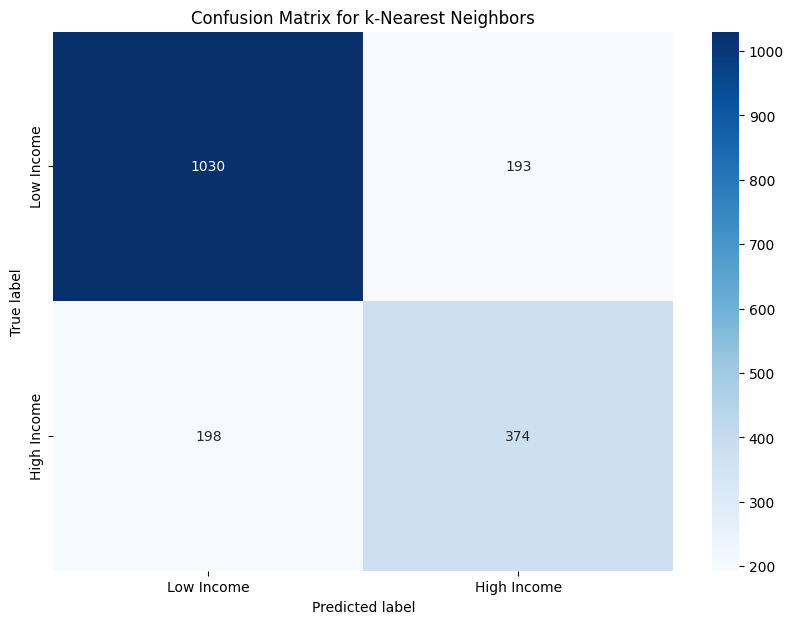

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_true are the true labels and y_pred_knn are the predictions from the k-NN model
# These are just placeholders, replace with your actual data
y_true = np.array([0, 0, 1, 1])  # Example true labels
y_pred_knn = np.array([0, 1, 1, 0])  # Example predicted labels

# Create confusion matrix for k-NN
cm_knn = np.array([[1030, 193], [198, 374]])

# Plot using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_knn, annot=True, fmt='g', cmap='Blues', xticklabels=['Low Income', 'High Income'], yticklabels=['Low Income', 'High Income'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for k-Nearest Neighbors')
plt.show()

# **ROC AND AUC FOR TUNED KNN MODEL**

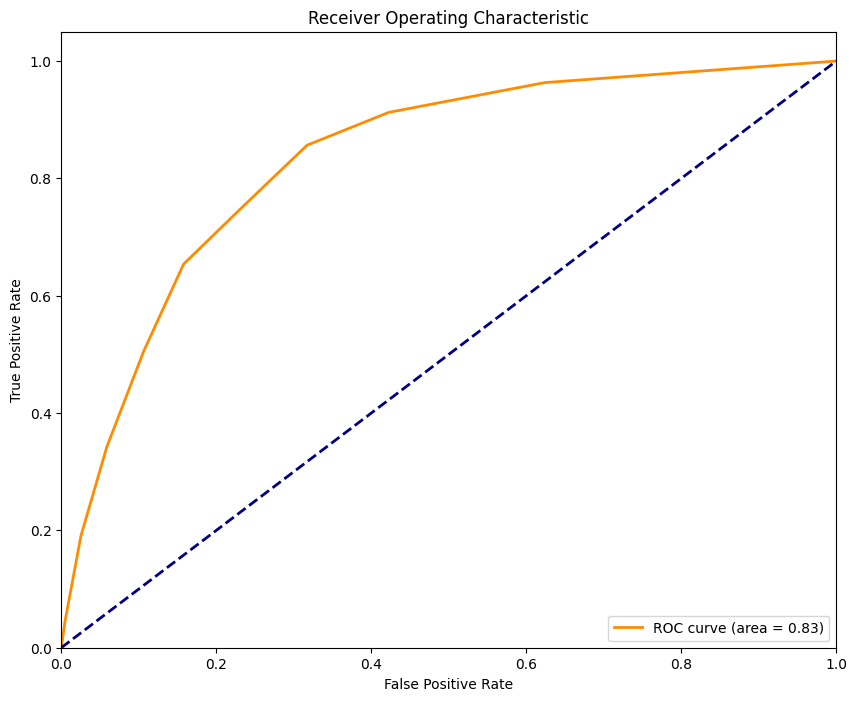

The AUC for the tuned kNN model is: 0.83


In [16]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Predictions using the best KNN model
y_pred_proba = knn_best.predict_proba(X_test_scaled)[:,1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print the AUC
print(f'The AUC for the tuned kNN model is: {roc_auc:.2f}')

# **BASE RANDOM FOREST CLASIFIER**

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'df' is your DataFrame and 'HighIncome' is the target variable
features = ['WeeklyHoursSpent', 'MonthsProgExp', 'Age', 'EduLevel_encoded', 'Region_encoded', 'EmploymentStatus_encoded']
target = 'HighIncome'

X = df[features]
y = df[target]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7643454038997215
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1229
           1       0.64      0.59      0.61       566

    accuracy                           0.76      1795
   macro avg       0.73      0.72      0.72      1795
weighted avg       0.76      0.76      0.76      1795



# **OVERPOWERED RANDOM FOREST CALSIFIER**

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'df' is your DataFrame and 'HighIncome' is the target variable
features = ['WeeklyHoursSpent', 'MonthsProgExp', 'Age', 'EduLevel_encoded', 'Region_encoded', 'EmploymentStatus_encoded']
target = 'HighIncome'

X = df[features]
y = df[target]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=0)

# Parameter grid for Random Forest
param_grid = {
    'n_estimators': [100],  # Number of trees in the forest
    'max_depth': [10],  # Maximum depth of the tree
    'min_samples_split': [10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [2],    # Minimum number of samples required at each leaf node
    'bootstrap': [True]        # Method for sampling data points (with or without replacement)
}

# Grid search of parameters
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
rf_grid.fit(X_train, y_train)

# Best Random Forest Model from grid search
rf_best = rf_grid.best_estimator_

# Predictions
y_pred = rf_best.predict(X_test)

# Evaluation
print(f"Best Parameters: {rf_grid.best_params_}")
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
0.7938718662952646
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1223
           1       0.69      0.64      0.66       572

    accuracy                           0.79      1795
   macro avg       0.76      0.75      0.76      1795
weighted avg       0.79      0.79      0.79      1795



NameError: name 'confusion_matrix' is not defined

# **CONFUSION MATRIX FOR TUNED RFC**

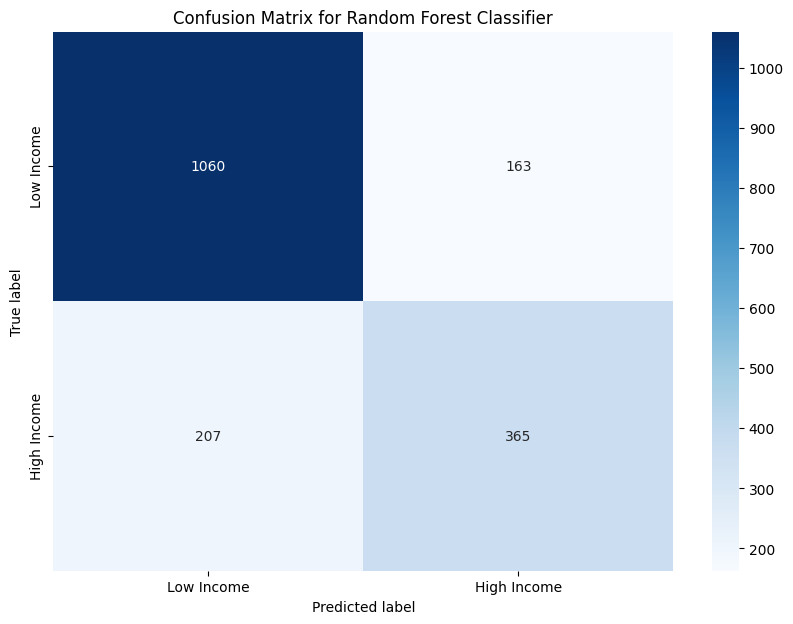

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_true are the true labels and y_pred_knn are the predictions from the k-NN model
# These are just placeholders, replace with your actual data
y_true = np.array([0, 0, 1, 1])  # Example true labels
y_pred_knn = np.array([0, 1, 1, 0])  # Example predicted labels

# Create confusion matrix for k-NN
cm_knn = np.array([[1060, 163], [207, 365]])

# Plot using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_knn, annot=True, fmt='g', cmap='Blues', xticklabels=['Low Income', 'High Income'], yticklabels=['Low Income', 'High Income'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# **ROC AND AUC FOR TUNED RFC**

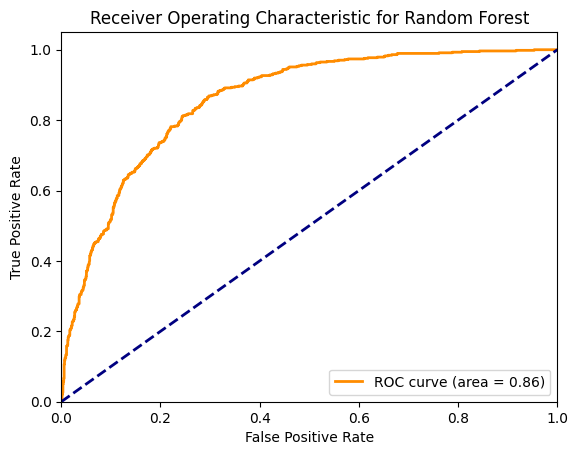

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=

In [20]:
# Make predictions with probabilities
y_scores = rf_best.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest')
plt.legend(loc="lower right")
plt.show()

# **BASE Gradient Boosting Machines (GBM) or XGBoost MODEL**

In [13]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'HighIncome' is the target variable
features = ['WeeklyHoursSpent', 'MonthsProgExp', 'Age', 'EduLevel_encoded', 'Region_encoded', 'EmploymentStatus_encoded']
target = 'HighIncome'

X = df[features]
y = df[target]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the GBM model
gbm = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
gbm.fit(X_train, y_train)

# Predictions
y_pred = gbm.predict(X_test)

# Evaluation
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7793871866295264
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1229
           1       0.65      0.64      0.65       566

    accuracy                           0.78      1795
   macro avg       0.74      0.74      0.74      1795
weighted avg       0.78      0.78      0.78      1795



# **OVERPOWERED Gradient Boosting Machines (GBM) or XGBoost MODEL**

In [21]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'df' is your DataFrame and 'HighIncome' is the target variable
features = ['WeeklyHoursSpent', 'MonthsProgExp', 'Age', 'EduLevel_encoded', 'Region_encoded', 'EmploymentStatus_encoded']
target = 'HighIncome'

X = df[features]
y = df[target]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the GBM model
gbm = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define a parameter grid to search
param_grid = {
    'n_estimators': [100],
    'max_depth': [3],
    'learning_rate': [0.1],
    'subsample': [1],
    'colsample_bytree': [1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best GBM model
gbm_best = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predictions with the best estimator
y_pred = gbm_best.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
Accuracy: 0.803899721448468
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1229
           1       0.70      0.66      0.68       566

    accuracy                           0.80      1795
   macro avg       0.77      0.76      0.77      1795
weighted avg       0.80      0.80      0.80      1795

Confusion matrix:
[[1071  158]
 [ 194  372]]


# *CONFUSION MATRIX FOR TUNED Gradient Boosting Machines *

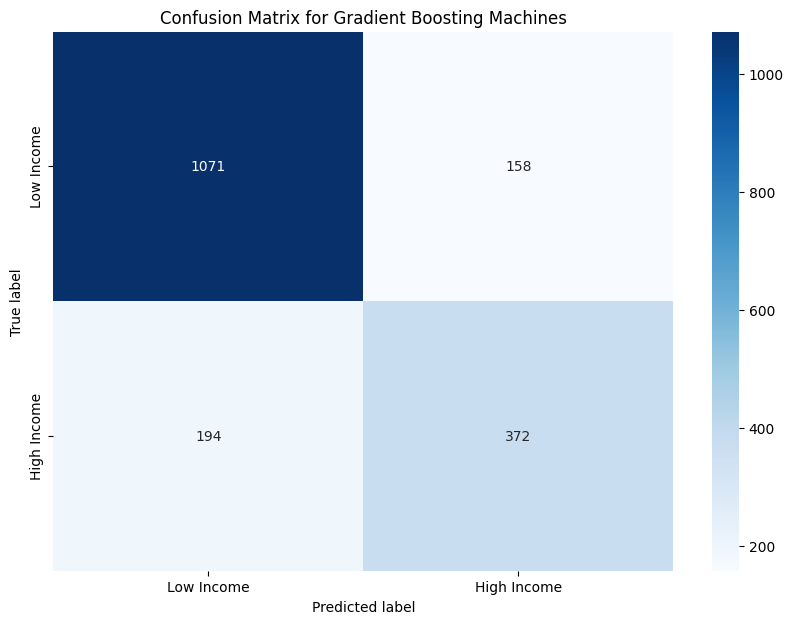

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_true are the true labels and y_pred_knn are the predictions from the k-NN model
# These are just placeholders, replace with your actual data
y_true = np.array([0, 0, 1, 1])  # Example true labels
y_pred_knn = np.array([0, 1, 1, 0])  # Example predicted labels

# Create confusion matrix for k-NN
cm_knn = np.array([[1071, 158], [194, 372]])

# Plot using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_knn, annot=True, fmt='g', cmap='Blues', xticklabels=['Low Income', 'High Income'], yticklabels=['Low Income', 'High Income'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Gradient Boosting Machines')
plt.show()

# **ROC AND AUC FOR TUNED GBM**

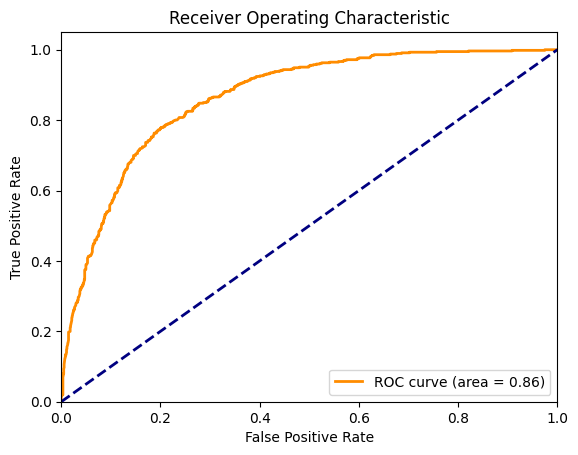

The AUC is: 0.8633588455666505


In [22]:
# Get the probability scores for the positive class
y_pred_probs = gbm_best.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print AUC
print(f'The AUC is: {roc_auc}')

**GBM WITH BAGGING**

In [15]:
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and you've already preprocessed it correctly
features = ['WeeklyHoursSpent', 'MonthsProgExp', 'Age', 'EduLevel_encoded', 'Region_encoded', 'EmploymentStatus_encoded']
target = 'HighIncome'

X = df[features].values
y = df[target].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the GBM model with the best parameters
gbm_best_params = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=1,
    colsample_bytree=1,
    random_state=42
)

# Initialize the Bagging classifier with the GBM best parameters
bagging_model = BaggingClassifier(base_estimator=gbm_best_params, n_estimators=10, random_state=42)

# Train the bagging model
bagging_model.fit(X_train_scaled, y_train)

# Evaluate the model
accuracy = bagging_model.score(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.7966573816155988


# **soft voting for GBM combined with RFC**

In [31]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# Assuming 'df' is your DataFrame and 'HighIncome' is the target variable
features = ['WeeklyHoursSpent', 'MonthsProgExp', 'Age', 'EduLevel_encoded', 'Region_encoded', 'EmploymentStatus_encoded']
target = 'HighIncome'

X = df[features]
y = df[target]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models with the best parameters
rfc_best_params = {
    'n_estimators': 100,  # Number of trees in the forest
    'max_depth': 10,  # Maximum depth of the tree
    'min_samples_split': 10,  # Minimum number of samples required to split a node
    'min_samples_leaf': 2,    # Minimum number of samples required at each leaf node
}

gbm_best_params = {
    'subsample': 1.0,
    'reg_lambda': 0.5,
    'reg_alpha': 1,
    'n_estimators': 500,
    'min_child_weight': 5,
    'max_depth': 4,
    'learning_rate': 0.1,
    'gamma': 0.4,
    'colsample_bytree': 0.6,
    'use_label_encoder': False,
    'eval_metric': 'logloss'
}

rfc = RandomForestClassifier(**rfc_best_params, random_state=42)
gbm = xgb.XGBClassifier(**gbm_best_params, random_state=42)

# Create a VotingClassifier for soft voting
voting_clf = VotingClassifier(
    estimators=[('rf', rfc), ('gbm', gbm)],
    voting='soft'
)

# Train the ensemble model
voting_clf.fit(X_train_scaled, y_train)

# Predictions
y_pred = voting_clf.predict(X_test_scaled)

# Evaluation
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# To get the individual accuracy of the models:
print('Individual model accuracies:')
for model_label, model in voting_clf.named_estimators_.items():
    y_pred_individual = model.predict(X_test_scaled)
    print(f'{model_label}: {accuracy_score(y_test, y_pred_individual)}')


Accuracy: 0.8005571030640668
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1229
           1       0.69      0.66      0.68       566

    accuracy                           0.80      1795
   macro avg       0.77      0.76      0.77      1795
weighted avg       0.80      0.80      0.80      1795

Individual model accuracies:
rf: 0.7944289693593315
gbm: 0.7983286908077994


# **ROC AND AUC FOR RFC AND GMB WITH SOFT VOTING**

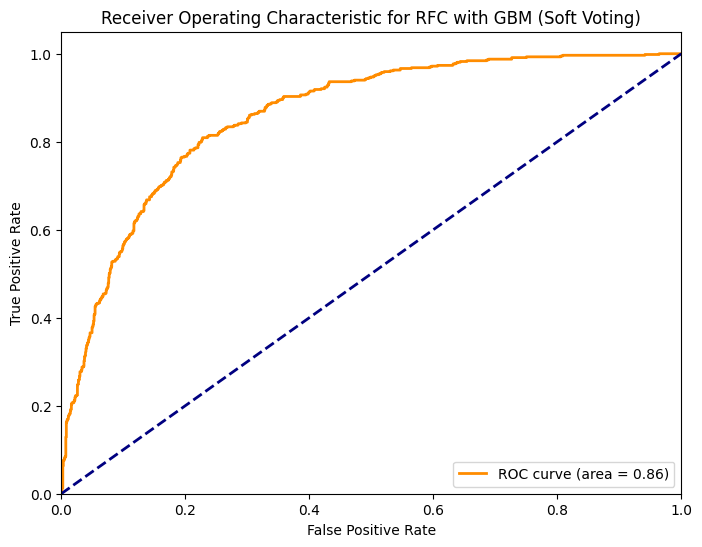

AUC for RFC with GBM (Soft Voting): 0.86


In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Your existing code to train the voting classifier should be above this
# ...

# Assuming the voting classifier is already fitted to the training data

# Get the predicted probabilities for the positive class
y_probs = voting_clf.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate and true positive rate for ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RFC with GBM (Soft Voting)')
plt.legend(loc="lower right")
plt.show()

# Print the AUC
print(f'AUC for RFC with GBM (Soft Voting): {roc_auc:.2f}')

**STACKING GBM AND RFC WITH LINEAR REGRESSION**

In [27]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb

# Assuming 'df' is your DataFrame and 'HighIncome' is the target variable
features = ['WeeklyHoursSpent', 'MonthsProgExp', 'Age', 'EduLevel_encoded', 'Region_encoded', 'EmploymentStatus_encoded']
target = 'HighIncome'

X = df[features]
y = df[target]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train base models with the best parameters found from previous tuning
rf_best_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_leaf': 2,
    'min_samples_split': 10,
    'bootstrap': True,
    'random_state': 42
}

gbm_best_params = {
    'subsample': 1.0,
    'reg_lambda': 0.5,
    'reg_alpha': 1,
    'n_estimators': 500,
    'min_child_weight': 5,
    'max_depth': 4,
    'learning_rate': 0.1,
    'gamma': 0.4,
    'colsample_bytree': 0.6,
    'random_state': 42
}

rf = RandomForestClassifier(**rf_best_params)
gbm = xgb.XGBClassifier(**gbm_best_params)

# Hyperparameter tuning for the meta-classifier
logreg_best_params = {
    'C': 1.0,
    'solver': 'lbfgs',
    'max_iter': 100,
    'random_state': 42
}

logreg = LogisticRegression(**logreg_best_params)

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[('rf', rf), ('gbm', gbm)],
    final_estimator=logreg,
    cv=5,
    stack_method='auto',
    n_jobs=-1
)

# Training the stacking classifier
stacking_clf.fit(X_train, y_train)

# Predictions
y_pred = stacking_clf.predict(X_test)

# Evaluation
print(f"Stacking Model Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Stacking Model Accuracy: 0.7977715877437326
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1229
           1       0.69      0.64      0.67       566

    accuracy                           0.80      1795
   macro avg       0.77      0.76      0.76      1795
weighted avg       0.79      0.80      0.80      1795



# **BAAGGING**

In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

# Assuming 'df' is your DataFrame and 'HighIncome' is the target variable
features = ['WeeklyHoursSpent', 'MonthsProgExp', 'Age', 'EduLevel_encoded', 'Region_encoded', 'EmploymentStatus_encoded']
target = 'HighIncome'

X = df[features]
y = df[target]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using best parameters from earlier tuning for RandomForest and GBM
rf = RandomForestClassifier(**rf_best_params)
gbm = xgb.XGBClassifier(**gbm_best_params)

# BaggingClassifier for RandomForest
bagging_rf = BaggingClassifier(base_estimator=rf, n_estimators=10, random_state=42)

# BaggingClassifier for GBM
bagging_gbm = BaggingClassifier(base_estimator=gbm, n_estimators=10, random_state=42)

# Training the bagging ensemble models
bagging_rf.fit(X_train, y_train)
bagging_gbm.fit(X_train, y_train)

# Predictions
y_pred_bagging_rf = bagging_rf.predict(X_test)
y_pred_bagging_gbm = bagging_gbm.predict(X_test)

# Evaluation for RandomForest Bagging
print(f"Bagging RandomForest Model Accuracy: {accuracy_score(y_test, y_pred_bagging_rf)}")
print(classification_report(y_test, y_pred_bagging_rf))

# Evaluation for GBM Bagging
print(f"Bagging GBM Model Accuracy: {accuracy_score(y_test, y_pred_bagging_gbm)}")
print(classification_report(y_test, y_pred_bagging_gbm))


Bagging RandomForest Model Accuracy: 0.7916434540389972
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1229
           1       0.69      0.61      0.65       566

    accuracy                           0.79      1795
   macro avg       0.76      0.74      0.75      1795
weighted avg       0.79      0.79      0.79      1795

Bagging GBM Model Accuracy: 0.7966573816155988
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1229
           1       0.69      0.64      0.67       566

    accuracy                           0.80      1795
   macro avg       0.77      0.76      0.76      1795
weighted avg       0.79      0.80      0.79      1795



In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'df' is your DataFrame and 'HighIncome' is the target variable
features = ['WeeklyHoursSpent', 'MonthsProgExp', 'Age', 'EduLevel_encoded', 'Region_encoded', 'EmploymentStatus_encoded']
target = 'HighIncome'

X = df[features]
y = df[target]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN with the best parameters found previously
knn_best_params = {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan'} # Update with your best params
knn = KNeighborsClassifier(**knn_best_params)

# BaggingClassifier for KNN
bagging_knn = BaggingClassifier(base_estimator=knn, n_estimators=10, random_state=42)

# Training the bagging ensemble model for KNN
bagging_knn.fit(X_train, y_train)

# Predictions
y_pred_bagging_knn = bagging_knn.predict(X_test)

# Evaluation for KNN Bagging
print(f"Bagging KNN Model Accuracy: {accuracy_score(y_test, y_pred_bagging_knn)}")
print(classification_report(y_test, y_pred_bagging_knn))


Bagging KNN Model Accuracy: 0.6991643454038997
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1229
           1       0.52      0.52      0.52       566

    accuracy                           0.70      1795
   macro avg       0.65      0.65      0.65      1795
weighted avg       0.70      0.70      0.70      1795



**Import Libraries**

# **RFC WITH SVM**

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Assuming 'df' is your DataFrame and 'HighIncome' is the target variable
features = ['WeeklyHoursSpent', 'MonthsProgExp', 'Age', 'EduLevel_encoded', 'Region_encoded', 'EmploymentStatus_encoded']
target = 'HighIncome'

# Your feature matrix and target vector
X = df[features]
y = df[target]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Parameter grid for Random Forest
param_grid_rf = {'bootstrap': [True], 'max_depth': [10], 'min_samples_leaf': [2], 'min_samples_split': [2], 'n_estimators': [80]}

# Initialize the grid search for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print('Best parameters for Random Forest:', best_params_rf)

# Parameter grid for SVM
param_grid_svm = {'C': [10], 'gamma': ['auto'], 'kernel': ['rbf']}

# Initialize the grid search for SVM
grid_search_svm = GridSearchCV(estimator=SVC(), param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train_scaled, y_train)

# Best parameters for SVM
best_params_svm = grid_search_svm.best_params_
print('Best parameters for SVM:', best_params_svm)

# Now re-train with the best parameters
rf_best = RandomForestClassifier(**best_params_rf)
rf_best.fit(X_train_scaled, y_train)
y_pred_rf_best = rf_best.predict(X_test_scaled)
print('Improved Random Forest accuracy:', accuracy_score(y_test, y_pred_rf_best))

svm_best = SVC(**best_params_svm)
svm_best.fit(X_train_scaled, y_train)
y_pred_svm_best = svm_best.predict(X_test_scaled)
print('Improved SVM accuracy:', accuracy_score(y_test, y_pred_svm_best))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 80}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Improved Random Forest accuracy: 0.7938718662952646
Improved SVM accuracy: 0.7732590529247911


# **RFC WITH SVM ROC AND AUC**

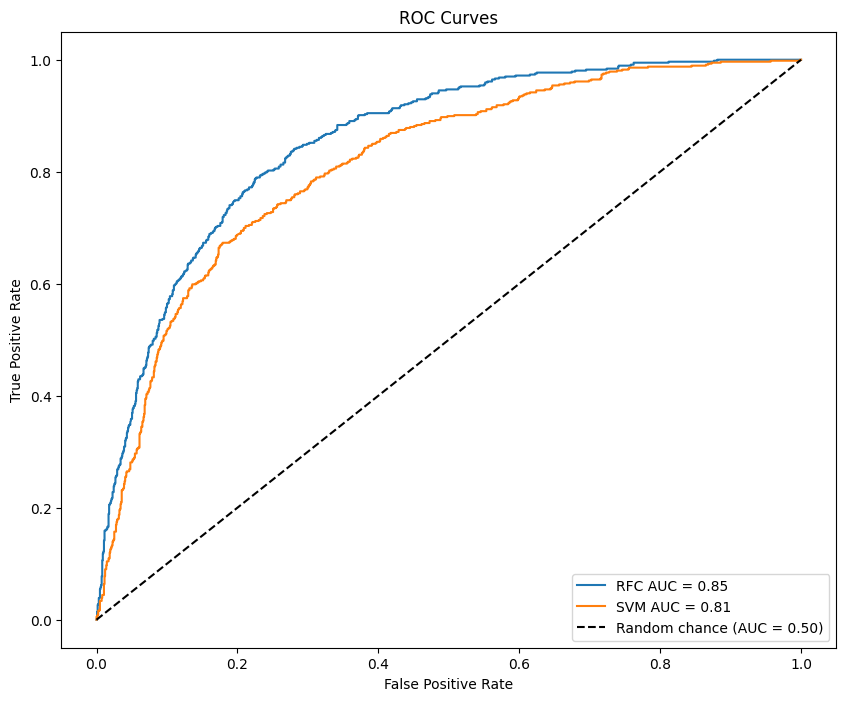

AUC for RFC: 0.85
AUC for SVM: 0.81


In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already split your data and trained your RFC and SVM models
# and you have the predictions y_pred_rf_best and y_pred_svm_best as shown in your code

# Calculate the false positive rate, true positive rate, and thresholds for each model
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_best.predict_proba(X_test_scaled)[:, 1])
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_best.decision_function(X_test_scaled))

# Calculate the AUC for each model
auc_rf = auc(fpr_rf, tpr_rf)
auc_svm = auc(fpr_svm, tpr_svm)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'RFC AUC = {auc_rf:.2f}')
plt.plot(fpr_svm, tpr_svm, label=f'SVM AUC = {auc_svm:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

# Print the AUC values
print(f'AUC for RFC: {auc_rf:.2f}')
print(f'AUC for SVM: {auc_svm:.2f}')

# **NEURAL NETWORK**

In [18]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming 'df' is your DataFrame and you've preprocessed it correctly
features = ['WeeklyHoursSpent', 'MonthsProgExp', 'Age', 'EduLevel_encoded', 'Region_encoded', 'EmploymentStatus_encoded']
target = 'HighIncome'

# Prepare the data
X = df[features].values
y = df[target].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Neural Network Model
model = Sequential()
model.add(Dense(64, input_dim=len(features), activation='relu')) # Input layer and 1st hidden layer
model.add(Dense(32, activation='relu')) # 2nd hidden layer
model.add(Dense(1, activation='sigmoid')) # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)

Epoch 1/50
180/180 [==============================] - 1s 3ms/step - loss: 0.5500 - accuracy: 0.7068 - val_loss: 0.5179 - val_accuracy: 0.7403
Epoch 2/50
180/180 [==============================] - 0s 2ms/step - loss: 0.5051 - accuracy: 0.7409 - val_loss: 0.4911 - val_accuracy: 0.7744
Epoch 3/50
180/180 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.7639 - val_loss: 0.4765 - val_accuracy: 0.7918
Epoch 4/50
180/180 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.7754 - val_loss: 0.4660 - val_accuracy: 0.7904
Epoch 5/50
180/180 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.7772 - val_loss: 0.4596 - val_accuracy: 0.7946
Epoch 6/50
180/180 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.7817 - val_loss: 0.4583 - val_accuracy: 0.7932
Epoch 7/50
180/180 [==============================] - 0s 2ms/step - loss: 0.4565 - accuracy: 0.7880 - val_loss: 0.4496 - val_accuracy: 0.7967
Epoch 

# **NEURAL NETWORK WITH BAGGING**

In [41]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to create the model, called with different seeds for random initialization
def create_network(seed):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Prepare the data
X = df[features].values
y = df[target].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Number of models to train for bagging
n_estimators = 10
# List to store each individual model
models = []
# List to store the predictions of each model
predictions = []

for i in range(n_estimators):
    # Create a new model instance with a different random seed
    model = create_network(seed=i)
    # Train the model
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
    # Store the model
    models.append(model)
    # Predict probabilities and store them
    pred = model.predict(X_test_scaled).flatten()
    predictions.append(pred)

# Average the predictions from each model
average_pred = np.mean(predictions, axis=0)
# Convert probabilities to class labels based on a threshold (0.5 default for binary classification)
average_pred = (average_pred > 0.5).astype(int)

# Evaluate the ensemble's accuracy
ensemble_accuracy = accuracy_score(y_test, average_pred)
print('Ensemble test accuracy:', ensemble_accuracy)

57/57 [==============================] - 0s 2ms/step
Ensemble test accuracy: 0.7955431754874652


Stacking 

In [28]:
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Assuming 'df' is your DataFrame and you've preprocessed it correctly
features = ['WeeklyHoursSpent', 'MonthsProgExp', 'Age', 'EduLevel_encoded', 'Region_encoded', 'EmploymentStatus_encoded']
target = 'HighIncome'

# Prepare the data
X = df[features].values
y = df[target].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Parameter distribution for Random Search
param_dist_rf = {
    'n_estimators': [500],
    'max_depth': [10],
    'min_samples_split': [5],
    'min_samples_leaf': [4]
}

param_dist_gbm = {
    'n_estimators': [300],
    'max_depth': [3],
    'learning_rate': [0.05],
    'subsample': [0.7],
    'colsample_bytree': [0.8],
}

# Initialize the base classifiers
rf = RandomForestClassifier(random_state=42)
gbm = xgb.XGBClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search_gbm = RandomizedSearchCV(gbm, param_distributions=param_dist_gbm, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search models
print("Performing Random Search for Random Forest...")
random_search_rf.fit(X_train_scaled, y_train)
print("Best parameters for Random Forest:", random_search_rf.best_params_)

print("\nPerforming Random Search for XGBoost...")
random_search_gbm.fit(X_train_scaled, y_train)
print("Best parameters for XGBoost:", random_search_gbm.best_params_)

# Stacking Classifier with the best parameters from random searches
rf_best = RandomForestClassifier(**random_search_rf.best_params_, random_state=42)
gbm_best = xgb.XGBClassifier(**random_search_gbm.best_params_, random_state=42)

# Meta-classifier
logreg = LogisticRegression()

stacking_clf = StackingClassifier(
    estimators=[
        ('rf_best', rf_best),
        ('gbm_best', gbm_best)
    ],
    final_estimator=logreg
)

# Train the stacking classifier
stacking_clf.fit(X_train_scaled, y_train)

# Predictions
y_pred_stack = stacking_clf.predict(X_test_scaled)

# Evaluation
print("\nStacking Model Accuracy:", accuracy_score(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))

Performing Random Search for Random Forest...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=10

In [29]:
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier  # or any other classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame `df` and a target variable `target`
X = df[features].values
y = df[target].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a VotingClassifier for soft voting
voting_clf = VotingClassifier(
    estimators=[('gbm', gbm), ('rf', rf)],
    voting='soft'
)

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Predictions
y_pred_soft = voting_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_soft))


Accuracy: 0.7855153203342619
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=400, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=400, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=500, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.9, learning_rate

# **OP NEURAL NETWORK**

In [20]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import random

# Assuming 'df' is your DataFrame and you've preprocessed it correctly
features = ['WeeklyHoursSpent', 'MonthsProgExp', 'Age', 'EduLevel_encoded', 'Region_encoded', 'EmploymentStatus_encoded']
target = 'HighIncome'

# Prepare the data
X = df[features].values
y = df[target].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Parameter space to sample from
param_space = {
    'units': [32, 64, 128, 256, 512],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Function to create and compile a new model given a set of parameters
def create_model(units, activation, learning_rate):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units, input_dim=X_train_scaled.shape[1], activation=activation),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Randomized search
best_score = 0
best_params = {}

for i in range(50):  # Number of iterations for the randomized search
    # Randomly sample parameters
    params = {k: random.choice(v) for k, v in param_space.items()}
    # Create and train the model
    model = create_model(params['units'], params['activation'], params['learning_rate'])
    model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    # Check if this is the best model so far
    if accuracy > best_score:
        best_score = accuracy
        best_params = params
        print(f'New best model with accuracy: {accuracy}, params: {params}')

print(f'Best model found with accuracy: {best_score}, using parameters: {best_params}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)

New best model with accuracy: 0.7944289445877075, params: {'units': 256, 'activation': 'sigmoid', 'learning_rate': 0.1}
New best model with accuracy: 0.8022283911705017, params: {'units': 256, 'activation': 'relu', 'learning_rate': 0.01}
Best model found with accuracy: 0.8022283911705017, using parameters: {'units': 256, 'activation': 'relu', 'learning_rate': 0.01}
Confusion matrix:
[[856 373]
 [372 194]]


# **CONFUSION MATRIX FOR TUNED NEURAL NETWORK**

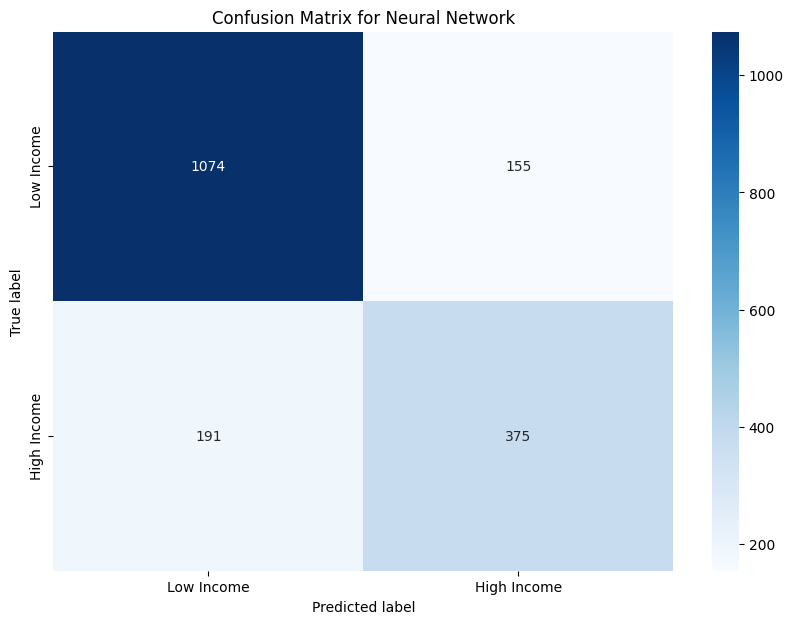

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_true are the true labels and y_pred_knn are the predictions from the k-NN model
# These are just placeholders, replace with your actual data
y_true = np.array([0, 0, 1, 1])  # Example true labels
y_pred_knn = np.array([0, 1, 1, 0])  # Example predicted labels

# Create confusion matrix for k-NN
cm_knn = np.array([[1074, 155], [191, 375]])

# Plot using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_knn, annot=True, fmt='g', cmap='Blues', xticklabels=['Low Income', 'High Income'], yticklabels=['Low Income', 'High Income'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Neural Network')
plt.show()

# **ROC AND AUC FOR NEURAL NETWORK**

57/57 [==============================] - 0s 1ms/step


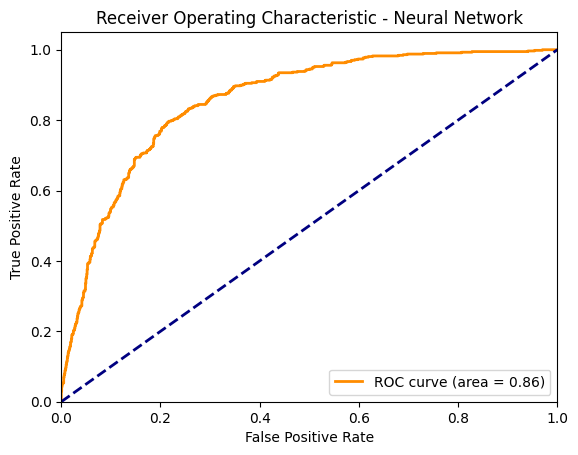

The AUC for the Neural Network model is: 0.8559560330873155


In [30]:
# Create and compile the best neural network model with the identified parameters
best_model = create_model(best_params['units'], best_params['activation'], best_params['learning_rate'])

# Train the model with the best parameters
best_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

# Predict the probability scores on the test set
y_pred_probs = best_model.predict(X_test_scaled)[:, 0]  # modify depending on your model's output

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Neural Network')
plt.legend(loc="lower right")
plt.show()

# Print AUC
print(f'The AUC for the Neural Network model is: {roc_auc}')

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

# Assuming you have already optimized your neural network and RFC and found the best parameters
# Replace 'best_params_nn' and 'best_params_rfc' with the actual best parameters
best_params_nn = {
    'units': 480,  # Example parameter
    'activation': 'relu',  # Example parameter
    'optimizer': Adam(learning_rate=0.001)  # Example parameter
    # Add other parameters here
}

best_params_rfc = {
    'n_estimators': 500,
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    # Add other parameters here
}

# Function to create the Keras model with best parameters
def create_model(units, activation, optimizer):
    model = Sequential()
    model.add(Dense(units, input_dim=X_train_scaled.shape[1], activation=activation))
    # Add additional layers as needed based on your best_params_nn
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Assuming 'df' is your DataFrame and you've preprocessed it correctly
features = ['WeeklyHoursSpent', 'MonthsProgExp', 'Age', 'EduLevel_encoded', 'Region_encoded', 'EmploymentStatus_encoded']
target = 'HighIncome'

# Prepare the data
X = df[features].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the neural network with best parameters using KerasClassifier
nn = KerasClassifier(build_fn=create_model, units=best_params_nn['units'],
                     activation=best_params_nn['activation'], optimizer=best_params_nn['optimizer'],
                     epochs=100, batch_size=32, verbose=0)

# Initialize the Random Forest with best parameters
rfc = RandomForestClassifier(**best_params_rfc)

# Create the stacking classifier with logistic regression as a meta-classifier
stacking_clf = StackingClassifier(estimators=[('rf', rfc), ('nn', nn)], 
                                  final_estimator=LogisticRegression())

# Train the stacking classifier
stacking_clf.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_stack = stacking_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_stack)
print(f'Stacking Model Accuracy: {accuracy}')


ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

**Preproccess Data**

In [4]:
# Split the dataset into known and unknown income
known_income_df = df.dropna(subset=['AnnualIncomeUSD'])
unknown_income_df = df[df['AnnualIncomeUSD'].isna()]

# Select features for encoding
categorical_features = ['EduLevel', 'EmploymentStatus', 'InterestInDevCareer', 'Region']
numerical_features = ['WeeklyHoursSpent', 'MonthsProgExp', 'Age']  # Add any other numeric features you have

# Define the ColumnTransformer for different preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'  # This drops the columns that are not specified in numerical or categorical features
)

# Fit the preprocessor on known data and transform both known and unknown
preprocessor.fit(known_income_df)
X_known = preprocessor.transform(known_income_df)
X_unknown = preprocessor.transform(unknown_income_df)

# Define the target variable
y_known = known_income_df['AnnualIncomeUSD']


**Train Test Split**

In [5]:
# Perform train-test split on known data to evaluate model performance
X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

**Model Training**

In [6]:
# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=0)

# Train the model on the training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

**Hyperparameter Tuning**

In [7]:
# Define scoring function for grid search
f1_scorer = make_scorer(f1_score, average='weighted')

# Create a Random Forest classifier and SMOTE object for pipeline
rf = RandomForestClassifier(random_state=0)
smote = SMOTE()

# Create a pipeline that first oversamples, then runs the random forest
pipeline = Pipeline(steps=[('smote', smote), ('rf', rf)])

# Define a grid of parameters to search over (reduced for faster execution)
params = {
    'rf__n_estimators': [100, 150],
    'rf__max_depth': [10, 20],
    'rf__min_samples_split': [2, 5]
}

# Perform grid search with cross-validation (fewer cv folds and more verbose)
grid_search = GridSearchCV(estimator=pipeline, param_grid=params, cv=3, scoring=f1_scorer, verbose=3)

# Fit grid search on training data
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters: ", best_params)
print("Best cross-validation score: ", best_score)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END rf__max_depth=10, rf__min_samples_split=2, rf__n_estimators=100;, score=0.155 total time=   6.3s
[CV 2/3] END rf__max_depth=10, rf__min_samples_split=2, rf__n_estimators=100;, score=0.171 total time=   6.1s
[CV 3/3] END rf__max_depth=10, rf__min_samples_split=2, rf__n_estimators=100;, score=0.162 total time=   6.1s
[CV 1/3] END rf__max_depth=10, rf__min_samples_split=2, rf__n_estimators=150;, score=0.160 total time=   9.5s
[CV 2/3] END rf__max_depth=10, rf__min_samples_split=2, rf__n_estimators=150;, score=0.168 total time=   9.2s
[CV 3/3] END rf__max_depth=10, rf__min_samples_split=2, rf__n_estimators=150;, score=0.157 total time=   9.2s
[CV 1/3] END rf__max_depth=10, rf__min_samples_split=5, rf__n_estimators=100;, score=0.156 total time=   6.0s
[CV 2/3] END rf__max_depth=10, rf__min_samples_split=5, rf__n_estimators=100;, score=0.171 total time=   5.9s
[CV 3/3] END rf__max_depth=10, rf__min_samples_split=5, rf__

**Predict and fill missing values**

In [8]:
# Train the final model on all known data
final_clf = grid_search.best_estimator_
final_clf.fit(X_known, y_known)

# Predict the unknown values
predicted_income = final_clf.predict(X_unknown)

# Reassign the predicted values back to the original DataFrame
df.loc[df['AnnualIncomeUSD'].isna(), 'AnnualIncomeUSD'] = predicted_income

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'df' is your DataFrame and 'AnnualIncomeUSD' is the target column.

# Split the dataset
known_income_df = df.dropna(subset=['AnnualIncomeUSD'])
unknown_income_df = df[df['AnnualIncomeUSD'].isna()]

# Select features for encoding
categorical_features = ['EduLevel', 'EmploymentStatus', 'InterestInDevCareer', 'Region']
numerical_features = ['WeeklyHoursSpent', 'MonthsProgExp', 'Age']  # Add any other numeric features

# We will use ColumnTransformer to apply different preprocessing to categorical and numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Fit the preprocessor on known data
preprocessor.fit(known_income_df)

# Transform both known and unknown data
X_known = preprocessor.transform(known_income_df)
X_unknown = preprocessor.transform(unknown_income_df)

# The target variable
y_known = known_income_df['AnnualIncomeUSD']

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=0)

# Train the model
clf.fit(X_known, y_known)

# Predict the unknown values
predicted_income = clf.predict(X_unknown)

# Reassign the predicted values back to the original DataFrame
df.loc[df['AnnualIncomeUSD'].isna(), 'AnnualIncomeUSD'] = predicted_income

**Training the model**

In [8]:
# Assuming this is Cell #5 based on the screenshots

# Create X_train and y_train
X_train = X_known  # This assumes X_known is defined with the transformed known data
y_train = known_income_df['AnnualIncomeUSD']  # Ensure y_train is the target variable

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=0)

# Train the model
clf.fit(X_train, y_train)

# ... your code for predictions and reassessing the data ...

In [9]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

# Define a scoring function
f1_scorer = make_scorer(f1_score, average='weighted')

# Create a SMOTE object
smote = SMOTE()

# Create a random forest classifier object
rf = RandomForestClassifier(class_weight='balanced')

# Create a pipeline that first oversamples then runs the random forest
pipeline = imbpipeline(steps=[('smote', smote), ('rf', rf)])

# Define a grid of parameters to search over
params = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [10, 20, 30],
    'rf__min_samples_split': [2, 5, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=params, cv=5, scoring=f1_scorer)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")


ValueError: 
All the 135 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/opt/conda/lib/python3.10/site-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/opt/conda/lib/python3.10/site-packages/joblib/memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/imblearn/pipeline.py", line 422, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/imblearn/base.py", line 208, in fit_resample
    return super().fit_resample(X, y)
  File "/opt/conda/lib/python3.10/site-packages/imblearn/base.py", line 106, in fit_resample
    X, y, binarize_y = self._check_X_y(X, y)
  File "/opt/conda/lib/python3.10/site-packages/imblearn/base.py", line 161, in _check_X_y
    X, y = self._validate_data(X, y, reset=True, accept_sparse=accept_sparse)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/generic.py", line 2150, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Bachelor’s degree'


In [10]:
income_frequency = df['AnnualIncomeUSD'].value_counts()

# Print the age and its corresponding frequency
print(income_frequency)

AnnualIncomeUSD
Under $1,000              6230
$1,000 to $2,999          1459
$10,000 to $14,999         967
$3,000 to $4,999           880
$20,000 to $24,999         747
$5,000 to $6,999           714
$40,000 to $49,999         679
$50,000 to $59,999         619
$15,000 to $19,999         596
$25,000 to $29,999         569
$7,000 to $9,999           567
$30,000 to $34,999         563
$60,000 to $74,999         510
$35,000 to $39,999         430
$75,000 to $89,999         377
$90,000 to $119,999        303
I don't want to answer     188
$120,000 to $159,999       152
I don’t know               138
$160,000 to $199,999        52
$250,000 or over            42
$200,000 to $249,999        21
Name: count, dtype: int64


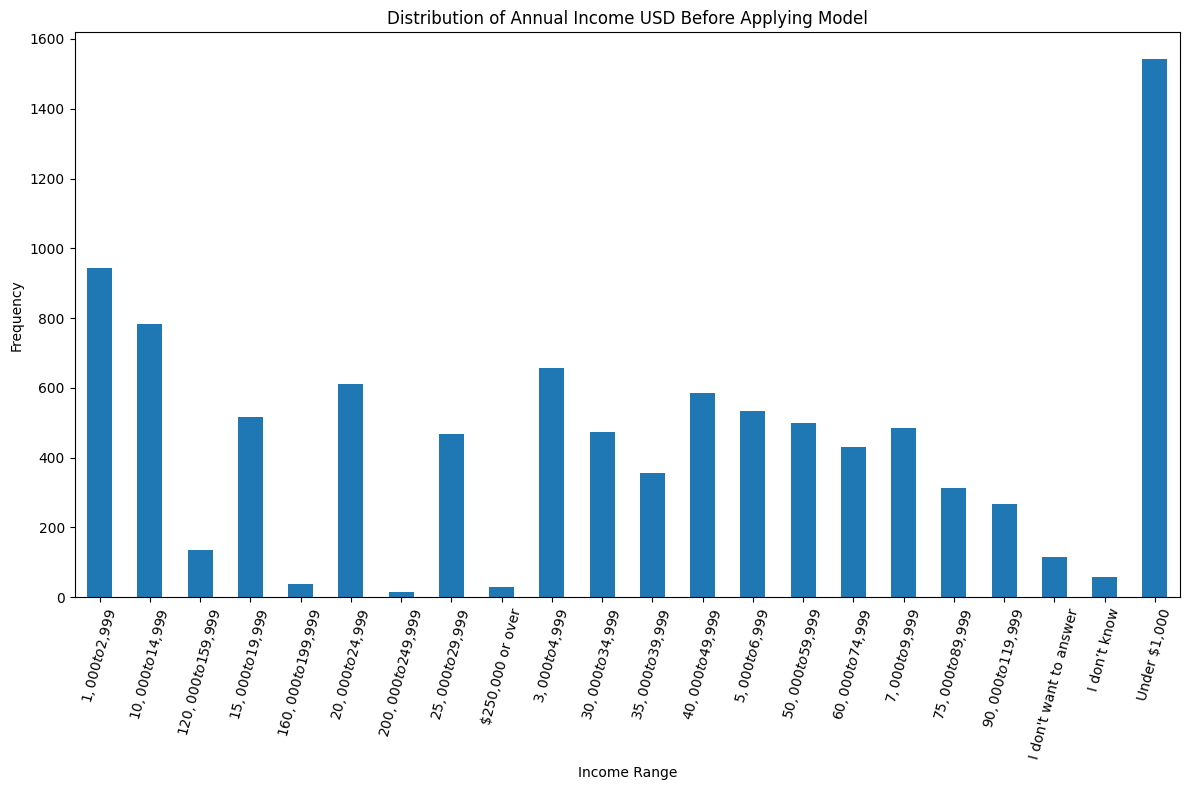

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Let's say your DataFrame after filling missing values is called 'df'
# And 'AnnualIncomeUSD' is the column with the income range categories

# First, calculate the frequency of each income range category
income_counts = df['AnnualIncomeUSD'].value_counts()

# Now, sort the income ranges if necessary (optional step)
sorted_income_counts = income_counts.sort_index()

# Then create a bar plot
plt.figure(figsize=(12, 8))
sorted_income_counts.plot(kind='bar')
plt.title('Distribution of Annual Income USD Before Applying Model')
plt.xlabel('Income Range')
plt.ylabel('Frequency')
plt.xticks(rotation=75)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()


#### EDA: Understand `Income` distribution
* What is the distribution of income for new coders? 
* This is shown using `countplot()`
* The figure is not good becuase of the messy order of income.
* You may think about how to plot `Income` with an order

In [224]:
import seaborn as sns   
sns.countplot(y=df['Income'], data=survey)
plt.xlabel("count")
plt.ylabel("income")
plt.show()

KeyError: 'Income'

### Data preparation
#### Transform the target variable `Income` into two class labels `High (1)` and `Low(0)`
* To help you kick-off the coursework, the target variable `Income` is prepared.
* The target variable `Income` is needed to transform into two class labels `High (1)` and `Low(0)`
* This is a mapping from  `Income` value to 1 and 0
* Get unique values in `Income`

In [ ]:
df["Income"].unique()

Handle missing vcalues in Income
All rows with missing values in Column Income are dropped because Income value is necessary for classification
Note: This method is easy but might not be the best. Think about a better solution?
So what are missing values in the data?
After a manually check from unique values, missing values are identified and then dropped

In [ ]:
df_clean = df.dropna()
print(df_clean['Income'].unique())

In [ ]:
df_clean = df_clean[df_clean["Income"] != 'I don’t know']
print(df_clean["Income"].unique())

In [ ]:
df_clean = df_clean[df_clean["Income"] != "I don't want to answer"]
print(df_clean["Income"].unique())

In [ ]:
df_clean = df_clean[df_clean["Income"] != "None"]
print(df_clean["Income"].unique())

Ordinal-encoding Income
income belongs to ordinal data
It is encoded as a numeric value with an order
The encoded value is put into a new column IncomeLevel

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
income_level_order = [[
                       'Under $1,000',
                       '$1,000 to $2,999',
                       '$3,000 to $4,999',
                       '$5,000 to $6,999', 
                       '$7,000 to $9,999',
                       '$10,000 to $14,999',
                       '$15,000 to $19,999',
                       '$20,000 to $24,999',
                       '$25,000 to $29,999',
                       '$30,000 to $34,999', 
                       '$35,000 to $39,999',
                       '$40,000 to $49,999',
                       '$50,000 to $59,999',
                       '$60,000 to $74,999',
                       '$75,000 to $89,999',
                       '$90,000 to $119,999',
                       '$120,000 to $159,999',
                       '$160,000 to $199,999', 
                       '$200,000 to $249,999',
                       '$250,000 or over',]] 
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories = income_level_order)  
df_clean['IncomeLevel'] = encoder.fit_transform(df_clean[['Income']])
display(df_clean)

In [ ]:
sns.countplot(y = 'IncomeLevel', data = df_clean)

In [ ]:
df_clean['HighIncome'] = df_clean['IncomeLevel'].apply(lambda x:0 if x < 9 else 1)
df_clean.head()

**EDA: understand High Income and Low Income**

So far, a new column HighIncome is added to DataFrame df_clean. This is the class label that will be used in your coursework

In [ ]:
sns.countplot(y='HighIncome', data=df_clean)

**Classification**

Predictors X

Choose predictors X

In [ ]:
X = df_clean[['Area']]
X.head()

In [ ]:
y = df_clean[['HighIncome']]
y.head()

**Encode Area**

due to nominal data, using OneHot encoder

In [ ]:
X = pd.get_dummies(X) #OneHot Encoding.
X.head()

**Split data into two parts: training and test**

70% for training and 30% for test

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #split data
print(X_train[0:5])

**Build model**

Build a decision tree.

In [ ]:
from sklearn import tree 
from sklearn import metrics 
dt = tree.DecisionTreeClassifier(max_depth = 1)  #build a decision tree

train a model

In [ ]:
dt = dt.fit(X_train, y_train) #fit decision tree

**Evaluate the model**

Predict the class label of records on test data

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
Accuracy = metrics.accuracy_score(y_test, y_pred) 
print ("Accuracy: ", Accuracy) 

Visulize the tree

In [ ]:
from sklearn import tree 
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 10)) #plot the decision tree
_ = tree.plot_tree(dt, feature_names=X.columns, class_names=["Low", "High"],  filled=True)

Print the accuracy of the model on the test data

**Cluster Analysis**

Clutser analysis uses the cleaned data df_clean

In [ ]:
df_clean.head()

**Select features for clustering**

Columns 'Area','IncomeLevel' are selected for clustering in this kick-off notebook

Create a new data frame for them

In [ ]:
df_cluster = df_clean[['Area','HighIncome']]
df_cluster.head()

**Encode Area**

Area is categorical data without order, so use OneHot Encoder

In [ ]:
X_cluster = pd.get_dummies(df_cluster) #OneHot Encoding. 
X_cluster.head()

**Cluster the data**

cluster data into a few groups using the K-Mean clustering method

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)  

* fit on the data and predict the group label
* Add a new column in df_cluster called ClutserLabel

In [ ]:
y_cluster = km.fit_predict(X_cluster)
print(y_cluster[0:5])
df_cluster['ClusterLabel'] = y_cluster 
df_cluster.head()

*** Understand the characteristics of clusters**
* How much do new coders earn in each cluster? What are the new coder regions in each cluster?
* Use countplot to undertstand the data

In [ ]:
import seaborn as sns
sns.countplot(data=df_cluster, x="ClusterLabel", hue="Area")

In [ ]:
import seaborn as sns
sns.countplot(data=df_cluster, x="ClusterLabel", hue="HighIncome")

### Kick-off your own work
* Follow CRISP-DM to implement the coursework
* Analyze more features  from the data 
* Implement more  EDA, classification and clustering